# EDA (Análisis Exploratorio de los Datos)

## Importación de las librerías

In [165]:
# Para la API
import requests
import io
# Para la lectura de los csv y las visualizaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('pastel')
import plotly.graph_objs as go

# Acceso a Internet

Información de mercado, oferta, demanda y cobertura de los servicios de comunicaciones (Tercer Trimestre 2022)

La extracción de los datos se realizará a través de la API de ENACOM

## Penetración del servicio de Internet fijo

Penetración del servicio de Internet fijo por métrica de población y métrica de hogares

### Penetración nacional del Internet fijo

Series trimestrales de la penetración del Internet fijo en las métricas por cada 100 habitantes y por cada 100 hogares

In [86]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-NACIO-DEL-INTER-FIJO/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 900})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  penetracion_internet_fijo = pd.read_csv(io.StringIO(csv_data), decimal = ",")

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [87]:
penetracion_internet_fijo.head()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2022          3                         76.64                     23.95   
1  2022          2                         75.97                     23.72   
2  2022          1                         73.88                     23.05   
3  2021          4                         73.18                     22.81   
4  2021          3                         70.58                     21.98   

         Periodo  
0  Jul-Sept 2022  
1   Abr-Jun 2022  
2   Ene-Mar 2022  
3   Oct-Dic 2021  
4  Jul-Sept 2021

In [88]:
penetracion_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [89]:
penetracion_internet_fijo.nunique()

Año                              9
Trimestre                        4
Accesos por cada 100 hogares    35
Accesos por cada 100 hab        35
Periodo                         35
dtype: int64

In [90]:
penetracion_internet_fijo.Año.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [91]:
penetracion_internet_fijo.Periodo.unique()

array(['Jul-Sept 2022', 'Abr-Jun 2022', 'Ene-Mar 2022', 'Oct-Dic 2021',
       'Jul-Sept 2021', 'Abr-Jun 2021', 'Ene-Mar 2021', 'Oct-Dic 2020',
       'Jul-Sept 2020', 'Abr-Jun 2020', 'Ene-Mar 2020', 'Oct-Dic 2019',
       'Jul-Sept 2019', 'Abr-Jun 2019', 'Ene-Mar 2019', 'Oct-Dic 2018',
       'Jul-Sept 2018', 'Abr-Jun 2018', 'Ene-Mar 2018', 'Oct-Dic 2017',
       'Jul-Sept 2017', 'Abr-Jun 2017', 'Ene-Mar 2017', 'Oct-Dic 2016',
       'Jul-Sept 2016', 'Abr-Jun 2016', 'Ene-Mar 2016', 'Oct-Dic 2015',
       'Jul-Sept 2015', 'Abr-Jun 2015', 'Ene-Mar 2015', 'Oct-Dic 2014',
       'Jul-Sept 2014', 'Abr-Jun 2014', 'Ene-Mar 2014'], dtype=object)

In [92]:
penetracion_internet_fijo['Periodo'] = penetracion_internet_fijo['Periodo'].str.replace('Sept', 'Sep')

In [93]:
penetracion_internet_fijo.describe()

Año  Trimestre  Accesos por cada 100 hogares  \
count    35.000000  35.000000                     35.000000   
mean   2017.885714   2.457143                     60.275429   
std       2.564135   1.120474                      8.148909   
min    2014.000000   1.000000                     49.550000   
25%    2016.000000   1.500000                     52.985000   
50%    2018.000000   2.000000                     59.160000   
75%    2020.000000   3.000000                     66.050000   
max    2022.000000   4.000000                     76.640000   

       Accesos por cada 100 hab  
count                 35.000000  
mean                  18.606286  
std                    2.662968  
min                   15.050000  
25%                   16.245000  
50%                   18.240000  
75%                   20.475000  
max                   23.950000

La estadística descriptiva muestra que, en promedio, la penetración del Internet fijo es mayor por hogar que por habitante. El promedio de accesos por cada 100 hogares es de 60.28, mientras que el promedio de accesos por cada 100 habitantes es de 18.61.

La desviación estándar indica una variabilidad en los datos, lo que sugiere que hay una amplia gama de niveles de penetración en diferentes regiones del país.

Estas cifras pueden ser útiles para tener una idea general de la penetración de Internet fijo en Argentina. Sin embargo, es importante tener en cuenta que la penetración real varía en diferentes regiones y ciudades, y también puede variar según el proveedor de servicios de Internet.

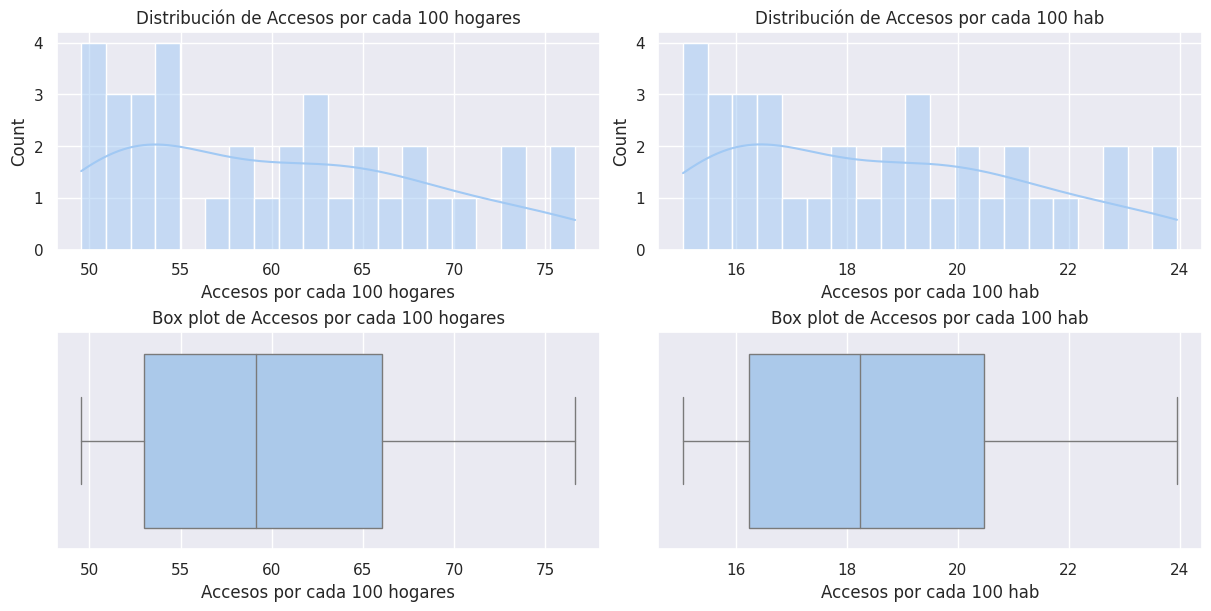

In [94]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 2, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'Accesos por cada 100 hogares'
sns.histplot(data = penetracion_internet_fijo, x = 'Accesos por cada 100 hogares', kde = True, bins=20, ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos por cada 100 hogares')
sns.boxplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hogares', linewidth = 1, ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos por cada 100 hogares')
# Histograma y boxplot de la columna 'Accesos por cada 100 hab'
sns.histplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hab', kde = True, bins=20, ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos por cada 100 hab')
sns.boxplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hab', linewidth = 1, ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos por cada 100 hab')

# Mostrar grafico completo
plt.show()

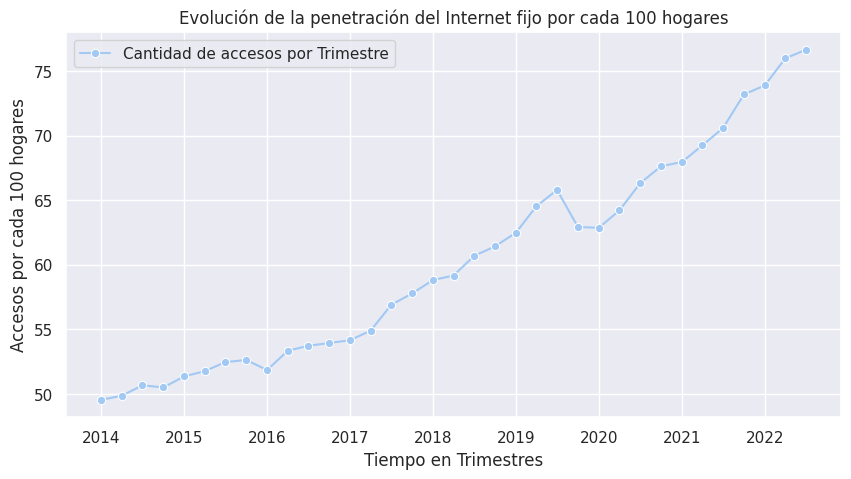

In [95]:
# Cargar los datos desde un archivo CSV
df = penetracion_internet_fijo.copy()

# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))
# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))
# Graficar la evolución de la penetración del Internet fijo por cada 100 hogares
sns.lineplot(x='Fecha', y='Accesos por cada 100 hogares', data=df, label='Cantidad de accesos por Trimestre', marker='o')
# Agregar etiquetas de ejes y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por cada 100 hogares")
plt.title("Evolución de la penetración del Internet fijo por cada 100 hogares")

# Mostrar grafico completo
plt.show()

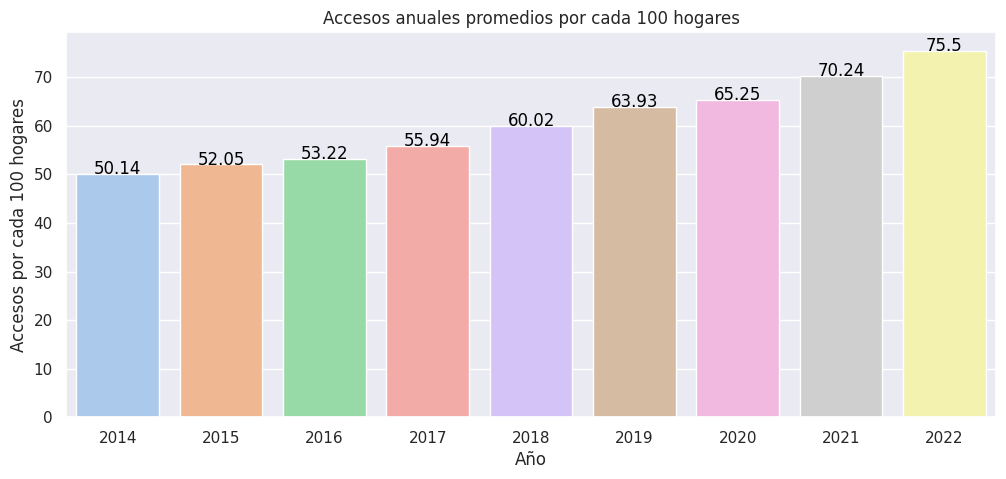

In [96]:
# Tamaño del gráfico
plt.figure(figsize=(12, 5))

# Crear el diagrama de barras de Accesos por cada 100 hogares
data_hogares = penetracion_internet_fijo.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()
grafico_hogares = sns.barplot(x='Año', y='Accesos por cada 100 hogares', data=data_hogares)
# Agregar etiquetas de eje y títulos del gráfico
plt.title('Accesos anuales promedios por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')

# Redondear las cifras en cada barra y agregarlas
for index, row in data_hogares.iterrows():
  cifra = round(row['Accesos por cada 100 hogares'], 2)
  grafico_hogares.text(row.name, row['Accesos por cada 100 hogares'], str(cifra), color='black', ha="center")

# Mostrar grafico completo
plt.show()

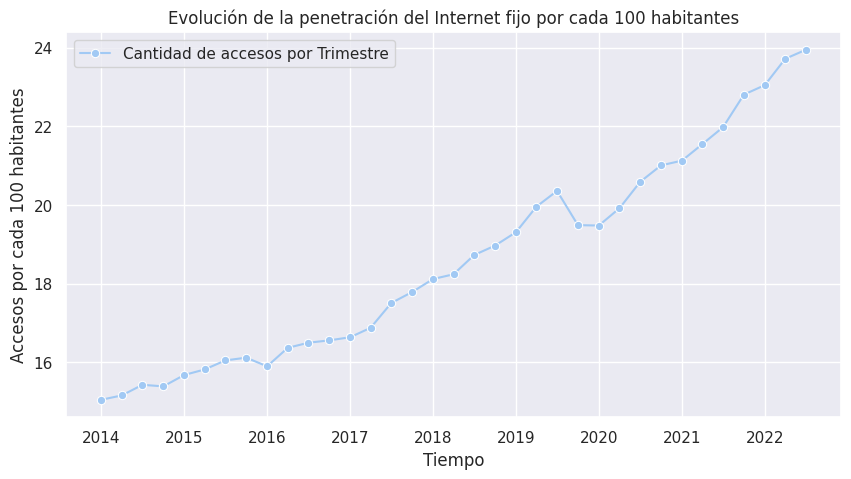

In [97]:
# Cargar los datos desde un archivo CSV
df = penetracion_internet_fijo.copy()

# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))

# Graficar la evolución de la penetración del Internet fijo por cada 100 habitantes
sns.lineplot(x='Fecha', y='Accesos por cada 100 hab', data=df, label='Cantidad de accesos por Trimestre', marker='o')
# Agregar etiquetas de eje y títulos del gráfico
plt.xlabel("Tiempo")
plt.ylabel("Accesos por cada 100 habitantes")
plt.title("Evolución de la penetración del Internet fijo por cada 100 habitantes")
# Mostrar grafico completo
plt.show()

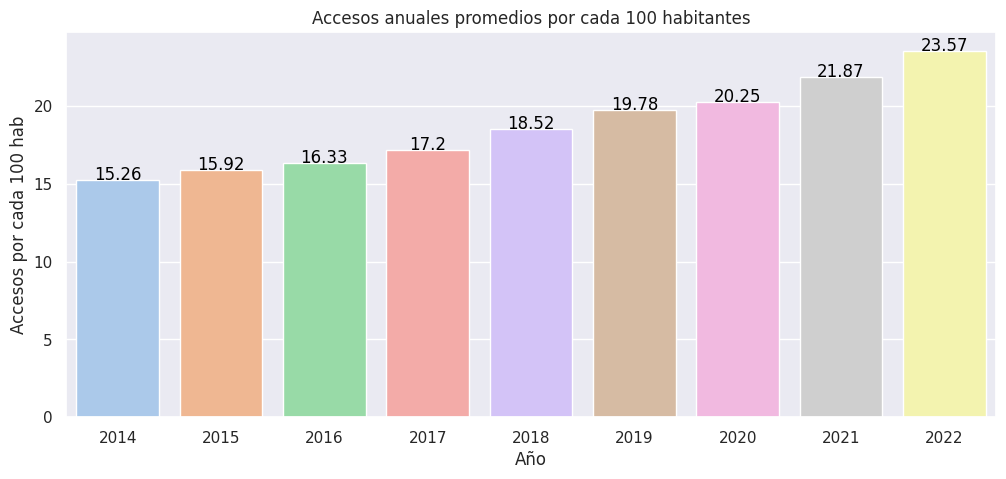

In [98]:
# Tamaño del gráfico
plt.figure(figsize=(12, 5))

# Crear el diagrama de barras de Accesos por cada 100 hab
data_hab = penetracion_internet_fijo.groupby('Año')['Accesos por cada 100 hab'].mean().reset_index()
grafico_hab = sns.barplot(x='Año', y='Accesos por cada 100 hab', data=data_hab)
# Agregar etiquetas de eje y títulos del gráfico
plt.title('Accesos anuales promedios por cada 100 habitantes')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')

# Redondear las cifras en cada barra y agregarlas
for index, row in data_hab.iterrows():
    cifra = round(row['Accesos por cada 100 hab'], 2)
    grafico_hab.text(row.name, row['Accesos por cada 100 hab'], str(cifra), color='black', ha="center")

# Mostrar grafico completo
plt.show()

Existen varias posibles explicaciones de por qué la penetración del Internet fijo es mayor por hogar que por habitante en Argentina.

1. Hogares con múltiples usuarios: Una posible explicación es que muchos hogares en Argentina tienen múltiples usuarios que comparten una única conexión de Internet fijo.

2. Hogares con mayores ingresos: Otra posible explicación es que los hogares con mayores ingresos tienden a tener una mayor penetración de Internet fijo.

3. Diferencias geográficas: La penetración del Internet fijo puede variar significativamente según la ubicación geográfica.

4. Diferentes necesidades de los usuarios: Los hogares tienen diferentes necesidades de Internet fijo dependiendo de su uso.

In [100]:
penetracion_internet_fijo.to_csv('penetracion_internet_fijo.csv', sep = ',', index = False)

### Penetración de Internet fijo (accesos por cada 100 hogares) *
Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia

In [102]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-51614/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 900})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_penetracion_hogares_prov = pd.read_csv(io.StringIO(csv_data), decimal = ",")

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [103]:
inter_penetracion_hogares_prov.head()

Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2022          3     Buenos Aires                         78.11
1  2022          3  Capital Federal                        122.28
2  2022          3        Catamarca                         65.33
3  2022          3            Chaco                         43.86
4  2022          3           Chubut                         84.38

In [104]:
inter_penetracion_hogares_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [105]:
inter_penetracion_hogares_prov.nunique()

Año                               9
Trimestre                         4
Provincia                        24
Accesos por cada 100 hogares    779
dtype: int64

In [106]:
inter_penetracion_hogares_prov.Provincia.unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [107]:
inter_penetracion_hogares_prov.describe()

Año   Trimestre  Accesos por cada 100 hogares
count   840.000000  840.000000                    840.000000
mean   2017.885714    2.457143                     49.065750
std       2.528745    1.105009                     23.151885
min    2014.000000    1.000000                      9.350000
25%    2016.000000    1.000000                     32.107500
50%    2018.000000    2.000000                     45.900000
75%    2020.000000    3.000000                     61.865000
max    2022.000000    4.000000                    124.060000

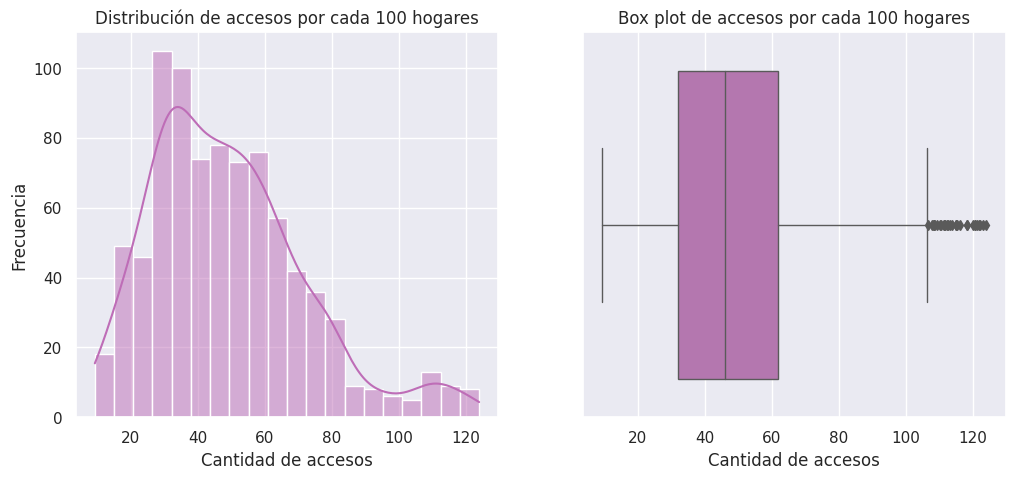

In [108]:
# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Histograma en el subplot de la izquierda "Accesos por cada 100 hogares"
sns.histplot(data = inter_penetracion_hogares_prov, x = 'Accesos por cada 100 hogares', kde =  True, color = '#BE6DB7', bins = 20, ax = ax1)
ax1.set_title('Distribución de accesos por cada 100 hogares')
ax1.set_xlabel('Cantidad de accesos')
ax1.set_ylabel('Frecuencia')

# Box plot en el subplot de la derecha
sns.boxplot(data = inter_penetracion_hogares_prov, x = 'Accesos por cada 100 hogares', color = '#BE6DB7', linewidth = 1, ax = ax2)
ax2.set_title('Box plot de accesos por cada 100 hogares')
ax2.set_xlabel('Cantidad de accesos')

# Mostrar la figura
plt.show()

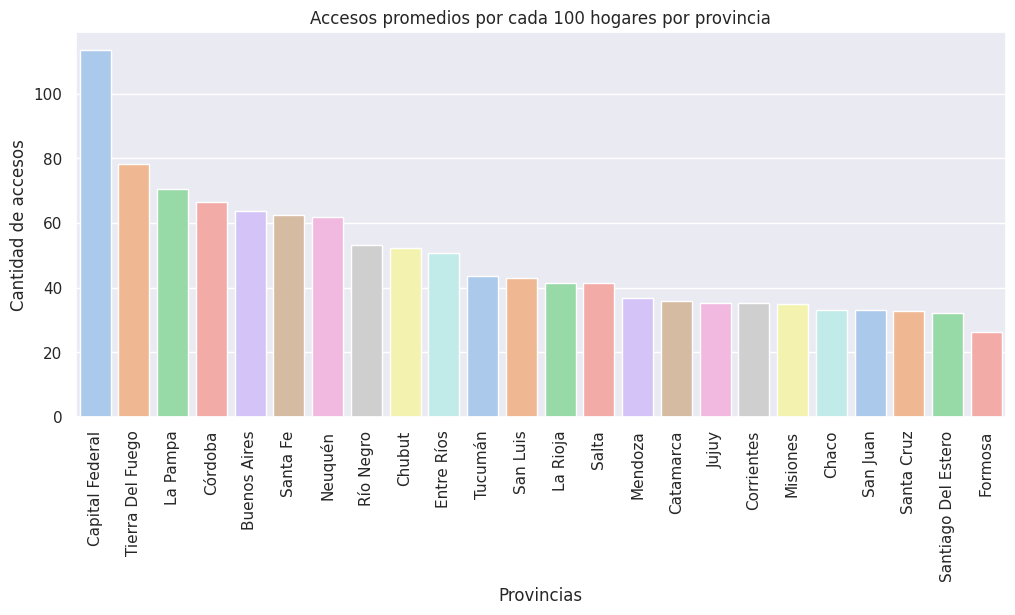

In [109]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(12, 5))

# Gráfico de barras de la columna "Provincia" vs "Accesos por cada 100 hogares"
df_provincias = inter_penetracion_hogares_prov.groupby('Provincia')['Accesos por cada 100 hogares'].mean().reset_index()
df_provincias = df_provincias.sort_values('Accesos por cada 100 hogares', ascending = False)
sns.barplot(data=df_provincias, x='Provincia', y='Accesos por cada 100 hogares')

# Agregar etiquetas de ejes y título del gráfico
plt.title('Accesos promedios por cada 100 hogares por provincia')
plt.xlabel('Provincias')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar la figura
plt.show()

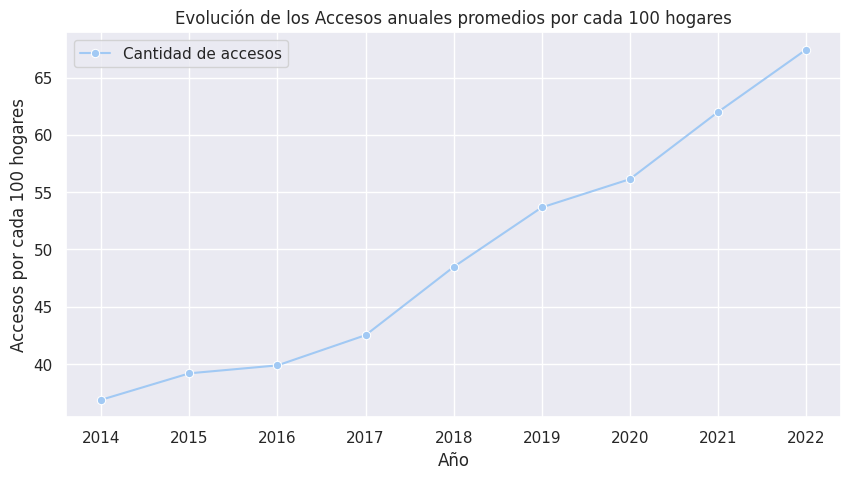

In [110]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))
# Gráfico de línea de la columna "Accesos por cada 100 hogares" vs "Año"
df_anual = inter_penetracion_hogares_prov.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()
sns.lineplot(x = 'Año', y = 'Accesos por cada 100 hogares', data = df_anual, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Evolución de los Accesos anuales promedios por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
# Mostrar la figura
plt.show()

In [111]:
# Dividir el DataFrame por regiones
patagonia = inter_penetracion_hogares_prov[inter_penetracion_hogares_prov['Provincia'].isin(['Tierra Del Fuego', 'Santa Cruz', 'Chubut',
                                                                                             'Neuquén', 'Río Negro'])]
cuyo = inter_penetracion_hogares_prov[inter_penetracion_hogares_prov['Provincia'].isin(['Mendoza', 'San Luis', 'San Juan'])]
pampeana = inter_penetracion_hogares_prov[inter_penetracion_hogares_prov['Provincia'].isin(['Buenos Aires', 'Capital Federal' ,'Santa Fe', 'Córdoba',
                                                                                            'La Pampa'])]
noroeste = inter_penetracion_hogares_prov[inter_penetracion_hogares_prov['Provincia'].isin(['La Rioja', 'Catamarca', 'Tucumán',
                                                                                            'Santiago Del Estero', 'Salta', 'Jujuy'])]
noreste = inter_penetracion_hogares_prov[inter_penetracion_hogares_prov['Provincia'].isin(['Chaco', 'Formosa', 'Corrientes', 'Entre Ríos',
                                                                                           'Misiones'])]

Es importante tener en cuenta que estas divisiones no son oficiales y pueden variar según la fuente que se consulte.

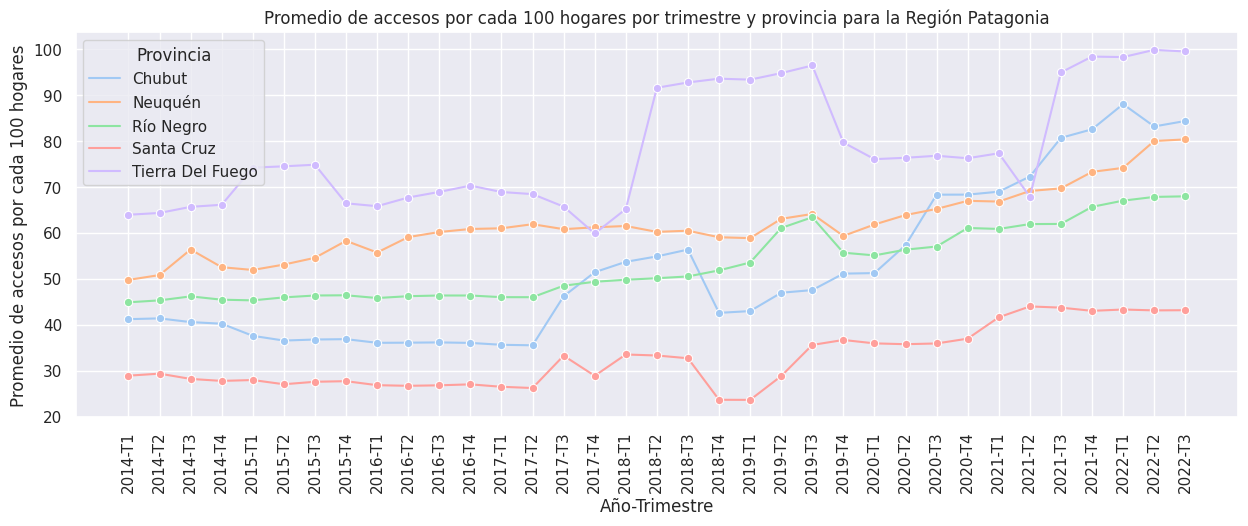

In [112]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 hogares"
df_promedio = patagonia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hogares'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hogares', hue='Provincia', style='Provincia', dashes=False,
            marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos por cada 100 hogares por trimestre y provincia para la Región Patagonia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 hogares')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
plt.show()

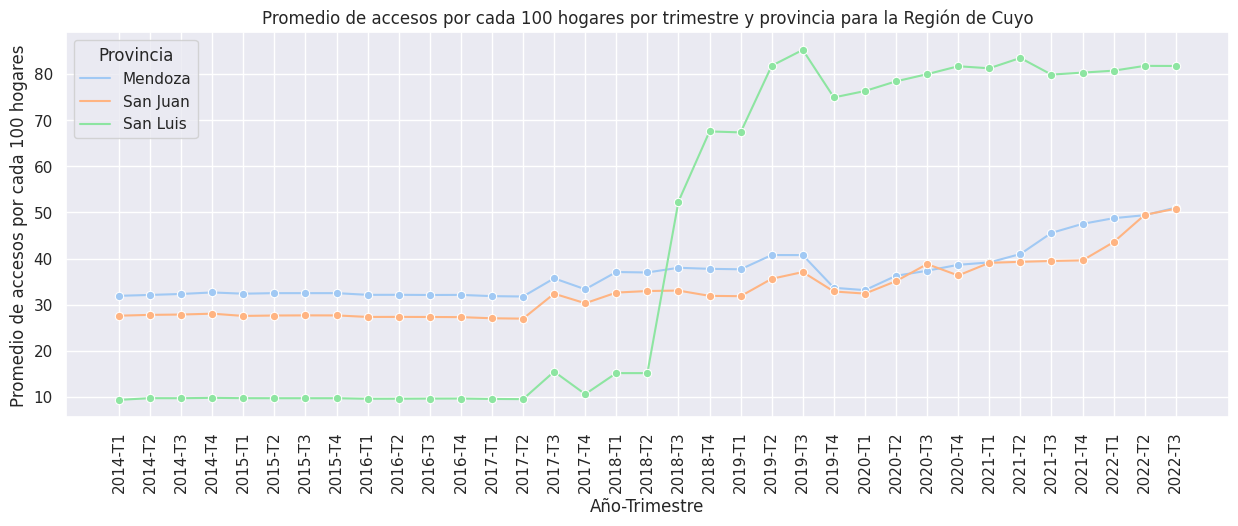

In [113]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 hogares"
df_promedio = cuyo.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hogares'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hogares', hue='Provincia', style='Provincia', dashes=False,
             marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos por cada 100 hogares por trimestre y provincia para la Región de Cuyo')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 hogares')
plt.xticks(rotation=90) # Rotar los nombres en el eje x
plt.show()

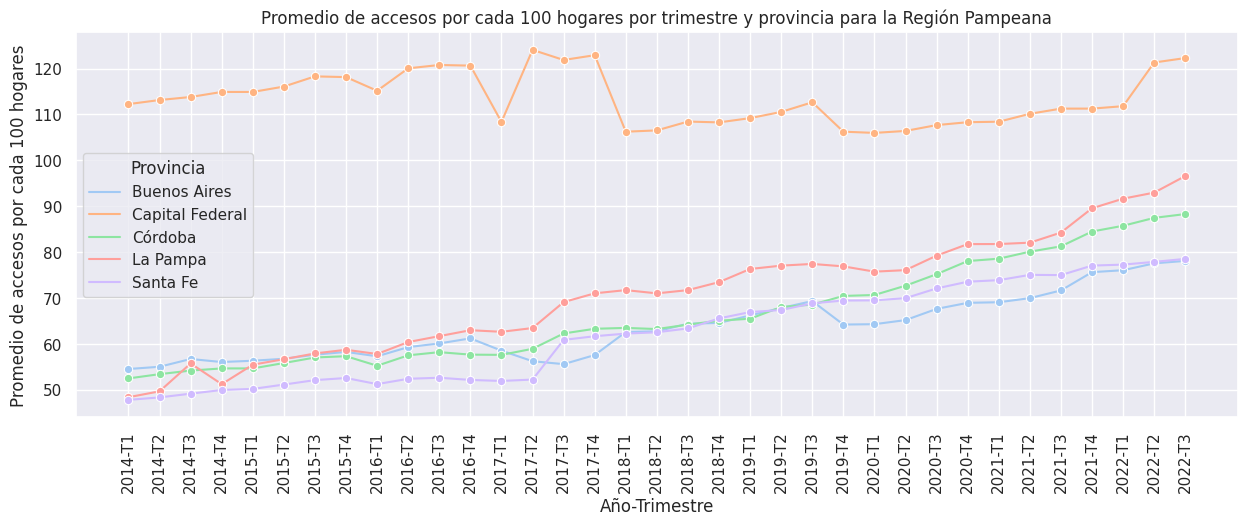

In [114]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 hogares"
df_promedio = pampeana.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hogares'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hogares', hue='Provincia', style='Provincia', dashes=False,
             marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos por cada 100 hogares por trimestre y provincia para la Región Pampeana')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 hogares')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
plt.show()

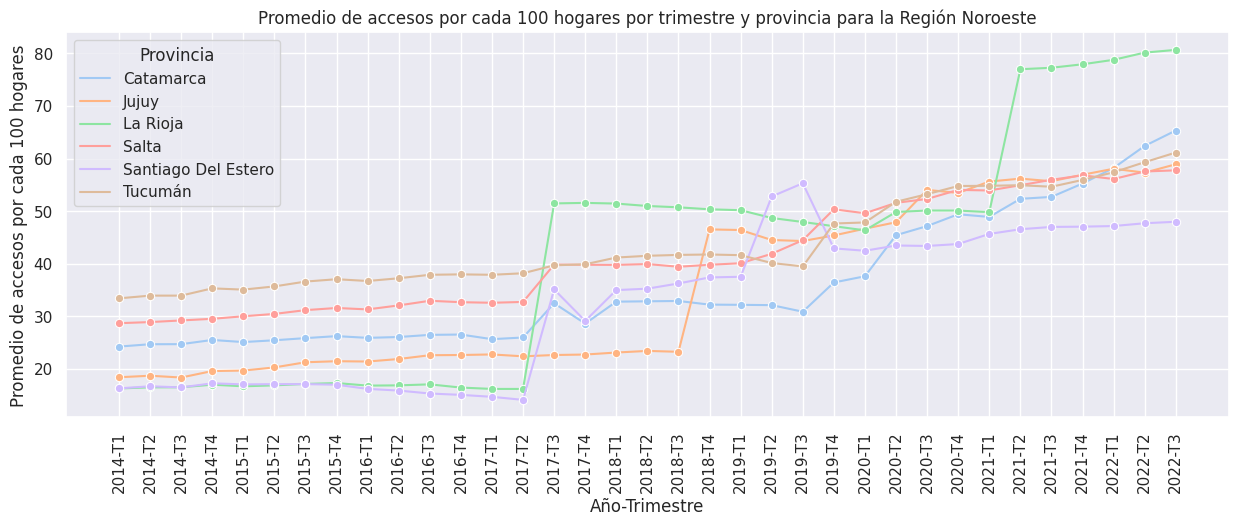

In [115]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 hogares"
df_promedio = noroeste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hogares'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hogares', hue='Provincia', style='Provincia', dashes=False,
             marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos por cada 100 hogares por trimestre y provincia para la Región Noroeste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 hogares')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
plt.show()

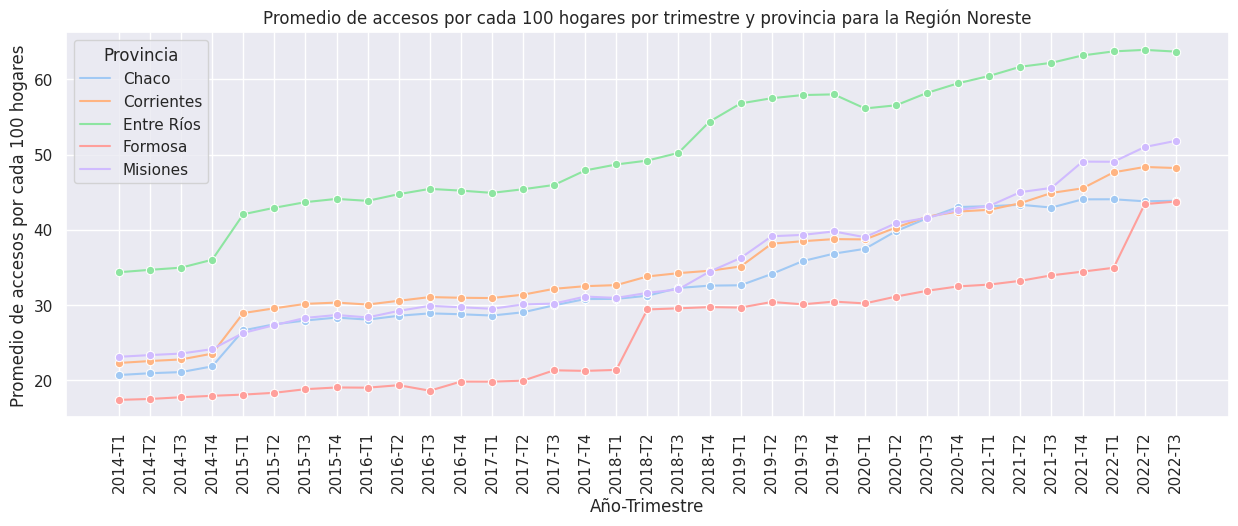

In [116]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 hogares"
df_promedio = noreste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hogares'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hogares', hue='Provincia', style='Provincia', dashes=False,
             marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos por cada 100 hogares por trimestre y provincia para la Región Noreste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 hogares')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
plt.show()

#### Penetración del Internet Fijo por hogares del año 2014-2023

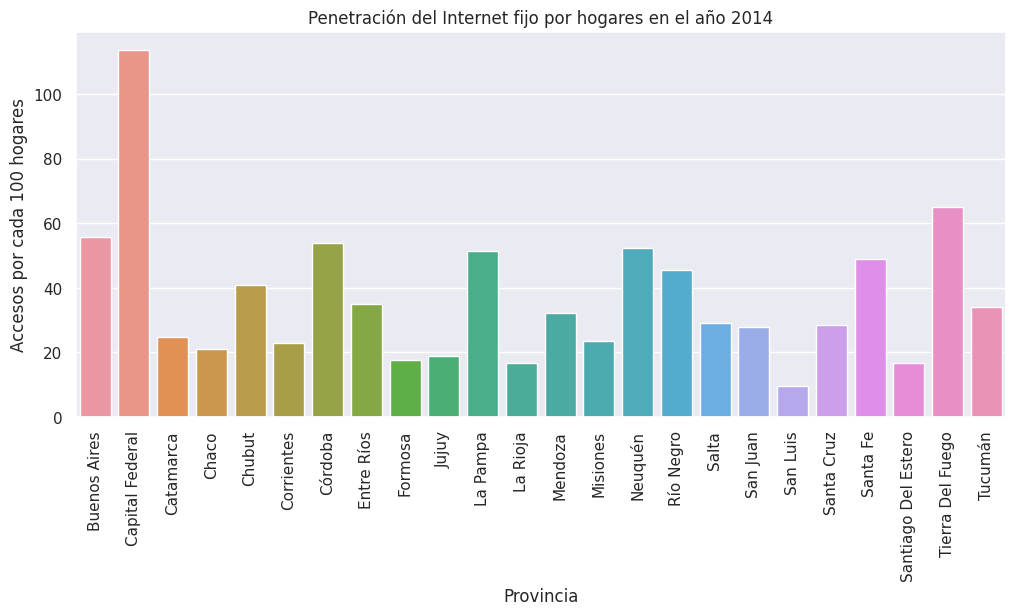

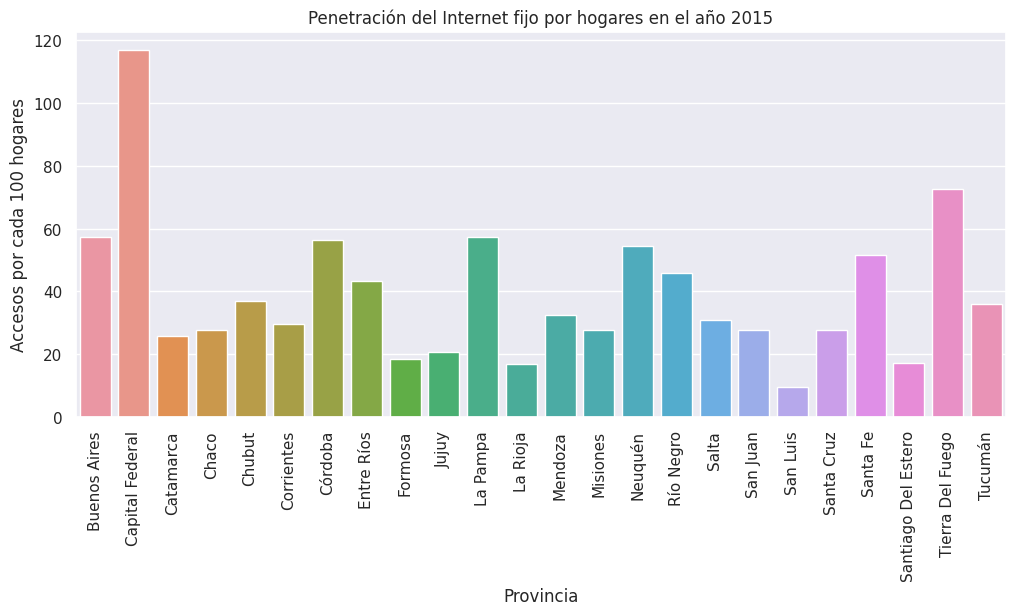

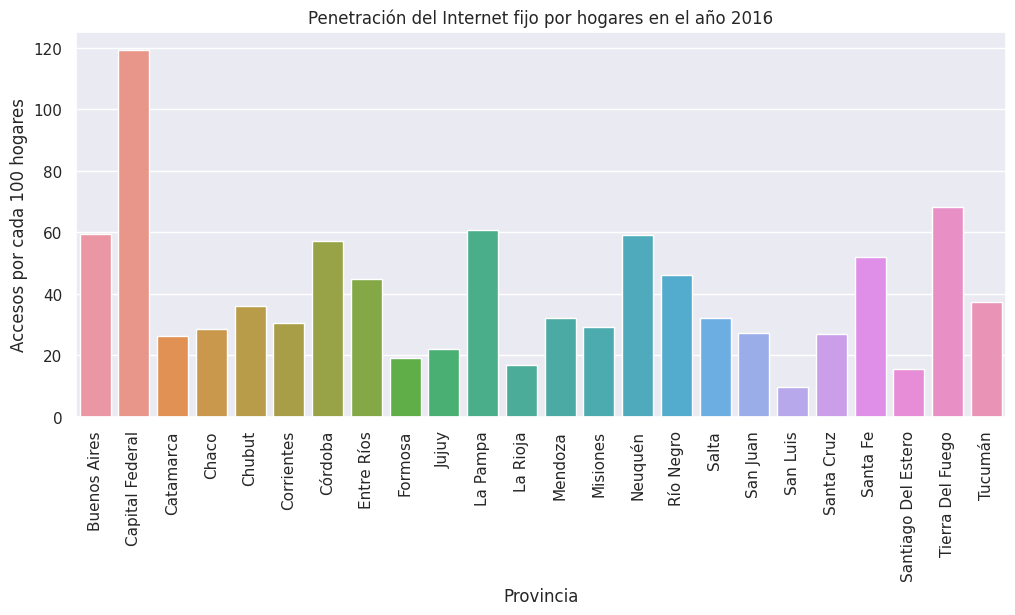

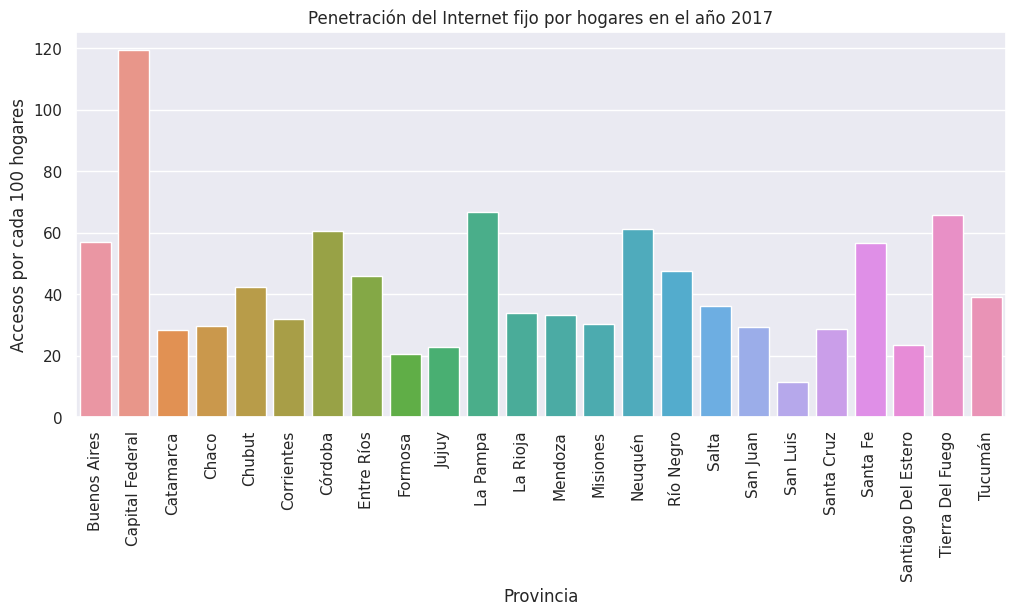

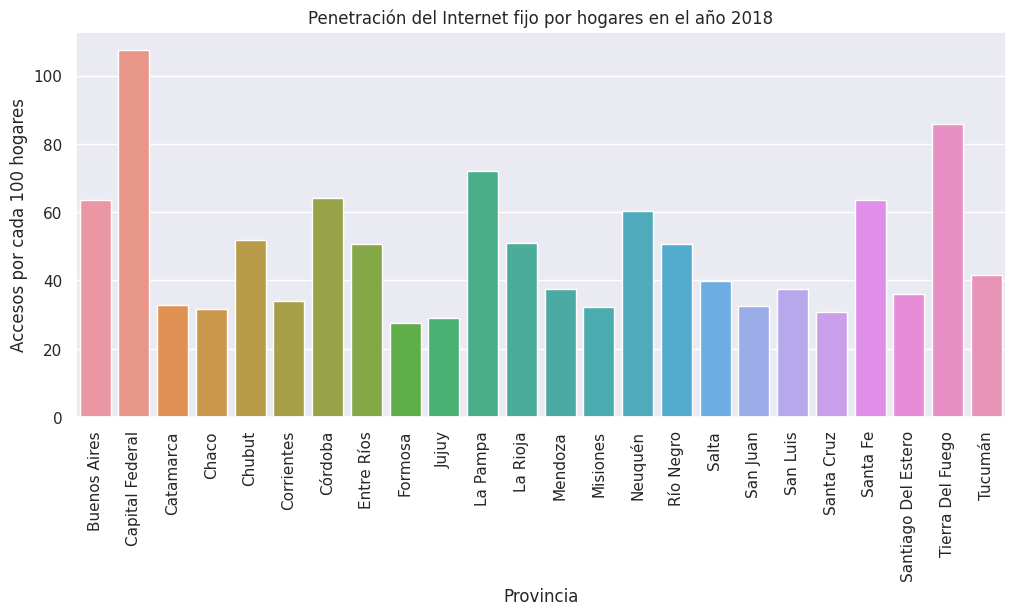

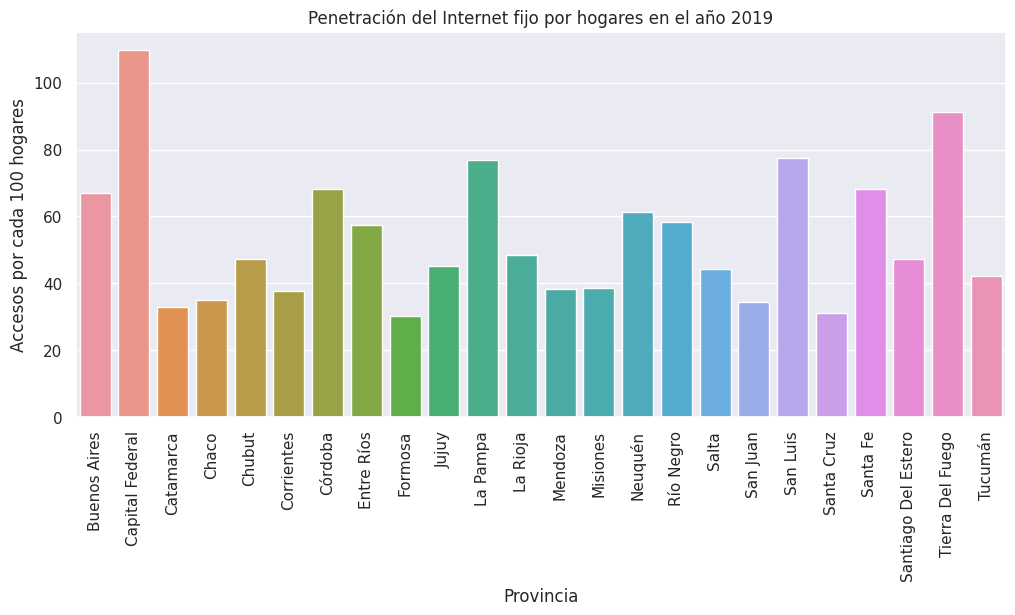

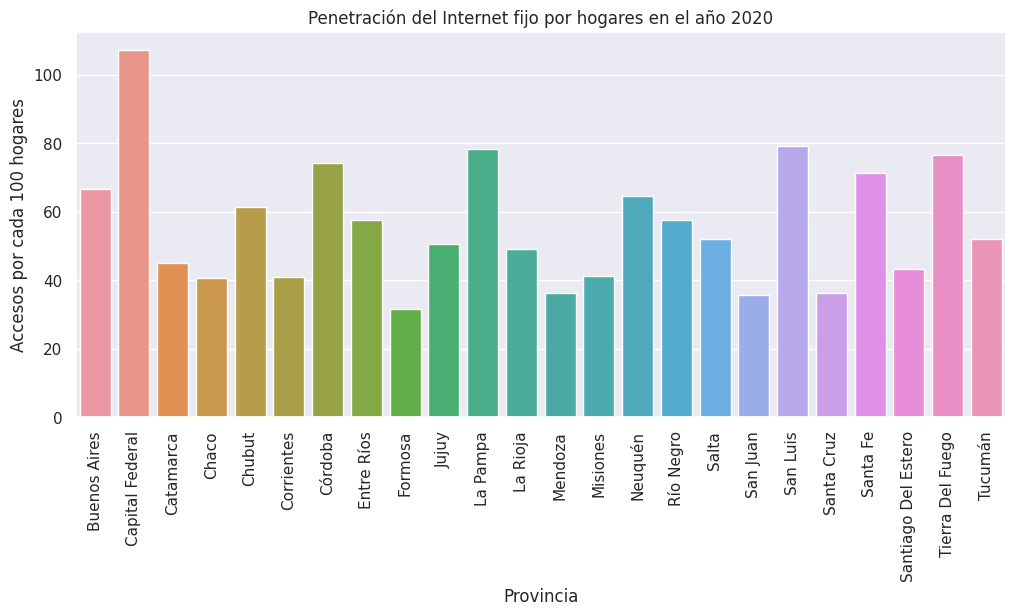

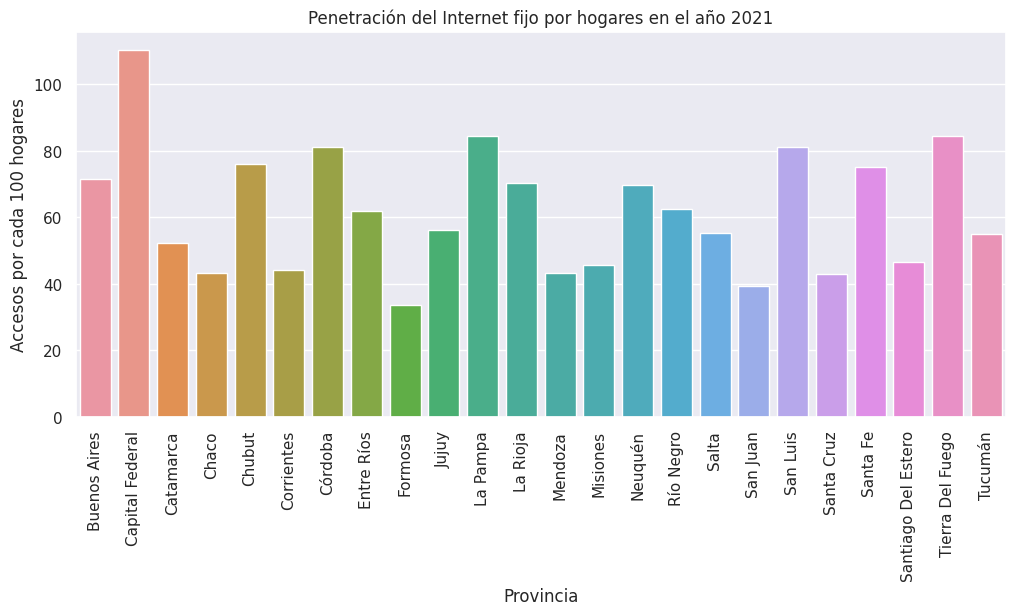

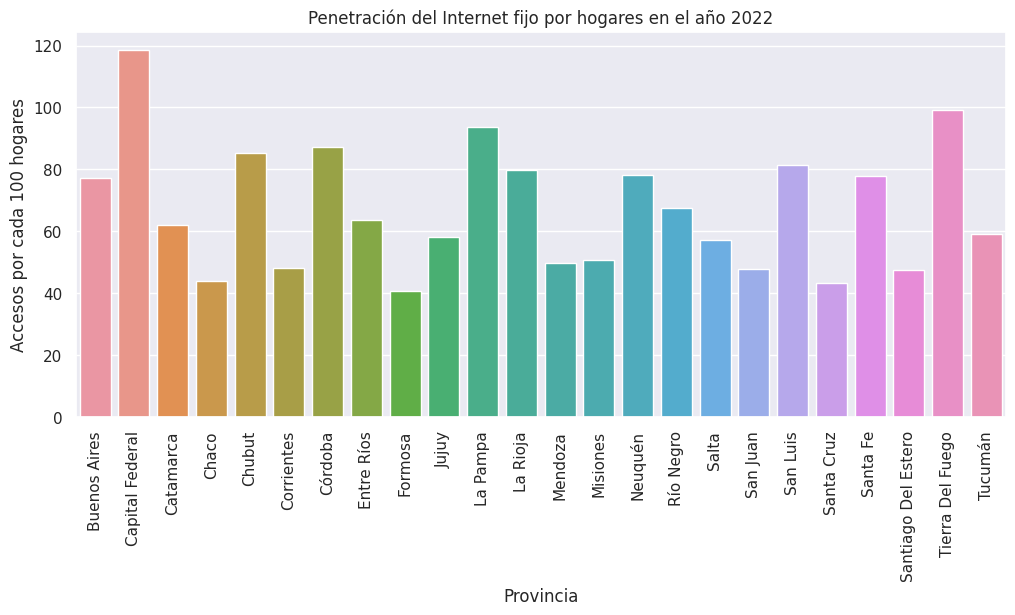

In [118]:
# Agrupar los datos por provincia y año y calcular la media de la penetración del Internet fijo por hogares
df_resumen = inter_penetracion_hogares_prov.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().reset_index()

# Generar un gráfico de barras para cada año
for year in df_resumen['Año'].unique():
  df_year = df_resumen[df_resumen['Año'] == year]
  plt.figure(figsize=(12, 5))
  sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_year)
  plt.title('Penetración del Internet fijo por hogares en el año {}'.format(year))
  plt.xticks(rotation=90)
  plt.show()

**Conclusiones:**

Los diagramas de barras por año muestran que la penetración del Internet fijo por hogares ha aumentado en las provincias argentinas desde 2014 hasta 2022. En 2014, solo 9 de las 24 provincias tenían una penetración del Internet fijo por hogares del 40%, mientras que para 2022, todas las provincias garantizaban un mínimo del 40% de hogares con acceso a Internet.

Cabe destacar que en la Ciudad Autónoma de Buenos Aires, la penetración del Internet fijo por hogares superó el 100% desde 2014 hasta 2022, lo que indica que, en promedio, cada hogar en esa área tiene más de un acceso al Internet fijo. Esto puede deberse a una mayor adopción de la tecnología en esa área o a una mayor oferta de servicios de Internet fijo por parte de los proveedores de servicios de Internet.

Sin embargo, en 2022, las provincias de Santa Cruz, Santiago del Estero, Chaco, Formosa y Corrientes aún tienen una penetración del Internet fijo por hogares por debajo del promedio. Esto puede deberse a factores como la infraestructura limitada, el bajo poder adquisitivo de los hogares, la falta de competencia y la falta de inversión en estas áreas.



In [122]:
# Agrupar los datos por provincia y año y calcular la media de la penetración del Internet fijo por hogares
df_resumen = inter_penetracion_hogares_prov.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().reset_index()

# Generar el gráfico de barras agrupadas
fig = go.Figure(data=[
    go.Bar(name='2014', x=df_resumen[df_resumen['Año'] == 2014]['Provincia'], y=df_resumen[df_resumen['Año'] == 2014]['Accesos por cada 100 hogares']),
    go.Bar(name='2015', x=df_resumen[df_resumen['Año'] == 2015]['Provincia'], y=df_resumen[df_resumen['Año'] == 2015]['Accesos por cada 100 hogares']),
    go.Bar(name='2016', x=df_resumen[df_resumen['Año'] == 2016]['Provincia'], y=df_resumen[df_resumen['Año'] == 2016]['Accesos por cada 100 hogares']),
    go.Bar(name='2017', x=df_resumen[df_resumen['Año'] == 2017]['Provincia'], y=df_resumen[df_resumen['Año'] == 2017]['Accesos por cada 100 hogares']),
    go.Bar(name='2018', x=df_resumen[df_resumen['Año'] == 2018]['Provincia'], y=df_resumen[df_resumen['Año'] == 2018]['Accesos por cada 100 hogares']),
    go.Bar(name='2019', x=df_resumen[df_resumen['Año'] == 2019]['Provincia'], y=df_resumen[df_resumen['Año'] == 2019]['Accesos por cada 100 hogares']),
    go.Bar(name='2020', x=df_resumen[df_resumen['Año'] == 2020]['Provincia'], y=df_resumen[df_resumen['Año'] == 2020]['Accesos por cada 100 hogares']),
    go.Bar(name='2021', x=df_resumen[df_resumen['Año'] == 2021]['Provincia'], y=df_resumen[df_resumen['Año'] == 2021]['Accesos por cada 100 hogares']),
    go.Bar(name='2022', x=df_resumen[df_resumen['Año'] == 2022]['Provincia'], y=df_resumen[df_resumen['Año'] == 2022]['Accesos por cada 100 hogares'])
])

# Actualizar las opciones del diseño del gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-90,
                  title = dict(text='Penetración anual del Internet fijo por hogares en cada provincia',
                             x=0.5, y=0.95, xanchor='center', yanchor='top'),
                  width=1200, height=500)

# Mostrar el gráfico
fig.show()

In [123]:
inter_penetracion_hogares_prov.to_csv('penetracion_hogares_provincia.csv', sep = ',', index = False)

### Penetración del Internet fijo por provincia (accesos por cada 100 habitantes)

Penetración del servicio de Internet fijo (métrica: población)

In [101]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-POR/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 900})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_penetracion_hab_prov = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [ ]:
inter_penetracion_hab_prov.head()

Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2022          3     Buenos Aires                        26
1  2022          3  Capital Federal                        50
2  2022          3        Catamarca                        17
3  2022          3            Chaco                        12
4  2022          3           Chubut                        26

In [ ]:
inter_penetracion_hab_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       840 non-null    int64 
 1   Trimestre                 840 non-null    int64 
 2   Provincia                 840 non-null    object
 3   Accesos por cada 100 hab  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [ ]:
inter_penetracion_hab_prov.nunique()

Año                          9
Trimestre                    4
Provincia                   24
Accesos por cada 100 hab    38
dtype: int64

In [ ]:
inter_penetracion_hab_prov.describe()

Año   Trimestre  Accesos por cada 100 hab
count   840.000000  840.000000                840.000000
mean   2017.885714    2.457143                 14.658333
std       2.528745    1.105009                  8.989528
min    2014.000000    1.000000                  3.000000
25%    2016.000000    1.000000                  8.000000
50%    2018.000000    2.000000                 13.000000
75%    2020.000000    3.000000                 19.000000
max    2022.000000    4.000000                 52.000000

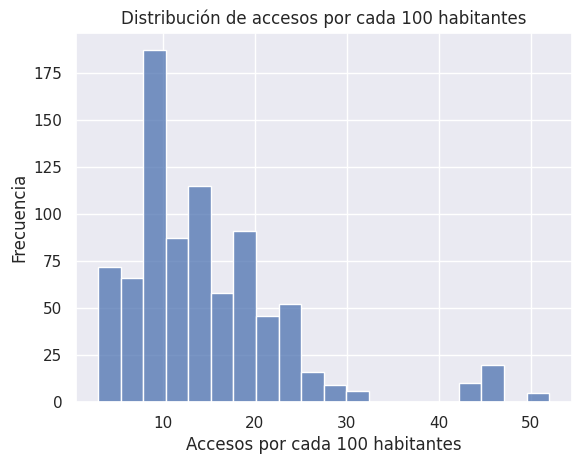

In [ ]:
# Histograma de la columna "Accesos por cada 100 habitantes"
sns.histplot(data=inter_penetracion_hab_prov, x='Accesos por cada 100 hab', bins=20)
plt.title('Distribución de accesos por cada 100 habitantes')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Frecuencia')
plt.show()

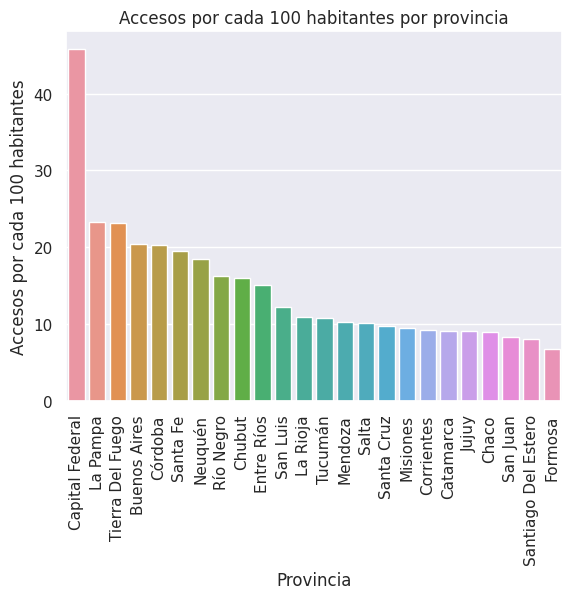

In [ ]:
# Gráfico de barras de la columna "Provincia" vs "Accesos por cada 100 habitantes"
df_provincias = inter_penetracion_hab_prov.groupby('Provincia')['Accesos por cada 100 hab'].mean().reset_index()
df_provincias = df_provincias.sort_values('Accesos por cada 100 hab', ascending = False)
sns.barplot(data = df_provincias, x = 'Provincia', y = 'Accesos por cada 100 hab')
plt.xticks(rotation=90)
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 habitantes')
plt.show()

In [ ]:
# Dividir el DataFrame en tres DataFrames
df_1 = inter_penetracion_hab_prov[inter_penetracion_hab_prov['Provincia'].isin(['Capital Federal', 'Tierra Del Fuego', 'La Pampa',
                                                                                        'Córdoba', 'Buenos Aires', 'Neuquén', 'Río Negro'])]
df_2 = inter_penetracion_hab_prov[inter_penetracion_hab_prov['Provincia'].isin(['Chubut', 'Entre Ríos', 'Tucumán', 'San Luis', 'La Rioja',
                                                                                        'Salta', 'Mendoza', 'Catamarca'])]
df_3 = inter_penetracion_hab_prov[inter_penetracion_hab_prov['Provincia'].isin(['Jujuy', 'Corrientes', 'Misiones', 'Chaco', 'San Juan',
                                                                                        'Santa Cruz', 'Santiago del Estero', 'Formosa'])]

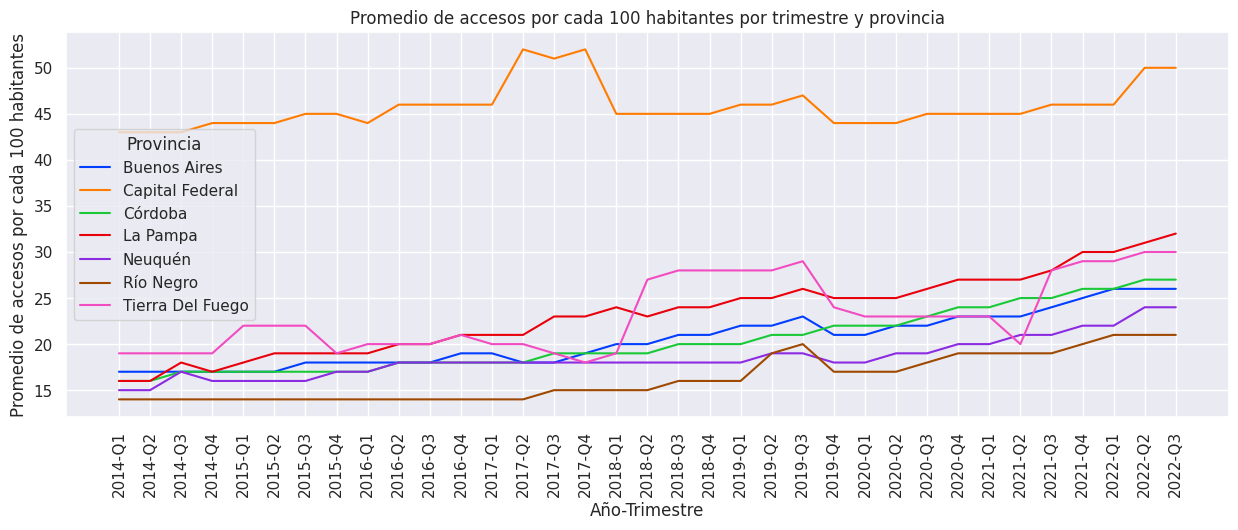

In [ ]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 habitantes"
df_promedio = df_1.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-Q' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hab', hue='Provincia', style='Provincia', dashes=False, palette='bright')
plt.title('Promedio de accesos por cada 100 habitantes por trimestre y provincia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 habitantes')
plt.xticks(rotation=90) # Rotar los nombres en el eje x
plt.show()

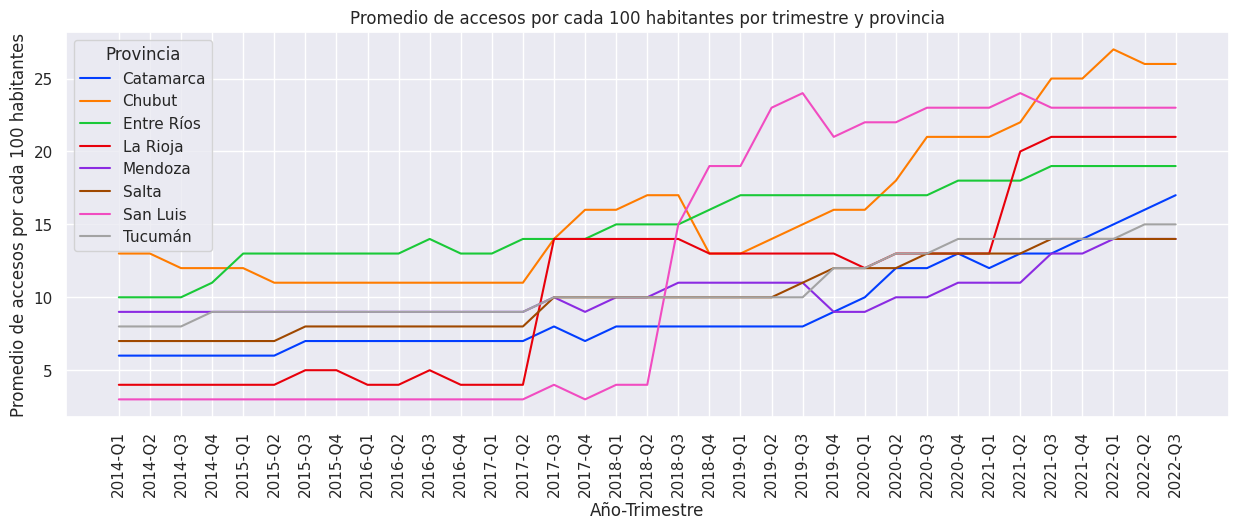

In [ ]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 habitantes"
df_promedio = df_2.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-Q' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hab', hue='Provincia', style='Provincia', dashes=False, palette='bright')
plt.title('Promedio de accesos por cada 100 habitantes por trimestre y provincia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 habitantes')
plt.xticks(rotation=90) # Rotar los nombres en el eje x
plt.show()

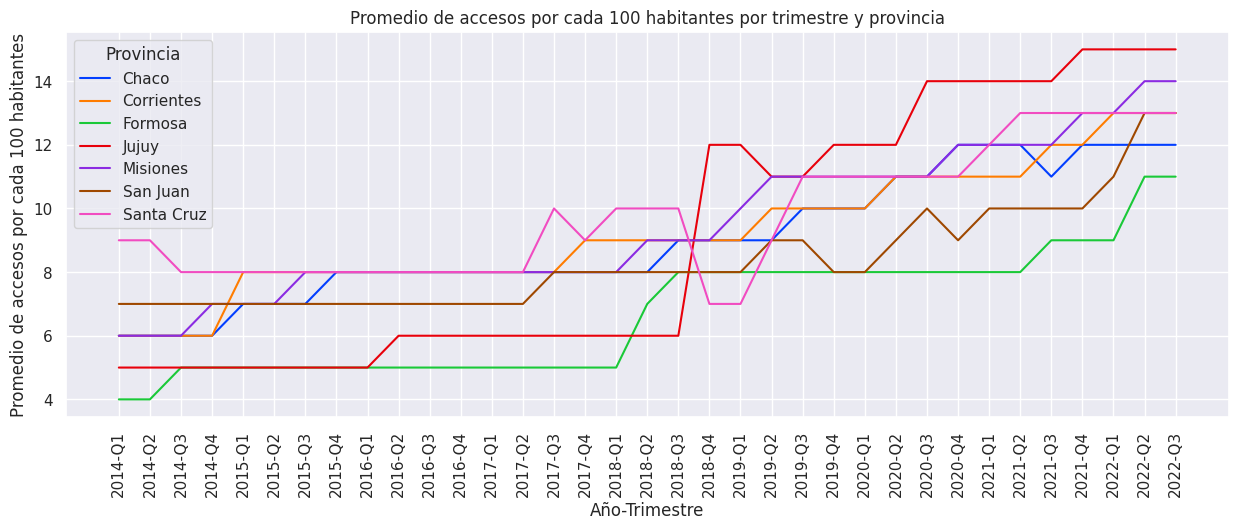

In [ ]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Accesos por cada 100 habitantes"
df_promedio = df_3.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-Q' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Accesos por cada 100 hab', hue='Provincia', style='Provincia', dashes=False, palette='bright')
plt.title('Promedio de accesos por cada 100 habitantes por trimestre y provincia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos por cada 100 habitantes')
plt.xticks(rotation=90) # Rotar los nombres en el eje x
plt.show()

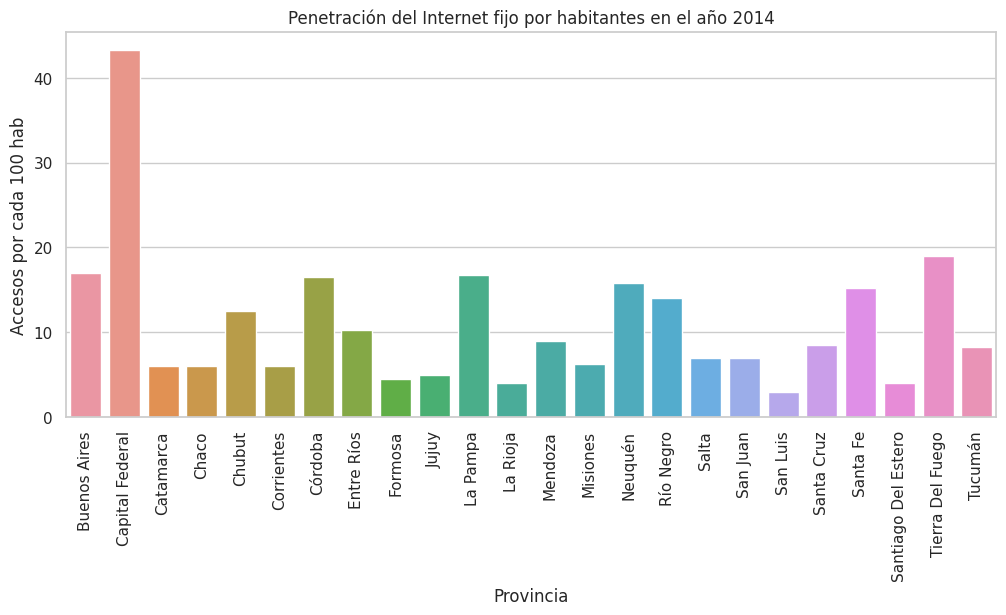

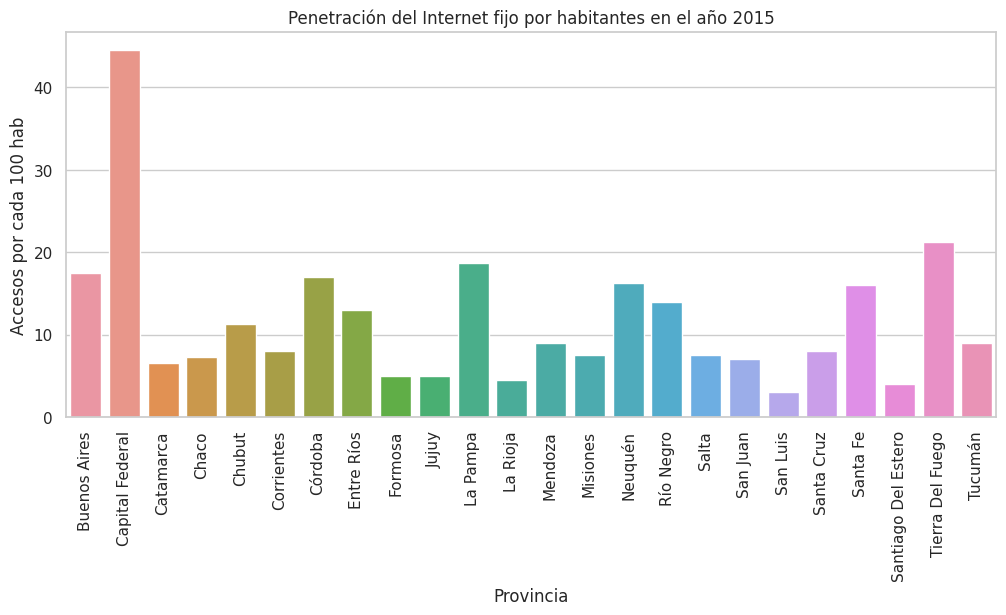

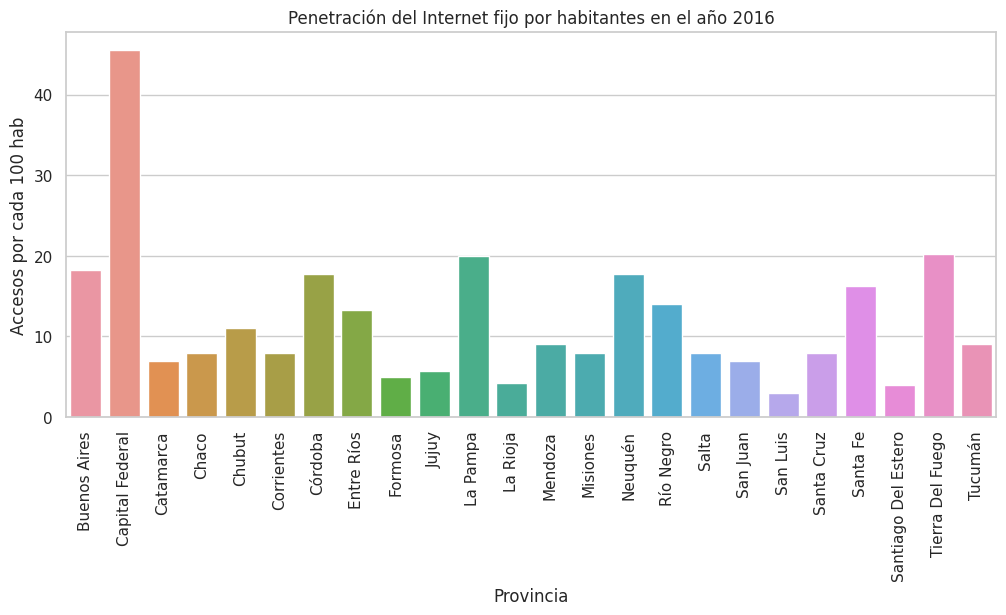

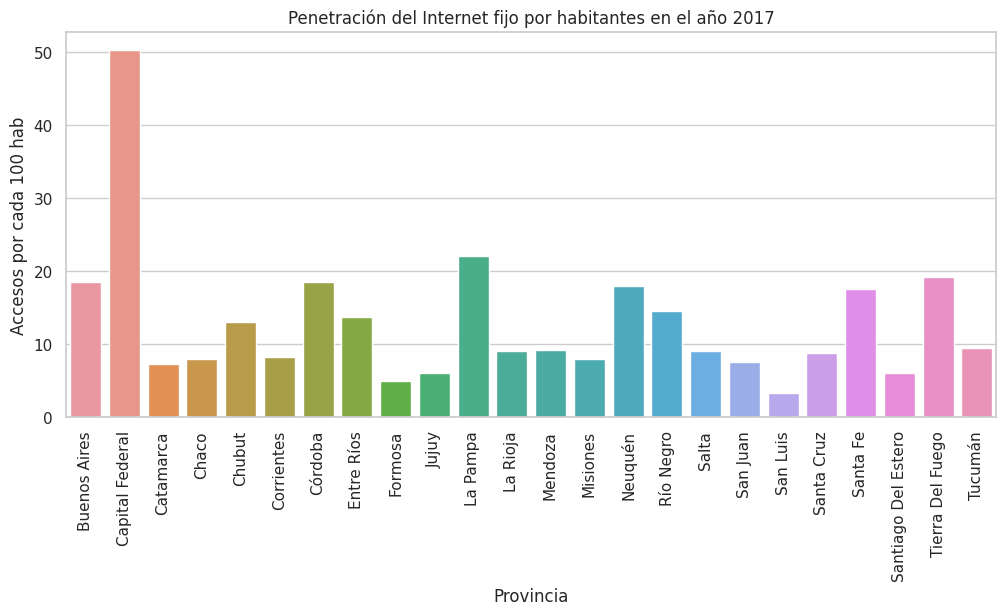

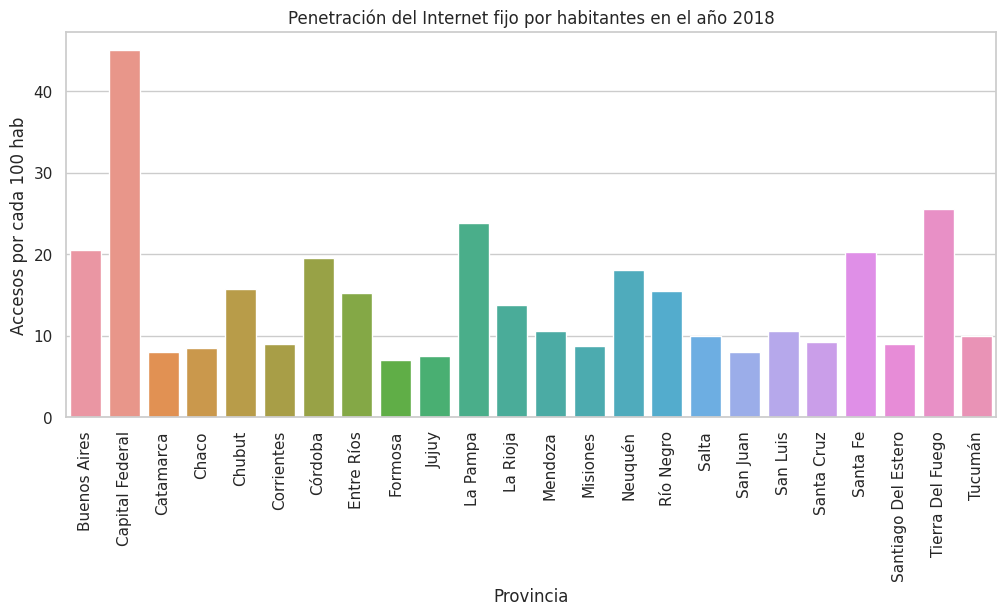

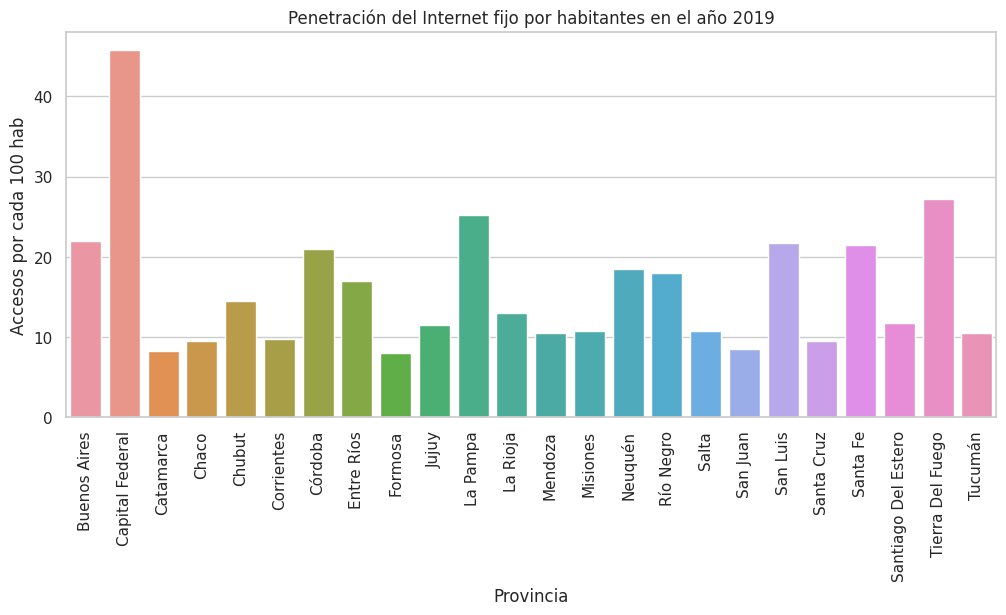

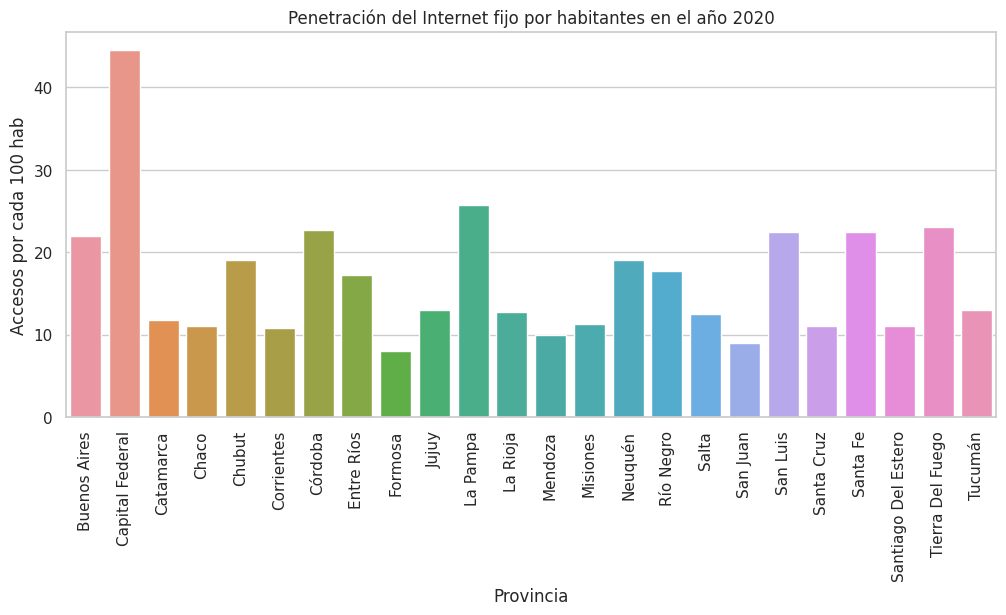

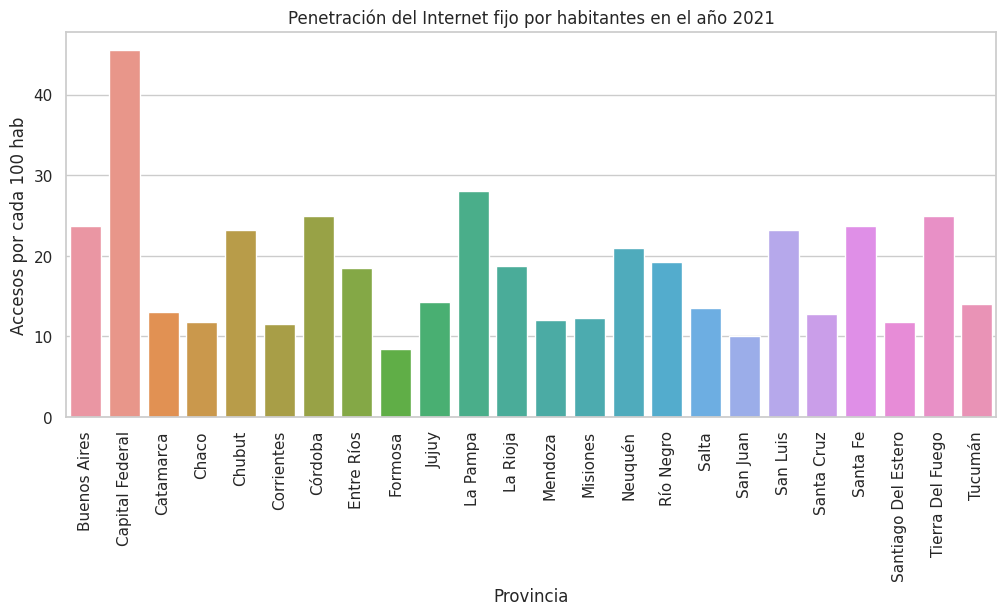

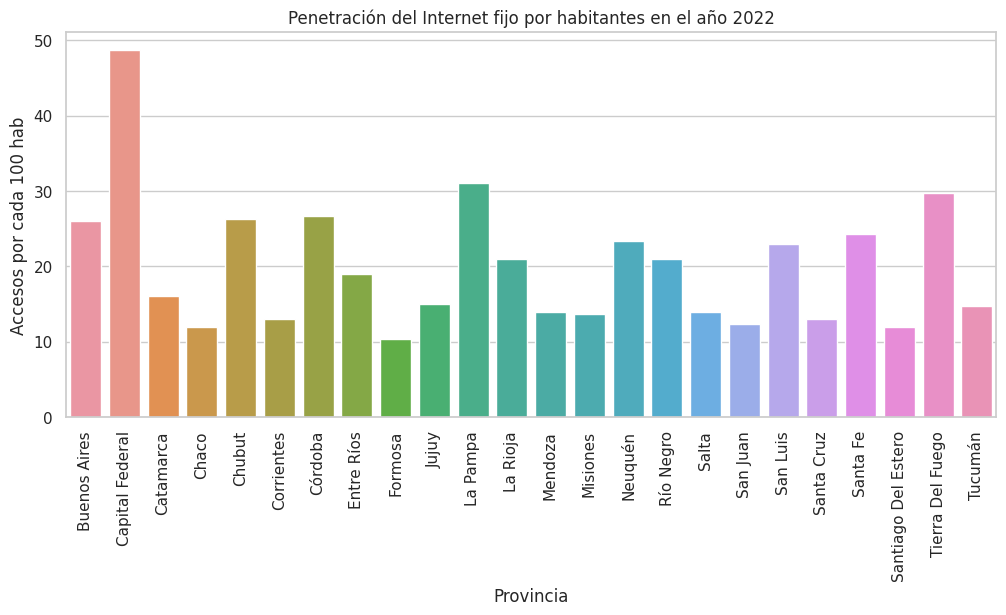

In [ ]:
# Agrupar los datos por provincia y año y calcular la media de la penetración del Internet fijo por habitantes
df_resumen = inter_penetracion_hab_prov.groupby(['Provincia', 'Año'])['Accesos por cada 100 hab'].mean().reset_index()

# Generar un gráfico de barras para cada año
for year in df_resumen['Año'].unique():
  df_year = df_resumen[df_resumen['Año'] == year]
  plt.figure(figsize=(12, 5))
  sns.barplot(x='Provincia', y='Accesos por cada 100 hab', data=df_year)
  plt.title('Penetración del Internet fijo por habitantes en el año {}'.format(year))
  plt.xticks(rotation=90)
  plt.show()

## Acceso a Internet fijo: banda ancha y banda angosta

### Total nacional de accesos a Internet fijo por banda ancha y banda angosta

Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)

In [129]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/TOTAL-NACIO-DE-ACCES-48866/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  internet_baf = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [130]:
internet_baf.head()

Año  Trimestre Banda ancha fija  Dial up       Total        Periodo
0  2022          3       11.078.691   12.437  11.091.128  Jul-Sept 2022
1  2022          2       10.946.248   12.436  10.958.684   Abr-Jun 2022
2  2022          1       10.611.390   12.619  10.624.009   Ene-Mar 2022
3  2021          4       10.476.933   12.861  10.489.794   Oct-Dic 2021
4  2021          3       10.075.184   10.357  10.085.541  Jul-Sept 2021

In [131]:
internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [132]:
internet_baf['Dial up'].describe()

count    35.000000
mean     23.383371
std      10.087397
min       9.991000
25%      12.436500
50%      26.911000
75%      32.508500
max      39.324000
Name: Dial up, dtype: float64

In [133]:
# Convertir la columna "Banda ancha fija" a numérica
internet_baf['Banda ancha fija'] = internet_baf['Banda ancha fija'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Dial up" a tipo de dato int
internet_baf['Dial up'] = (internet_baf['Dial up'] * 1000).astype(int)
# Convertir la columna "Total" a numérica
internet_baf['Total'] = internet_baf['Total'].replace('[^0-9]', '', regex=True).astype(int)

In [134]:
internet_baf[['Banda ancha fija', 'Dial up', 'Total']].head()

Banda ancha fija  Dial up     Total
0          11078691    12437  11091128
1          10946248    12436  10958684
2          10611390    12619  10624009
3          10476933    12861  10489794
4          10075184    10357  10085541

In [135]:
internet_baf.nunique()

Año                  9
Trimestre            4
Banda ancha fija    35
Dial up             32
Total               35
Periodo             35
dtype: int64

In [136]:
internet_baf.describe()

Año  Trimestre  Banda ancha fija       Dial up         Total
count    35.000000  35.000000      3.500000e+01     35.000000  3.500000e+01
mean   2017.885714   2.457143      8.274417e+06  23383.371429  8.297800e+06
std       2.564135   1.120474      1.408774e+06  10087.397193  1.399611e+06
min    2014.000000   1.000000      6.362108e+06   9991.000000  6.398398e+06
25%    2016.000000   1.500000      7.024946e+06  12436.500000  7.057455e+06
50%    2018.000000   2.000000      8.083533e+06  26911.000000  8.110444e+06
75%    2020.000000   3.000000      9.244537e+06  32508.500000  9.260442e+06
max    2022.000000   4.000000      1.107869e+07  39324.000000  1.109113e+07

- El número de accesos al Internet fijo por ```Banda ancha fija``` es significativamente mayor que el número de accesos por ```Dial up```. La media de accesos por ```Banda ancha fija``` es de 8.27 millones, mientras que la media de accesos por ```Dial up``` es de tan solo de 23 mil

- La cantidad de accesos al Internet fijo por ```Banda ancha fija``` ha aumentado de forma constante a lo largo del tiempo, con una media de 8.27 millones de accesos. Por otro lado, el número de accesos por ```Dial up``` ha disminuido considerablemente y se mantiene en niveles muy bajos, con una media de tan solo 23383 accesos.

- La desviación estándar de la columna de ```Banda ancha fija``` es de 1.41 millones, lo que indica que hay una variación relativamente baja en los datos. Por otro lado, la desviación estándar de la columna de ```Dial up``` es de 10087, lo que indica una variación mucho mayor en estos datos. Esto sugiere que la columna de ```Dial up``` es más volátil y puede estar sujeta a fluctuaciones más significativas.

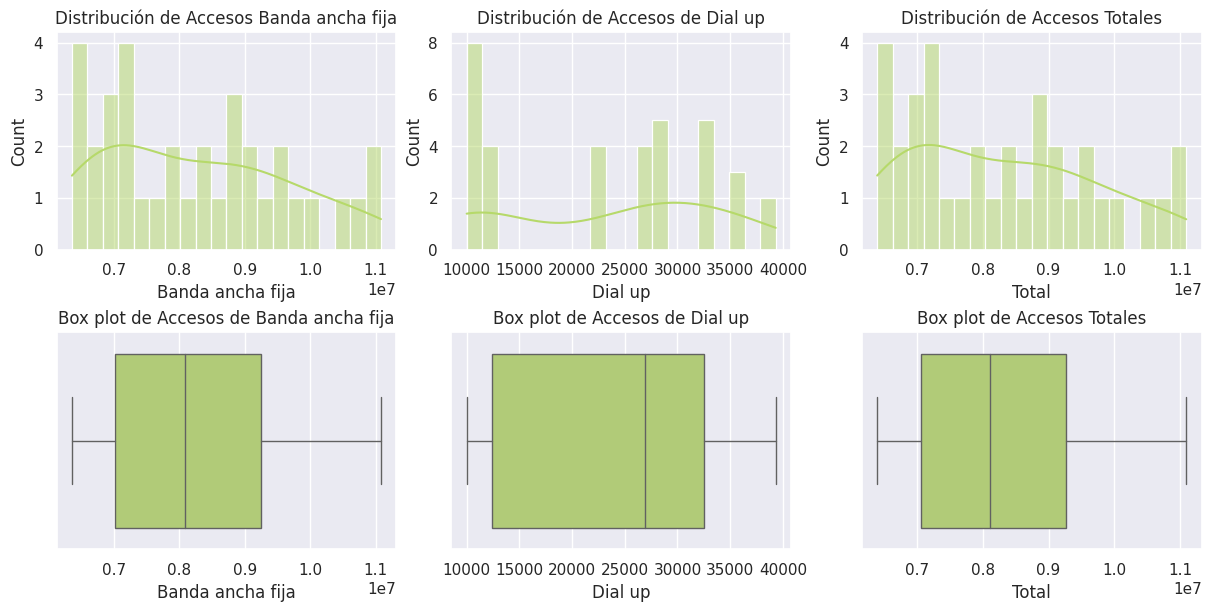

In [138]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'Banda ancha fija'
sns.histplot(data = internet_baf, x = 'Banda ancha fija', kde = True, bins=20, color = '#B6D96A', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos Banda ancha fija')
sns.boxplot(data = internet_baf, x='Banda ancha fija', linewidth = 1, color = '#B6D96A', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos de Banda ancha fija')
# Histograma y boxplot de la columna 'Dial up'
sns.histplot(data = internet_baf, x='Dial up', kde = True, bins=20, color = '#B6D96A', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos de Dial up')
sns.boxplot(data = internet_baf, x='Dial up', linewidth = 1, color = '#B6D96A', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos de Dial up')
# Histograma y boxplot de la columna 'Total'
sns.histplot(data = internet_baf, x = 'Total', kde = True, bins=20, color = '#B6D96A', ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Totales')
sns.boxplot(data = internet_baf, x='Total', linewidth = 1, color = '#B6D96A', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos Totales')

# Mostrar grafico completo
plt.show()

La mayoría de los datos se encuentran dentro del rango intercuartil (25% - 75%), lo que indica que los datos están relativamente concentrados alrededor de la media. Además, los valores mínimos y máximos están dentro de un rango razonable, lo que sugiere que no hay valores atípicos extremos que puedan afectar significativamente el análisis.

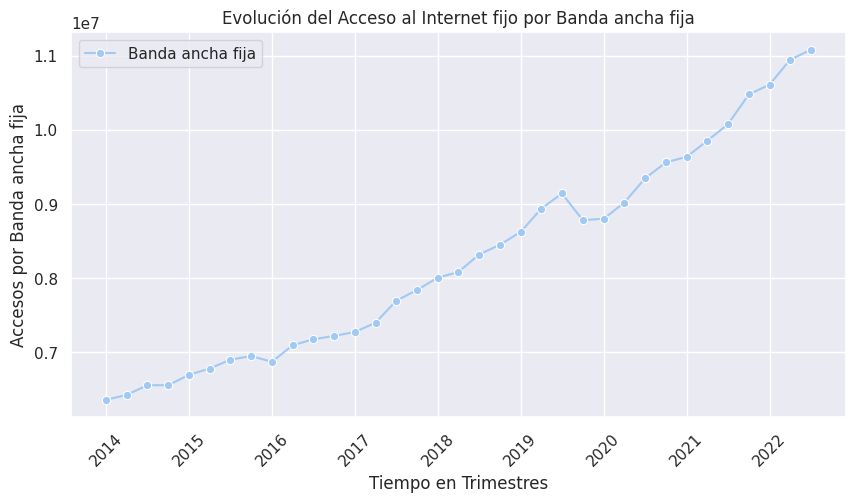

In [139]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
internet_baf['Fecha'] = pd.to_datetime(internet_baf['Año'].astype(str) + 'Q' + internet_baf['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Banda ancha fija
sns.lineplot(x='Fecha', y='Banda ancha fija', data=internet_baf, label='Banda ancha fija', marker='o')
# Rotar los nombres del eje x en 45 grados
plt.xticks(rotation=45)
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Banda ancha fija")
plt.title("Evolución del Acceso al Internet fijo por Banda ancha fija")

# Mostrar la figura
plt.show()

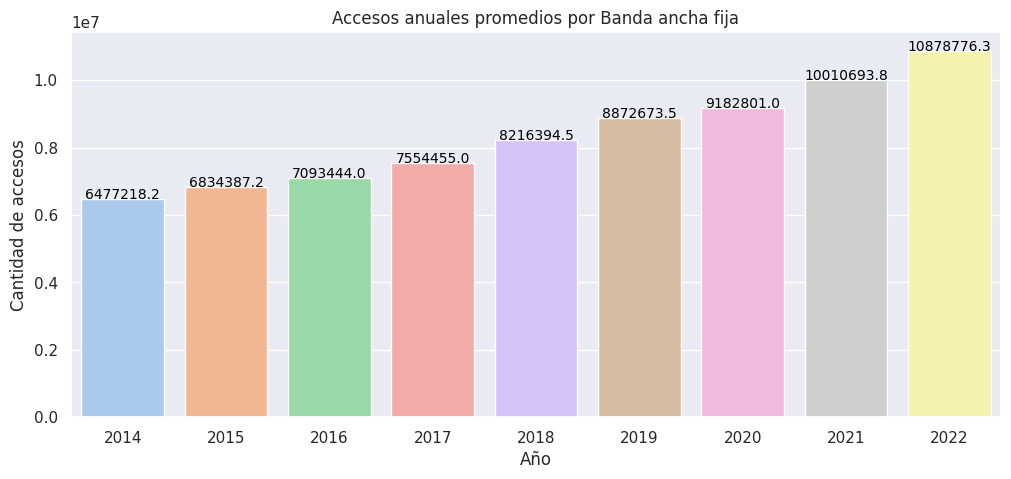

In [146]:
# Tamaño del gráfico
plt.figure(figsize=(12, 5))

# Crear el diagrama de barras de Banda ancha fija
data_hogares = internet_baf.groupby('Año')['Banda ancha fija'].mean().reset_index()
grafico_hogares = sns.barplot(x='Año', y='Banda ancha fija', data=data_hogares)
# Agregar etiquetas de eje y títulos del gráfico
plt.title('Accesos anuales promedios por Banda ancha fija')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')

# Redondear las cifras en cada barra y agregarlas
for index, row in data_hogares.iterrows():
  cifra = round(row['Banda ancha fija'], 1)
  grafico_hogares.text(row.name, row['Banda ancha fija'], str(cifra), color='black', font=dict(size=10), ha="center")

# Mostrar grafico completo
plt.show()

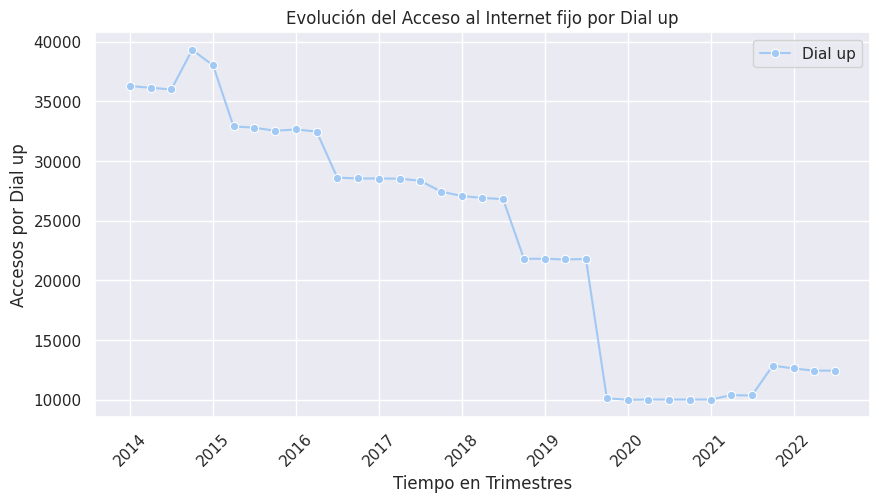

In [142]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
internet_baf['Fecha'] = pd.to_datetime(internet_baf['Año'].astype(str) + 'Q' + internet_baf['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Dial up
sns.lineplot(x = 'Fecha', y = 'Dial up', data = internet_baf, label = 'Dial up', marker = 'o')
# Rotar los nombres del eje x en 45 grados
plt.xticks(rotation=45)
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Dial up")
plt.title("Evolución del Acceso al Internet fijo por Dial up")

# Mostrar la figura
plt.show()

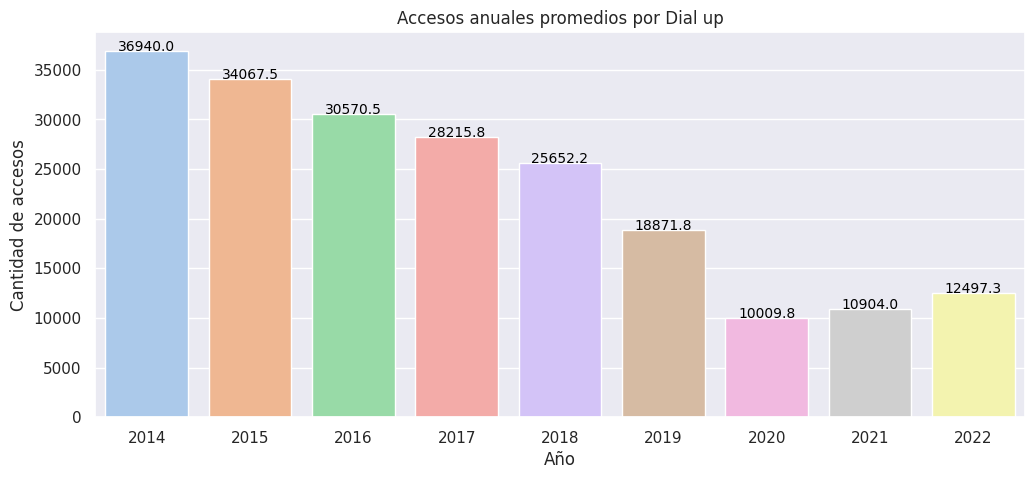

In [143]:
# Tamaño del gráfico
plt.figure(figsize=(12, 5))

# Crear el diagrama de barras de Dial up
data_hogares = internet_baf.groupby('Año')['Dial up'].mean().reset_index()
grafico_hogares = sns.barplot(x='Año', y='Dial up', data=data_hogares)
# Agregar etiquetas de eje y títulos del gráfico
plt.title('Accesos anuales promedios por Dial up')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')

# Redondear las cifras en cada barra y agregarlas
for index, row in data_hogares.iterrows():
  cifra = round(row['Dial up'], 1)
  grafico_hogares.text(row.name, row['Dial up'], str(cifra), color='black', font=dict(size=10), ha="center")

# Mostrar grafico completo
plt.show()

In [144]:
# Agrupar los datos por año y calcular la suma de los accesos a Dial up y Banda ancha fija en cada año
accesos_por_año = internet_baf.groupby('Año').agg({'Banda ancha fija': 'sum', 'Dial up': 'sum'})

# Calcular el porcentaje de cambio entre cada año y el año anterior para los accesos a Dial up y Banda ancha fija
accesos_por_año['Cambio Dial up'] = accesos_por_año['Dial up'].pct_change() * 100
accesos_por_año['Cambio Banda ancha fija'] = accesos_por_año['Banda ancha fija'].pct_change() * 100

# Imprimir los resultados
accesos_por_año

Banda ancha fija  Dial up  Cambio Dial up  Cambio Banda ancha fija
Año                                                                     
2014          25908873   147760             NaN                      NaN
2015          27337549   136270       -7.776123                 5.514234
2016          28373776   122282      -10.264915                 3.790490
2017          30217820   112863       -7.702687                 6.499114
2018          32865578   102609       -9.085351                 8.762240
2019          35490694    75487      -26.432379                 7.987433
2020          36731204    40039      -46.959079                 3.495311
2021          40042775    43616        8.933790                 9.015689
2022          32636329    37492      -14.040719               -18.496335

Podemos observar que el número de accesos de banda ancha fija ha aumentado constantemente a lo largo de los años, con un crecimiento promedio anual del 6,7% entre 2014 y 2021. Por otro lado, el número de accesos de dial-up ha disminuido significativamente a lo largo de los años, con una tasa de disminución promedio anual del 38,4% entre 2014 y 2021.

Es importante destacar que el cambio porcentual en el número de accesos de dial-up es mucho mayor que el cambio porcentual en el número de accesos de banda ancha fija, lo que indica una clara tendencia hacia la adopción de la banda ancha fija como tecnología de conexión a internet.

In [147]:
internet_baf.to_csv('internet_baf.csv', sep = ',', index = False)

### Accesos a banda ancha y banda angosta por provincia
Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral)

In [148]:
# Definir la URL de la API y tu API key
url = "https://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/BANDA-ANCHA-Y-BANDA-ANGOS/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 900})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_baf_provincia = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [149]:
inter_baf_provincia.head()

Año  Trimestre        Provincia Banda ancha fija Dial up      Total
0  2022          3     Buenos Aires        4.715.469   6.199  4.721.668
1  2022          3  Capital Federal        1.545.534   2.145  1.547.679
2  2022          3        Catamarca           70.292       1     70.293
3  2022          3            Chaco          144.141       5    144.146
4  2022          3           Chubut          164.874     904    165.778

In [150]:
inter_baf_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [151]:
# Cantidad de valores faltantes por columna en "inter_baf_provincia"
missing_values_count = inter_baf_provincia.isnull().sum()
columns = inter_baf_provincia.shape[1]
missing_values_count[0:columns]

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

In [152]:
filas_con_faltantes = inter_baf_provincia.isna().sum(axis=1) > 0
inter_baf_provincia[filas_con_faltantes]

Año  Trimestre Provincia Banda ancha fija Dial up    Total
416  2018          2   Formosa           44.554     NaN   44.554
421  2018          2  Misiones          106.147     NaN  106.147

In [153]:
# Filtrar las filas de inter_baf_provincia en las que la columna 'Dial up' tengan '-'
filtro_Dial_up = inter_baf_provincia[inter_baf_provincia['Dial up'].fillna('').str.contains('-', regex=False)]
filtro_Dial_up.head()

Año  Trimestre Provincia Banda ancha fija Dial up    Total
9   2022          3     Jujuy          118.823     - 0  118.823
13  2022          3  Misiones          182.157     - 0  182.157
32  2022          2   Formosa           67.881     - 0   67.881
33  2022          2     Jujuy          115.314     - 0  115.314
37  2022          2  Misiones          178.813     - 0  178.813

In [154]:
# Convertir la columna "Banda ancha fija" a numérica
inter_baf_provincia['Banda ancha fija'] = inter_baf_provincia['Banda ancha fija'].replace('[^0-9]', '', regex=True).astype(int)
# Reemplazar el "-" por un valor vacio y los faltantes por cero
inter_baf_provincia['Dial up'] = inter_baf_provincia['Dial up'].replace('-', '')
inter_baf_provincia['Dial up'] = inter_baf_provincia['Dial up'].fillna(0)
# Convertir la columna "Dial up" a tipo de dato int
inter_baf_provincia['Dial up'] = inter_baf_provincia['Dial up'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Total" a numérica
inter_baf_provincia['Total'] = inter_baf_provincia['Total'].replace('[^0-9]', '', regex=True).astype(int)

In [155]:
inter_baf_provincia[(inter_baf_provincia['Año'] == 2018) & (inter_baf_provincia['Trimestre'] == 2)]['Dial up'].sum()

26911

In [156]:
internet_baf[(internet_baf['Año'] == 2018) & (internet_baf['Trimestre'] == 2)]['Dial up'].sum()

26911

In [157]:
inter_baf_provincia.describe()

Año   Trimestre  Banda ancha fija       Dial up         Total
count   840.000000  840.000000      8.400000e+02    840.000000  8.400000e+02
mean   2017.885714    2.457143      3.447674e+05    974.307143  3.457417e+05
std       2.528745    1.105009      7.400503e+05   2418.317775  7.419436e+05
min    2014.000000    1.000000      1.219300e+04      0.000000  1.255700e+04
25%    2016.000000    1.000000      5.192225e+04      9.000000  5.202975e+04
50%    2018.000000    2.000000      1.029360e+05    148.000000  1.034895e+05
75%    2020.000000    3.000000      1.778685e+05    619.000000  1.779148e+05
max    2022.000000    4.000000      4.715469e+06  15229.000000  4.721668e+06

In [158]:
# Agrupar por provincia y sumar la banda ancha fija
inter_baf_provincia.groupby(['Provincia'])['Banda ancha fija'].sum().sort_values(ascending=False).head()

Provincia
Buenos Aires       123014356
Capital Federal     48866626
Córdoba             26261491
Santa Fe            23944031
Entre Ríos           7249381
Name: Banda ancha fija, dtype: int64

In [159]:
# Agrupar por provincia y sumar la Dial up
inter_baf_provincia.groupby(['Provincia'])['Dial up'].sum().sort_values(ascending=False).head()

Provincia
Buenos Aires       340191
Capital Federal    204979
Neuquén             54398
Chubut              54067
Mendoza             43346
Name: Dial up, dtype: int64

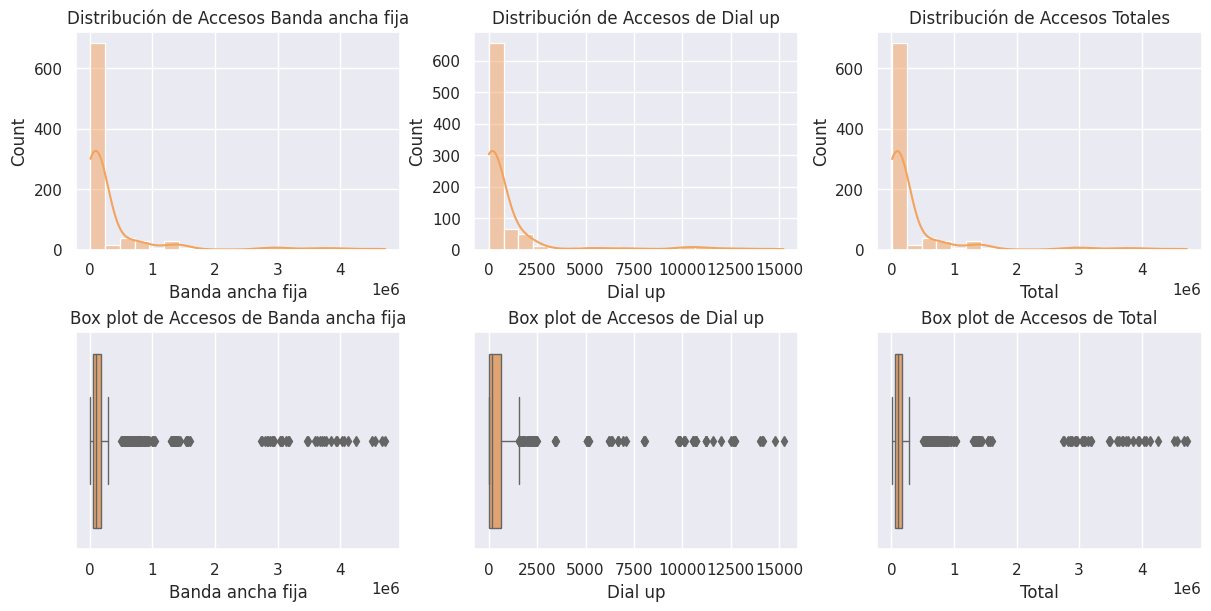

In [160]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'Banda ancha fija'
sns.histplot(data = inter_baf_provincia, x = 'Banda ancha fija', kde = True, bins=20, color = '#F2A35E', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos Banda ancha fija')
sns.boxplot(data = inter_baf_provincia, x='Banda ancha fija', linewidth = 1, color = '#F2A35E', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos de Banda ancha fija')
# Histograma y boxplot de la columna 'Dial up'
sns.histplot(data = inter_baf_provincia, x='Dial up', kde = True, bins=20, color = '#F2A35E', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos de Dial up')
sns.boxplot(data = inter_baf_provincia, x='Dial up', linewidth = 1, color = '#F2A35E', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos de Dial up')
# Histograma y boxplot de la columna 'Total'
sns.histplot(data = inter_baf_provincia, x = 'Total', kde = True, bins=20, color = '#F2A35E', ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Totales')
sns.boxplot(data = inter_baf_provincia, x='Total', linewidth = 1, color = '#F2A35E', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos de Total')

# Mostrar gráfico completo
plt.show()

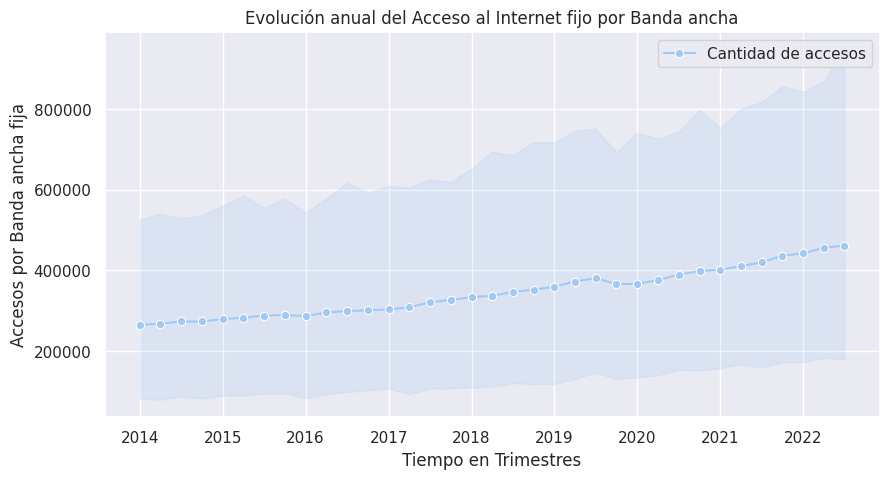

In [161]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_baf_provincia['Fecha'] = pd.to_datetime(inter_baf_provincia['Año'].astype(str) + 'Q' + inter_baf_provincia['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Banda ancha fija
sns.lineplot(x='Fecha', y='Banda ancha fija', data = inter_baf_provincia, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Banda ancha fija")
plt.title("Evolución anual del Acceso al Internet fijo por Banda ancha")
# Mostrar gráfico completo
plt.show()

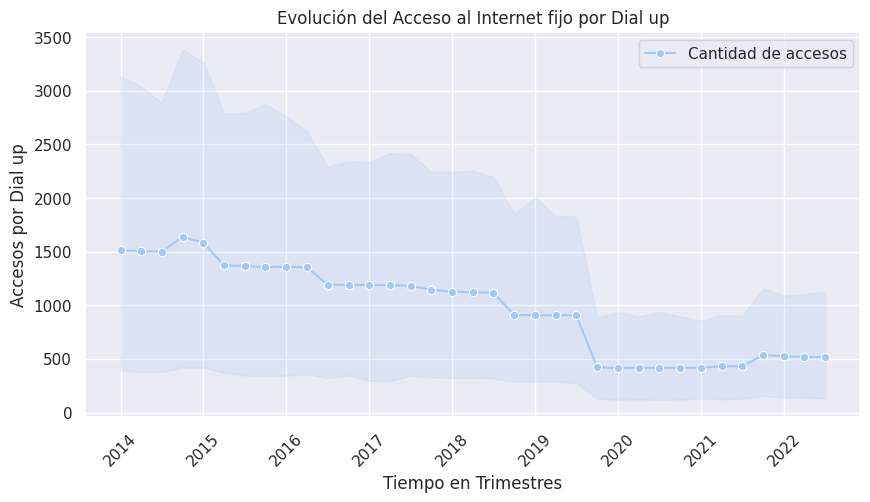

In [162]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_baf_provincia['Fecha'] = pd.to_datetime(inter_baf_provincia['Año'].astype(str) + 'Q' + inter_baf_provincia['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Dial up
sns.lineplot(x='Fecha', y='Dial up', data = inter_baf_provincia, label='Cantidad de accesos', marker='o')
# Rotar los nombres del eje x en 45 grados
plt.xticks(rotation=45)
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Dial up")
plt.title("Evolución del Acceso al Internet fijo por Dial up")
# Mostrar gráfico completo
plt.show()

In [163]:
# Agrupar los datos por año y calcular la suma de los accesos a Dial up y Banda ancha fija en cada año
accesos_por_año = inter_baf_provincia.groupby('Año').agg({'Banda ancha fija': 'sum', 'Dial up': 'sum'})

# Calcular el porcentaje de cambio entre cada año y el año anterior para los accesos a Dial up y Banda ancha fija
accesos_por_año['Cambio Dial up'] = accesos_por_año['Dial up'].pct_change() * 100
accesos_por_año['Cambio Banda ancha fija'] = accesos_por_año['Banda ancha fija'].pct_change() * 100

# Imprimir los resultados
accesos_por_año

Banda ancha fija  Dial up  Cambio Dial up  Cambio Banda ancha fija
Año                                                                     
2014          25908873   147760             NaN                      NaN
2015          27337549   136270       -7.776123                 5.514234
2016          28373776   122282      -10.264915                 3.790490
2017          30217820   112863       -7.702687                 6.499114
2018          32865578   102609       -9.085351                 8.762240
2019          35490694    75487      -26.432379                 7.987433
2020          36731204    40039      -46.959079                 3.495311
2021          40042775    43616        8.933790                 9.015689
2022          32636329    37492      -14.040719               -18.496335

Para interpretar los resultados, podemos observar lo siguiente:

- En general, la cantidad de accesos de Banda ancha fija ha aumentado constantemente cada año, con excepción del año 2022.
Por otro lado, la cantidad de accesos de Dial up ha disminuido constantemente cada año, con excepción del año 2021.
- En términos porcentuales, el cambio anual en la cantidad de accesos de Dial up ha sido mucho más dramático que el cambio en la cantidad de accesos de Banda ancha fija. En particular, la cantidad de accesos de Dial up disminuyó en un 46.96% en 2020 en comparación con 2019, y en un 26.43% en 2019 en comparación con 2018.
- El año 2021 fue un año atípico en términos de cambios anuales: la cantidad de accesos de Dial up aumentó en un 8.93% en comparación con 2020, mientras que la cantidad de accesos de Banda ancha fija aumentó en un 9.02% en comparación con 2020.
- El año 2022 muestra una disminución significativa en la cantidad de accesos tanto de Banda ancha fija (-18.50%) como de Dial up (-14.04%) en comparación con 2021.
- En general, estos resultados sugieren una tendencia hacia la adopción de Banda ancha fija y una disminución en el uso de Dial up. Además, los cambios anuales en la cantidad de accesos muestran que tanto Banda ancha fija como Dial up son sensibles a factores externos como la pandemia, la economía y los avances tecnológicos.

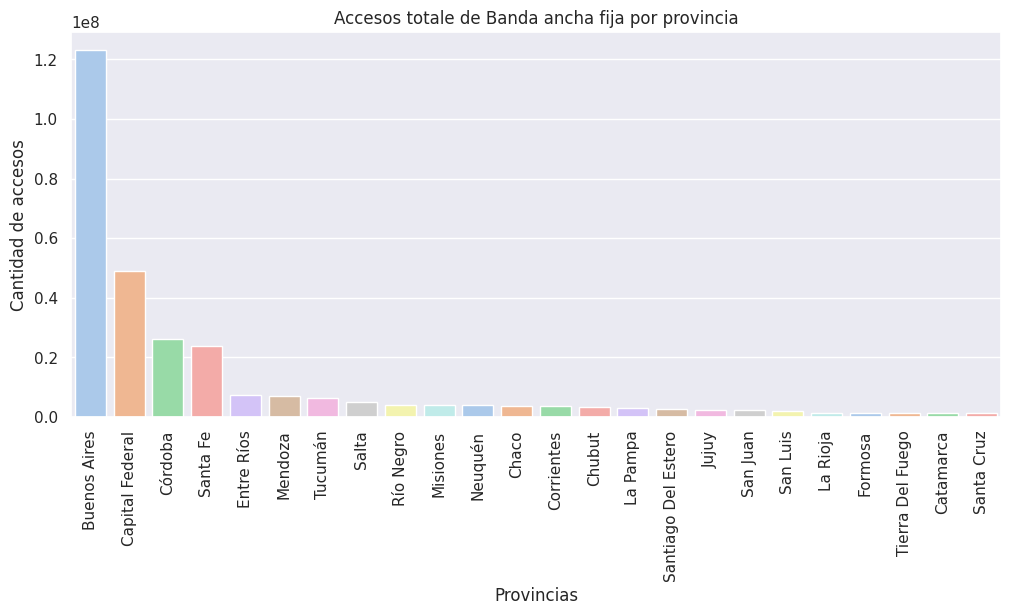

In [167]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(12, 5))

# Gráfico de barras de la columna "Provincia" vs "Accesos por Banda ancha fija"
df_provincias = inter_baf_provincia.groupby('Provincia')['Banda ancha fija'].sum().reset_index()
df_provincias = df_provincias.sort_values('Banda ancha fija', ascending = False)
sns.barplot(data = df_provincias, x = 'Provincia', y = 'Banda ancha fija', palette = 'pastel')

# Agregar etiquetas de ejes y título del gráfico
plt.title('Accesos totale de Banda ancha fija por provincia')
plt.xlabel('Provincias')
plt.ylabel('Cantidad de accesos')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

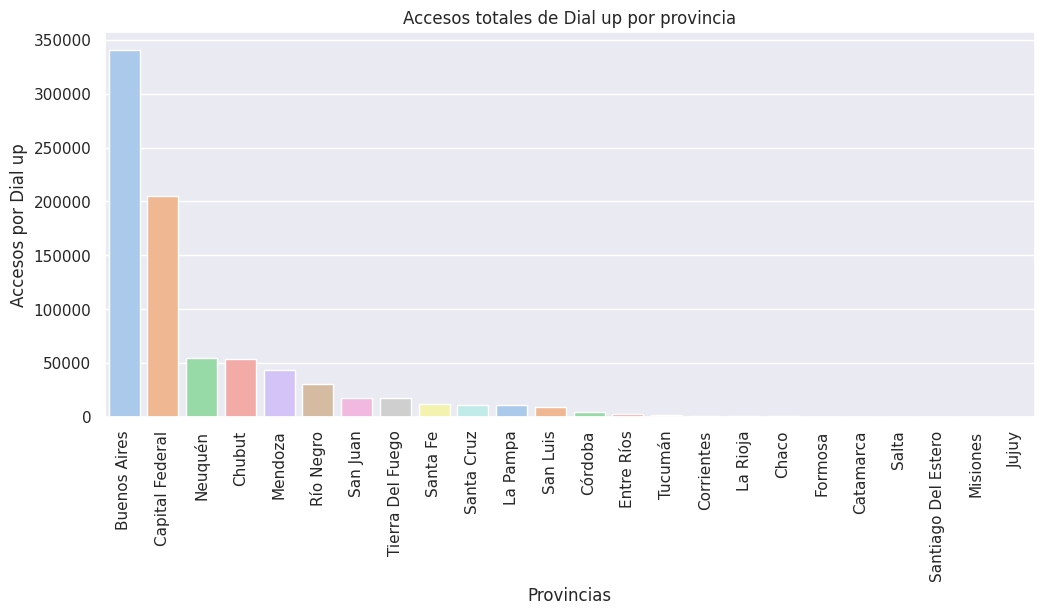

In [168]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(12, 5))

# Gráfico de barras de la columna "Provincia" vs "Accesos por Dial up"
df_provincias = inter_baf_provincia.groupby('Provincia')['Dial up'].sum().reset_index()
df_provincias = df_provincias.sort_values('Dial up', ascending = False)
sns.barplot(data = df_provincias, x = 'Provincia', y = 'Dial up', palette = 'pastel')

# Agregar etiquetas de ejes y título del gráfico
plt.title('Accesos totales de Dial up por provincia')
plt.xlabel('Provincias')
plt.ylabel('Accesos por Dial up')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

In [169]:
# Filtrar los datos para el tercer trimestre de 2022
datos_3t_2022 = inter_baf_provincia[(inter_baf_provincia['Año'] == 2022) & (inter_baf_provincia['Trimestre'] == 3)]

# Agrupar los datos por provincia y calcular la suma de accesos a Dial up y Banda ancha fija en cada provincia
accesos_por_provincia = datos_3t_2022.groupby('Provincia').agg({'Banda ancha fija': 'sum', 'Dial up': 'sum'})

# Filtrar las provincias donde la cantidad de accesos a Dial up es mayor que la cantidad de accesos a Banda ancha fija
provincias_con_mas_dialup = accesos_por_provincia[accesos_por_provincia['Dial up'] > accesos_por_provincia['Banda ancha fija']]

# Verificar si hay al menos una provincia que cumpla con esta condición
if len(provincias_con_mas_dialup) > 0:
    print('Sí, hay una o más provincias donde la cantidad de accesos a Dial up es mayor que la cantidad de accesos a Banda ancha fija.')
    print(provincias_con_mas_dialup)
else:
    print('No hay ninguna provincia donde la cantidad de accesos a Dial up sea mayor que la cantidad de accesos a Banda ancha fija.')

No hay ninguna provincia donde la cantidad de accesos a Dial up sea mayor que la cantidad de accesos a Banda ancha fija.


In [170]:
# Dividir el DataFrame por regiones
patagonia = inter_baf_provincia[inter_baf_provincia['Provincia'].isin(['Tierra Del Fuego', 'Santa Cruz', 'Chubut',
                                                                                             'Neuquén', 'Río Negro'])]
cuyo = inter_baf_provincia[inter_baf_provincia['Provincia'].isin(['Mendoza', 'San Luis', 'San Juan'])]
pampeana = inter_baf_provincia[inter_baf_provincia['Provincia'].isin(['Buenos Aires', 'Capital Federal' ,'Santa Fe', 'Córdoba',
                                                                                            'La Pampa'])]
noroeste = inter_baf_provincia[inter_baf_provincia['Provincia'].isin(['La Rioja', 'Catamarca', 'Tucumán',
                                                                                            'Santiago Del Estero', 'Salta', 'Jujuy'])]
noreste = inter_baf_provincia[inter_baf_provincia['Provincia'].isin(['Chaco', 'Formosa', 'Corrientes', 'Entre Ríos',
                                                                                           'Misiones'])]

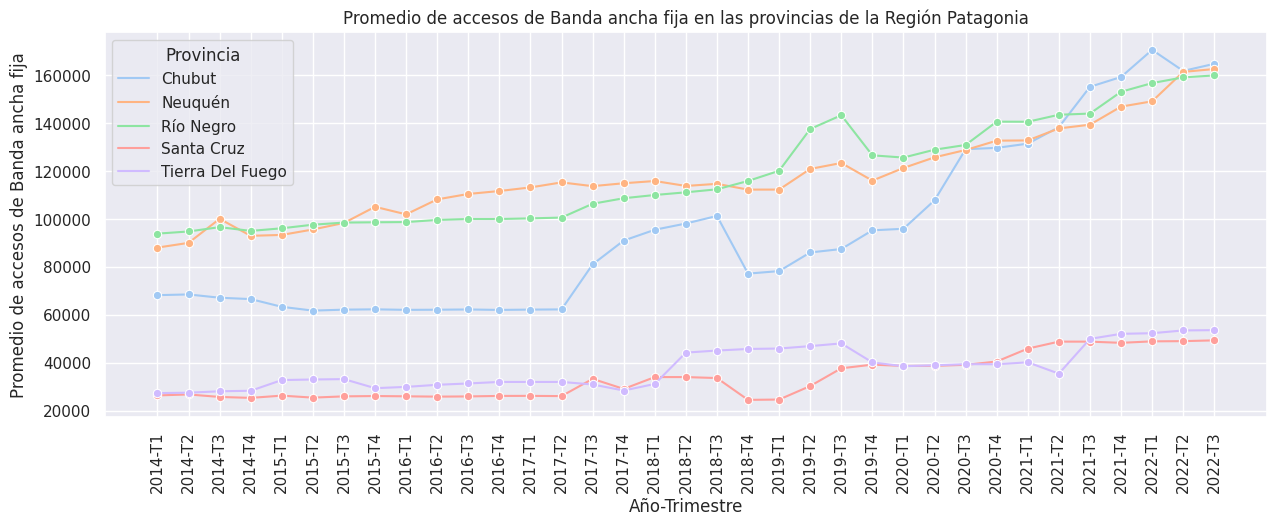

In [171]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Banda ancha fija"
df_promedio = patagonia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Banda ancha fija'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Banda ancha fija', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos de Banda ancha fija en las provincias de la Región Patagonia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos de Banda ancha fija')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

In [172]:
# Filtrar los datos para obtener solo los accesos a banda ancha fija de los años 2014 y 2022
datos_2014 = patagonia[(patagonia['Año'] == 2014) & (patagonia['Banda ancha fija'].notnull())]
datos_2022 = patagonia[(patagonia['Año'] == 2022) & (patagonia['Banda ancha fija'].notnull())]
# Filtrar los datos para obtener solo los accesos a Dial up de los años 2014 y 2022
datos_2014_dialup = patagonia[(patagonia['Año'] == 2014) & (patagonia['Dial up'].notnull())]
datos_2022_dialup = patagonia[(patagonia['Año'] == 2022) & (patagonia['Dial up'].notnull())]

# Agrupar los datos por provincia y calcular la suma de los accesos a banda ancha fija en cada año
accesos_2014_banda_ancha = datos_2014.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
accesos_2022_banda_ancha = datos_2022.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
# Agrupar los datos por provincia y calcular la suma de los accesos a Dial up en cada año
accesos_2014_dialup = datos_2014_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})
accesos_2022_dialup = datos_2022_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})

# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_banda_ancha = ((accesos_2022_banda_ancha - accesos_2014_banda_ancha) / accesos_2014_banda_ancha) * 100
cambio_banda_ancha.rename(columns={'Banda ancha fija': 'Cambio porcentual Banda ancha fija'}, inplace=True)
# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_dialup = ((accesos_2022_dialup - accesos_2014_dialup) / accesos_2014_dialup) * 100
cambio_dialup.rename(columns={'Dial up': 'Cambio porcentual Dial up'}, inplace=True)

# Combinar los resultados de los cambios porcentuales de Dial up y Banda ancha fija por provincia
cambio_patagonia = cambio_banda_ancha.join(cambio_dialup, how='outer')
# Imprimir los resultados
cambio_patagonia

Cambio porcentual Banda ancha fija  \
Provincia                                              
Chubut                                     83.981213   
Neuquén                                    27.522978   
Río Negro                                  25.143796   
Santa Cruz                                 41.596845   
Tierra Del Fuego                           43.548256   

                  Cambio porcentual Dial up  
Provincia                                    
Chubut                           -65.914756  
Neuquén                          -84.711507  
Río Negro                        -64.636500  
Santa Cruz                       -66.685175  
Tierra Del Fuego                 -69.055482

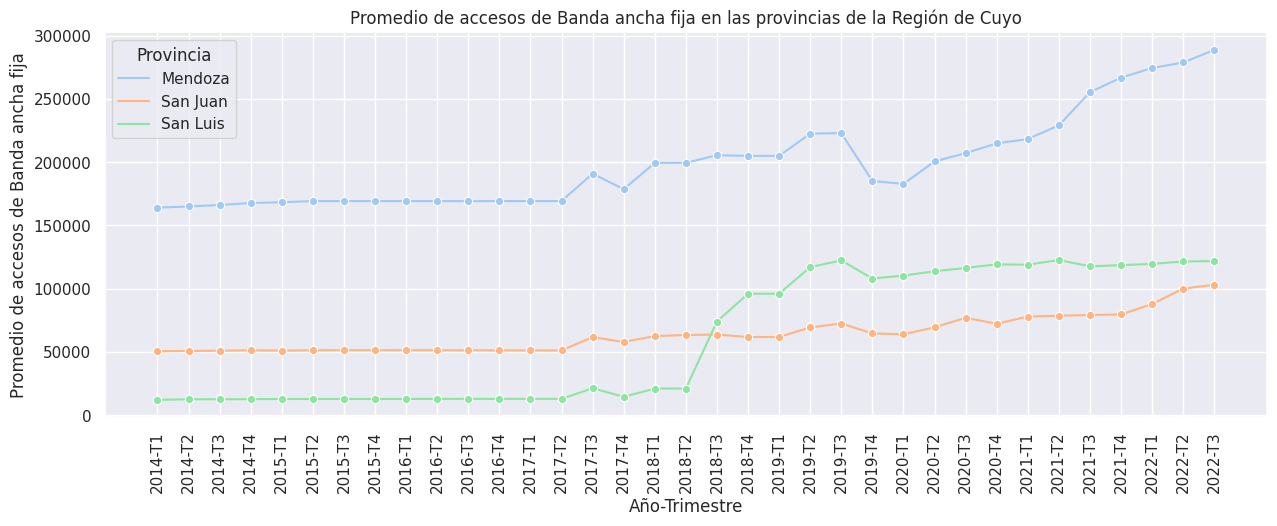

In [173]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Banda ancha fija"
df_promedio = cuyo.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Banda ancha fija'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Banda ancha fija', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos de Banda ancha fija en las provincias de la Región de Cuyo')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos de Banda ancha fija')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

In [174]:
# Filtrar los datos para obtener solo los accesos a banda ancha fija de los años 2014 y 2022
datos_2014 = cuyo[(cuyo['Año'] == 2014) & (cuyo['Banda ancha fija'].notnull())]
datos_2022 = cuyo[(cuyo['Año'] == 2022) & (cuyo['Banda ancha fija'].notnull())]
# Filtrar los datos para obtener solo los accesos a Dial up de los años 2014 y 2022
datos_2014_dialup = cuyo[(cuyo['Año'] == 2014) & (cuyo['Dial up'].notnull())]
datos_2022_dialup = cuyo[(cuyo['Año'] == 2022) & (cuyo['Dial up'].notnull())]

# Agrupar los datos por provincia y calcular la suma de los accesos a banda ancha fija en cada año
accesos_2014_banda_ancha = datos_2014.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
accesos_2022_banda_ancha = datos_2022.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
# Agrupar los datos por provincia y calcular la suma de los accesos a Dial up en cada año
accesos_2014_dialup = datos_2014_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})
accesos_2022_dialup = datos_2022_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})

# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_banda_ancha = ((accesos_2022_banda_ancha - accesos_2014_banda_ancha) / accesos_2014_banda_ancha) * 100
cambio_banda_ancha.rename(columns={'Banda ancha fija': 'Cambio porcentual Banda ancha fija'}, inplace=True)
# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_dialup = ((accesos_2022_dialup - accesos_2014_dialup) / accesos_2014_dialup) * 100
cambio_dialup.rename(columns={'Dial up': 'Cambio porcentual Dial up'}, inplace=True)

# Combinar los resultados de los cambios porcentuales de Dial up y Banda ancha fija por provincia
cambio_cuyo = cambio_banda_ancha.join(cambio_dialup, how='outer')
# Imprimir los resultados
cambio_cuyo

Cambio porcentual Banda ancha fija  Cambio porcentual Dial up
Provincia                                                               
Mendoza                             26.972613                 -67.088608
San Juan                            42.813274                 -71.476398
San Luis                           621.092245                 -62.137931

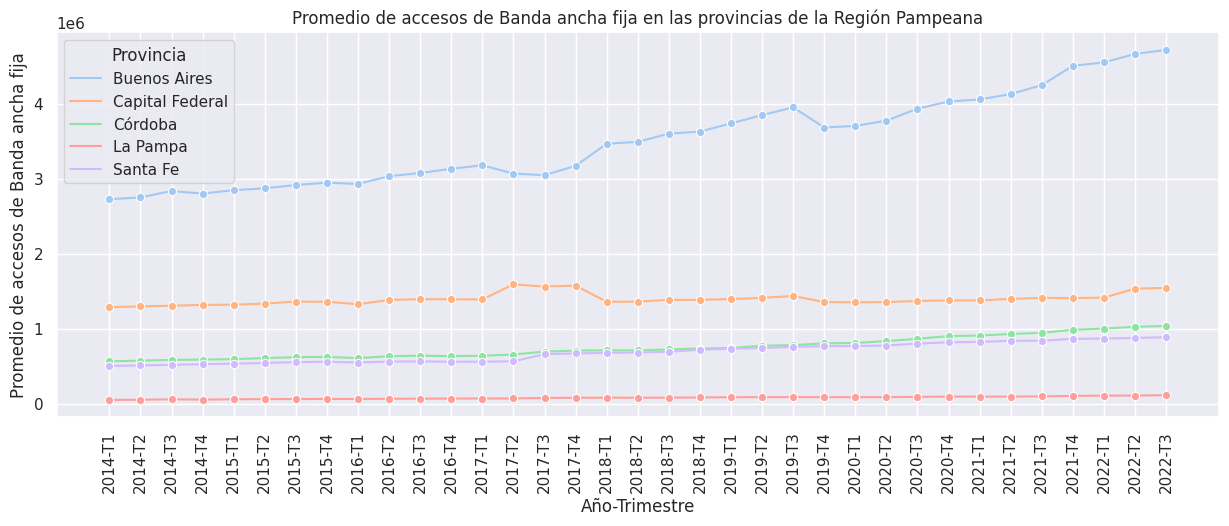

In [175]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Banda ancha fija"
df_promedio = pampeana.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Banda ancha fija'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Banda ancha fija', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos de Banda ancha fija en las provincias de la Región Pampeana')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos de Banda ancha fija')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

In [176]:
# Filtrar los datos para obtener solo los accesos a banda ancha fija de los años 2014 y 2022
datos_2014 = pampeana[(pampeana['Año'] == 2014) & (pampeana['Banda ancha fija'].notnull())]
datos_2022 = pampeana[(pampeana['Año'] == 2022) & (pampeana['Banda ancha fija'].notnull())]
# Filtrar los datos para obtener solo los accesos a Dial up de los años 2014 y 2022
datos_2014_dialup = pampeana[(pampeana['Año'] == 2014) & (pampeana['Dial up'].notnull())]
datos_2022_dialup = pampeana[(pampeana['Año'] == 2022) & (pampeana['Dial up'].notnull())]

# Agrupar los datos por provincia y calcular la suma de los accesos a banda ancha fija en cada año
accesos_2014_banda_ancha = datos_2014.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
accesos_2022_banda_ancha = datos_2022.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
# Agrupar los datos por provincia y calcular la suma de los accesos a Dial up en cada año
accesos_2014_dialup = datos_2014_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})
accesos_2022_dialup = datos_2022_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})

# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_banda_ancha = ((accesos_2022_banda_ancha - accesos_2014_banda_ancha) / accesos_2014_banda_ancha) * 100
cambio_banda_ancha.rename(columns={'Banda ancha fija': 'Cambio porcentual Banda ancha fija'}, inplace=True)
# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_dialup = ((accesos_2022_dialup - accesos_2014_dialup) / accesos_2014_dialup) * 100
cambio_dialup.rename(columns={'Dial up': 'Cambio porcentual Dial up'}, inplace=True)

# Combinar los resultados de los cambios porcentuales de Dial up y Banda ancha fija por provincia
cambio_pampeana = cambio_banda_ancha.join(cambio_dialup, how='outer')
# Imprimir los resultados
cambio_pampeana

Cambio porcentual Banda ancha fija  Cambio porcentual Dial up
Provincia                                                                     
Buenos Aires                              25.310340                 -67.503521
Capital Federal                          -13.786539                 -85.351070
Córdoba                                   32.340059                 -77.395048
La Pampa                                  48.175504                 -77.681285
Santa Fe                                  27.603697                 -88.229093

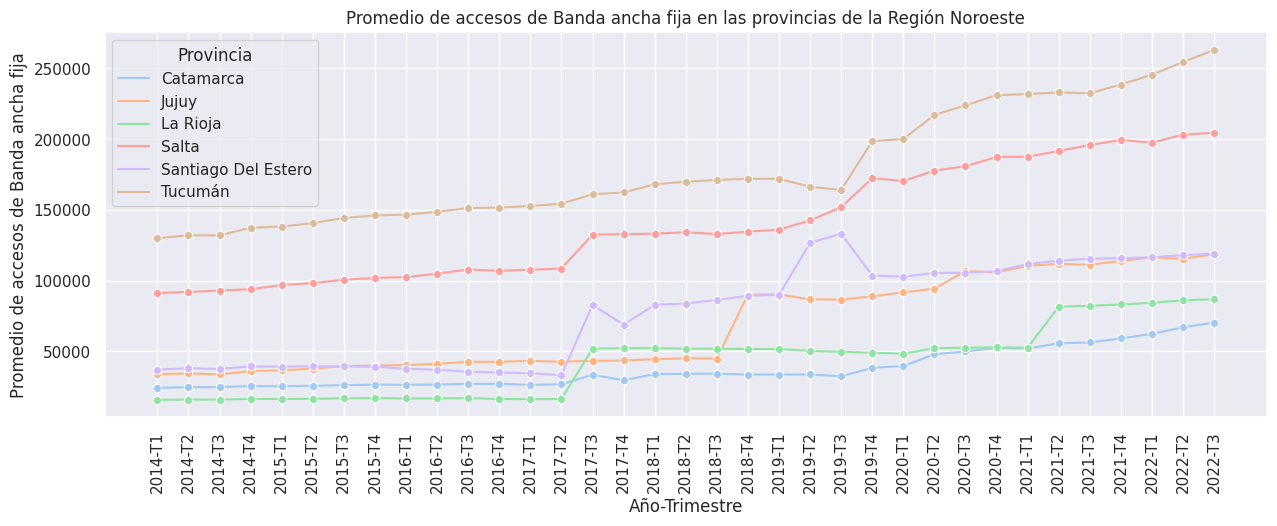

In [177]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Banda ancha fija"
df_promedio = noroeste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Banda ancha fija'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Banda ancha fija', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos de Banda ancha fija en las provincias de la Región Noroeste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos de Banda ancha fija')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

In [178]:
# Filtrar los datos para obtener solo los accesos a banda ancha fija de los años 2014 y 2022
datos_2014 = noroeste[(noroeste['Año'] == 2014) & (noroeste['Banda ancha fija'].notnull())]
datos_2022 = noroeste[(noroeste['Año'] == 2022) & (noroeste['Banda ancha fija'].notnull())]
# Filtrar los datos para obtener solo los accesos a Dial up de los años 2014 y 2022
datos_2014_dialup = noroeste[(noroeste['Año'] == 2014) & (noroeste['Dial up'].notnull())]
datos_2022_dialup = noroeste[(noroeste['Año'] == 2022) & (noroeste['Dial up'].notnull())]

# Agrupar los datos por provincia y calcular la suma de los accesos a banda ancha fija en cada año
accesos_2014_banda_ancha = datos_2014.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
accesos_2022_banda_ancha = datos_2022.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
# Agrupar los datos por provincia y calcular la suma de los accesos a Dial up en cada año
accesos_2014_dialup = datos_2014_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})
accesos_2022_dialup = datos_2022_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})

# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_banda_ancha = ((accesos_2022_banda_ancha - accesos_2014_banda_ancha) / accesos_2014_banda_ancha) * 100
cambio_banda_ancha.rename(columns={'Banda ancha fija': 'Cambio porcentual Banda ancha fija'}, inplace=True)
# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_dialup = ((accesos_2022_dialup - accesos_2014_dialup) / accesos_2014_dialup) * 100
cambio_dialup.rename(columns={'Dial up': 'Cambio porcentual Dial up'}, inplace=True)

# Combinar los resultados de los cambios porcentuales de Dial up y Banda ancha fija por provincia
cambio_noroeste = cambio_banda_ancha.join(cambio_dialup, how='outer')
# Imprimir los resultados
cambio_noroeste

Cambio porcentual Banda ancha fija  \
Provincia                                                 
Catamarca                                    101.680706   
Jujuy                                        154.235002   
La Rioja                                     302.801923   
Salta                                         63.544144   
Santiago Del Estero                          132.627506   
Tucumán                                       43.654373   

                     Cambio porcentual Dial up  
Provincia                                       
Catamarca                           -96.590909  
Jujuy                              -100.000000  
La Rioja                            -86.956522  
Salta                               -85.148515  
Santiago Del Estero                 -83.333333  
Tucumán                             -74.930362

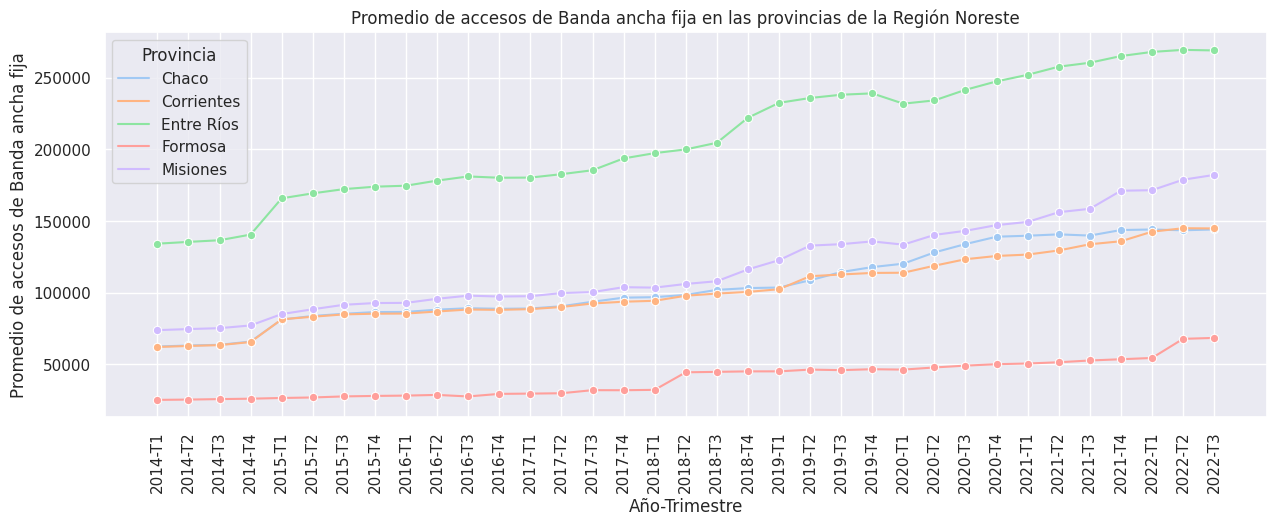

In [179]:
# Agrupar los datos por provincia y trimestre y calcular la media de "Banda ancha fija"
df_promedio = noreste.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Banda ancha fija'].mean()

# Crear una nueva columna con el formato "Año-Trimestre"
df_promedio['Año-Trimestre'] = df_promedio['Año'].astype(str) + '-T' + df_promedio['Trimestre'].astype(str)

# Crear un gráfico de línea con la variable "hue" y "style" asignadas correctamente
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_promedio, x='Año-Trimestre', y='Banda ancha fija', hue='Provincia', style='Provincia', dashes=False,
             palette='pastel', marker = 'o')
# Agregar etiquetas de ejes y título del gráfico
plt.title('Promedio de accesos de Banda ancha fija en las provincias de la Región Noreste')
plt.xlabel('Año-Trimestre')
plt.ylabel('Promedio de accesos de Banda ancha fija')
plt.xticks(rotation = 90) # Rotar los nombres en el eje x
# Mostrar gráfico completo
plt.show()

In [180]:
# Filtrar los datos para obtener solo los accesos a banda ancha fija de los años 2014 y 2022
datos_2014 = noreste[(noreste['Año'] == 2014) & (noreste['Banda ancha fija'].notnull())]
datos_2022 = noreste[(noreste['Año'] == 2022) & (noreste['Banda ancha fija'].notnull())]
# Filtrar los datos para obtener solo los accesos a Dial up de los años 2014 y 2022
datos_2014_dialup = noreste[(noreste['Año'] == 2014) & (noreste['Dial up'].notnull())]
datos_2022_dialup = noreste[(noreste['Año'] == 2022) & (noreste['Dial up'].notnull())]

# Agrupar los datos por provincia y calcular la suma de los accesos a banda ancha fija en cada año
accesos_2014_banda_ancha = datos_2014.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
accesos_2022_banda_ancha = datos_2022.groupby(['Provincia']).agg({'Banda ancha fija': 'sum'})
# Agrupar los datos por provincia y calcular la suma de los accesos a Dial up en cada año
accesos_2014_dialup = datos_2014_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})
accesos_2022_dialup = datos_2022_dialup.groupby(['Provincia']).agg({'Dial up': 'sum'})

# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_banda_ancha = ((accesos_2022_banda_ancha - accesos_2014_banda_ancha) / accesos_2014_banda_ancha) * 100
cambio_banda_ancha.rename(columns={'Banda ancha fija': 'Cambio porcentual Banda ancha fija'}, inplace=True)
# Calcular el porcentaje de cambio entre los accesos de 2014 y 2022 para cada provincia
cambio_dialup = ((accesos_2022_dialup - accesos_2014_dialup) / accesos_2014_dialup) * 100
cambio_dialup.rename(columns={'Dial up': 'Cambio porcentual Dial up'}, inplace=True)

# Combinar los resultados de los cambios porcentuales de Dial up y Banda ancha fija por provincia
cambio_noreste = cambio_banda_ancha.join(cambio_dialup, how='outer')
# Imprimir los resultados
cambio_noreste

Cambio porcentual Banda ancha fija  Cambio porcentual Dial up
Provincia                                                                
Chaco                                69.026621                 -89.655172
Corrientes                           70.038930                 -92.156863
Entre Ríos                           47.415743                 -88.832487
Formosa                              85.585866                 -99.625468
Misiones                             76.792568                -100.000000

In [182]:
# Agrupar los datos por provincia y año y calcular la media del acceso por banda ancha fija
df_resumen = inter_baf_provincia.groupby(['Provincia', 'Año'])['Banda ancha fija'].mean().reset_index()

# Generar el gráfico de barras agrupadas
fig = go.Figure(data=[
    go.Bar(name='2014', x=df_resumen[df_resumen['Año'] == 2014]['Provincia'], y=df_resumen[df_resumen['Año'] == 2014]['Banda ancha fija']),
    go.Bar(name='2015', x=df_resumen[df_resumen['Año'] == 2015]['Provincia'], y=df_resumen[df_resumen['Año'] == 2015]['Banda ancha fija']),
    go.Bar(name='2016', x=df_resumen[df_resumen['Año'] == 2016]['Provincia'], y=df_resumen[df_resumen['Año'] == 2016]['Banda ancha fija']),
    go.Bar(name='2017', x=df_resumen[df_resumen['Año'] == 2017]['Provincia'], y=df_resumen[df_resumen['Año'] == 2017]['Banda ancha fija']),
    go.Bar(name='2018', x=df_resumen[df_resumen['Año'] == 2018]['Provincia'], y=df_resumen[df_resumen['Año'] == 2018]['Banda ancha fija']),
    go.Bar(name='2019', x=df_resumen[df_resumen['Año'] == 2019]['Provincia'], y=df_resumen[df_resumen['Año'] == 2019]['Banda ancha fija']),
    go.Bar(name='2020', x=df_resumen[df_resumen['Año'] == 2020]['Provincia'], y=df_resumen[df_resumen['Año'] == 2020]['Banda ancha fija']),
    go.Bar(name='2021', x=df_resumen[df_resumen['Año'] == 2021]['Provincia'], y=df_resumen[df_resumen['Año'] == 2021]['Banda ancha fija']),
    go.Bar(name='2022', x=df_resumen[df_resumen['Año'] == 2022]['Provincia'], y=df_resumen[df_resumen['Año'] == 2022]['Banda ancha fija'])
])

# Actualizar las opciones del diseño del gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-90,
                  title = dict(text='Acceso anual del Internet fijo por Banda ancha fija',
                             x=0.5, y=0.95, xanchor='center', yanchor='top'),
                  width=1000, height=500)

# Mostrar el gráfico
fig.show()

In [183]:
# Agrupar los datos por provincia y año y calcular la media del acceso por Dial up
df_resumen = inter_baf_provincia.groupby(['Provincia', 'Año'])['Dial up'].mean().reset_index()

# Generar el gráfico de barras agrupadas
fig = go.Figure(data=[
    go.Bar(name='2014', x=df_resumen[df_resumen['Año'] == 2014]['Provincia'], y=df_resumen[df_resumen['Año'] == 2014]['Dial up']),
    go.Bar(name='2015', x=df_resumen[df_resumen['Año'] == 2015]['Provincia'], y=df_resumen[df_resumen['Año'] == 2015]['Dial up']),
    go.Bar(name='2016', x=df_resumen[df_resumen['Año'] == 2016]['Provincia'], y=df_resumen[df_resumen['Año'] == 2016]['Dial up']),
    go.Bar(name='2017', x=df_resumen[df_resumen['Año'] == 2017]['Provincia'], y=df_resumen[df_resumen['Año'] == 2017]['Dial up']),
    go.Bar(name='2018', x=df_resumen[df_resumen['Año'] == 2018]['Provincia'], y=df_resumen[df_resumen['Año'] == 2018]['Dial up']),
    go.Bar(name='2019', x=df_resumen[df_resumen['Año'] == 2019]['Provincia'], y=df_resumen[df_resumen['Año'] == 2019]['Dial up']),
    go.Bar(name='2020', x=df_resumen[df_resumen['Año'] == 2020]['Provincia'], y=df_resumen[df_resumen['Año'] == 2020]['Dial up']),
    go.Bar(name='2021', x=df_resumen[df_resumen['Año'] == 2021]['Provincia'], y=df_resumen[df_resumen['Año'] == 2021]['Dial up']),
    go.Bar(name='2022', x=df_resumen[df_resumen['Año'] == 2022]['Provincia'], y=df_resumen[df_resumen['Año'] == 2022]['Dial up'])
])

# Actualizar las opciones del diseño del gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-90,
                  title = dict(text='Acceso anual del Internet fijo por Dial up',
                             x=0.5, y=0.95, xanchor='center', yanchor='top'),
                  width=1000, height=500)

# Mostrar el gráfico
fig.show()

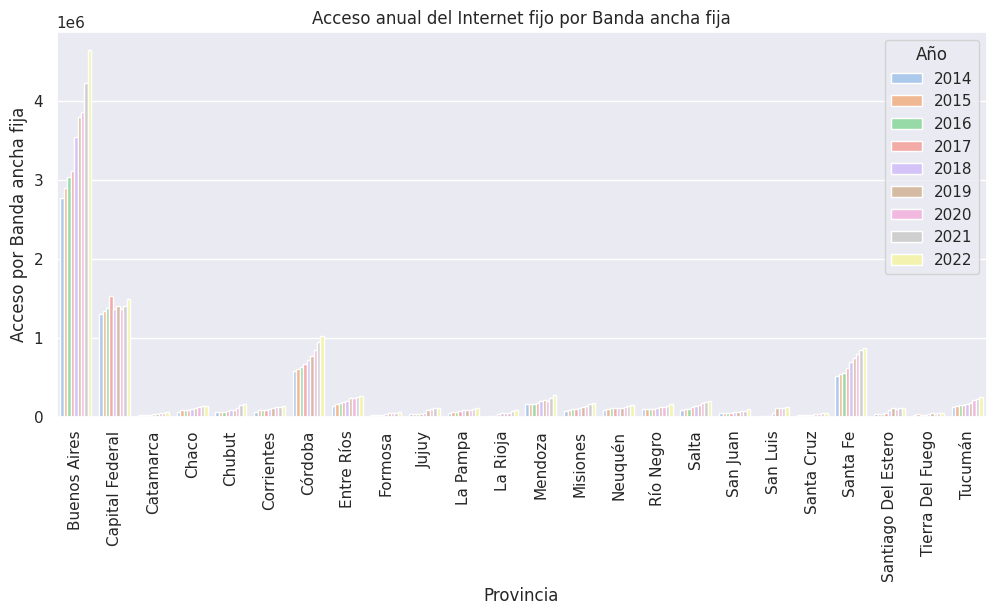

In [185]:
# Agrupar los datos por provincia y año y calcular la media del acceso por banda ancha fija
df_resumen = inter_baf_provincia.groupby(['Provincia', 'Año'])['Banda ancha fija'].mean().reset_index()

# Generar el gráfico de barras agrupadas con Seaborn
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Provincia', y='Banda ancha fija', hue='Año', data=df_resumen, ax=ax)

# Actualizar las opciones del diseño del gráfico
ax.set_title('Acceso anual del Internet fijo por Banda ancha fija')
ax.set_xlabel('Provincia')
ax.set_ylabel('Acceso por Banda ancha fija')
ax.tick_params(axis='x', rotation=90)

# Mostrar el gráfico
plt.show()

In [184]:
inter_baf_provincia.to_csv('inter_baf_provincia.csv', sep = ',', index = False)

## Acceso a Internet fijo por tecnología y provincia

### Total nacional de accesos a Internet fijo por tipo de tecnología

Número total de accesos al servicio de Internet fijo por tipo de tecnología (trimestral)

Datos de la Visualización: Serie trimestral de accesos a Internet fijo por tecnología

In [2]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/TOTAL-NACIO-DE-ACCES-A/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_acceso_tecnol_nac = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [3]:
inter_acceso_tecnol_nac.head()

Año  Trimestre       ADSL Cablemodem Fibra óptica  Wireless    Otros  \
0  2022          3  1.395.277  6.031.970    2.871.541   557.110  235.230   
1  2022          2  1.468.333  5.979.214    2.723.285   556.243  231.609   
2  2022          1  1.533.240  6.073.426    2.219.533   545.814  251.996   
3  2021          4  1.657.615  5.984.240    2.072.236   523.107  252.596   
4  2021          3  1.950.631  5.826.257    1.566.048   492.415  250.190   

        Total        Periodo  
0  11.091.128  Jul-Sept 2022  
1  10.958.684   Abr-Jun 2022  
2  10.624.009   Ene-Mar 2022  
3  10.489.794   Oct-Dic 2021  
4  10.085.541  Jul-Sept 2021

In [4]:
inter_acceso_tecnol_nac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [5]:
# Convertir la columna "ADSL" a numérica
inter_acceso_tecnol_nac['ADSL'] = inter_acceso_tecnol_nac['ADSL'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Cablemodem" a numérica
inter_acceso_tecnol_nac['Cablemodem'] = inter_acceso_tecnol_nac['Cablemodem'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Fibra óptica" a numérica
inter_acceso_tecnol_nac['Fibra óptica'] = inter_acceso_tecnol_nac['Fibra óptica'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Wireless" a tipo de dato int
inter_acceso_tecnol_nac['Wireless'] = (inter_acceso_tecnol_nac['Wireless'] * 1000).astype(int)
# Convertir la columna "Otros" a tipo de dato int
inter_acceso_tecnol_nac['Otros'] = (inter_acceso_tecnol_nac['Otros'] * 1000).astype(int)
# Convertir la columna "Total" a numérica
inter_acceso_tecnol_nac['Total'] = inter_acceso_tecnol_nac['Total'].replace('[^0-9]', '', regex=True).astype(int)

In [6]:
inter_acceso_tecnol_nac.head(1)

Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2022          3  1395277     6031970       2871541    557110  235230   

      Total        Periodo  
0  11091128  Jul-Sept 2022

In [7]:
inter_acceso_tecnol_nac.describe()

Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    35.000000  35.000000  3.500000e+01  3.500000e+01  3.500000e+01   
mean   2017.885714   2.457143  3.040425e+06  4.122601e+06  7.390627e+05   
std       2.564135   1.120474  8.354122e+05  1.225277e+06  7.861772e+05   
min    2014.000000   1.000000  1.395277e+06  2.407330e+06  1.391870e+05   
25%    2016.000000   1.500000  2.279711e+06  2.966749e+06  1.679880e+05   
50%    2018.000000   2.000000  3.557216e+06  4.038141e+06  2.262850e+05   
75%    2020.000000   3.000000  3.723156e+06  5.132233e+06  1.138802e+06   
max    2022.000000   4.000000  3.803024e+06  6.073426e+06  2.871541e+06   

            Wireless          Otros         Total  
count      35.000000      35.000000  3.500000e+01  
mean   248280.028571  147431.085714  8.297800e+06  
std    174354.292929   85868.716764  1.399611e+06  
min     70749.000000   54300.000000  6.398398e+06  
25%     85107.500000   62763.500000  7.057455e+06  
50%    194267.000000  100554.000000  8.110444e+06  
75%    394963.000000  247918.500000  9.260442e+06  
max    557110.000000  265328.000000  1.109113e+07

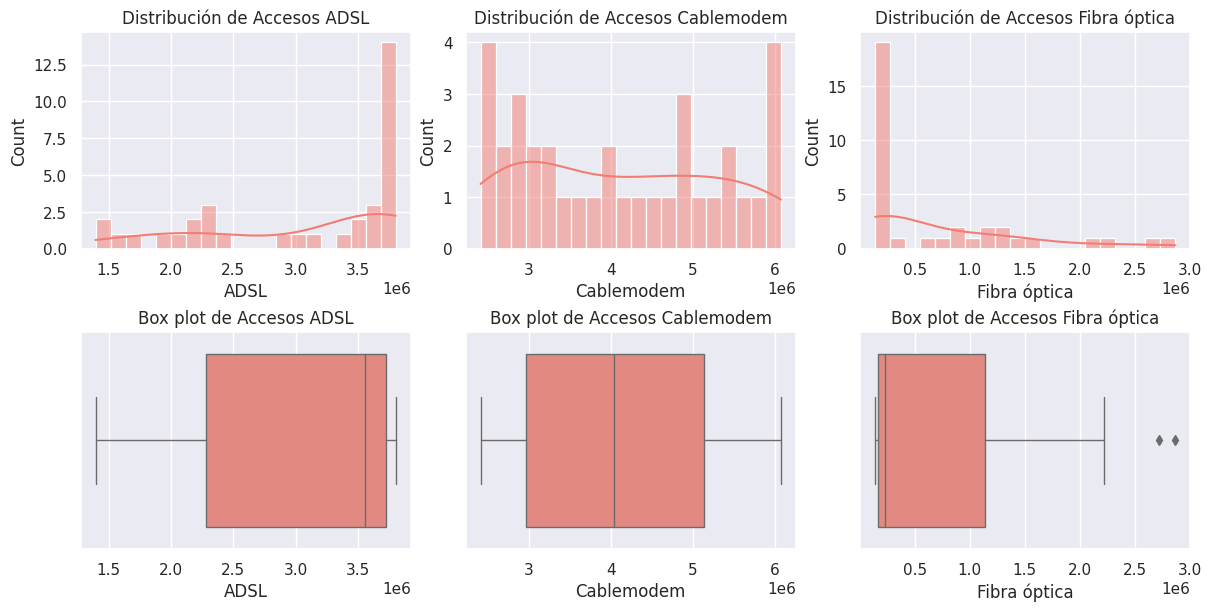

In [8]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'ADSL'
sns.histplot(data = inter_acceso_tecnol_nac, x = 'ADSL', kde = True, bins=20, color = '#F27D72', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos ADSL')
sns.boxplot(data = inter_acceso_tecnol_nac, x='ADSL', linewidth = 1, color = '#F27D72', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos ADSL')
# Histograma y boxplot de la columna 'Cablemodem'
sns.histplot(data = inter_acceso_tecnol_nac, x='Cablemodem', kde = True, bins=20, color = '#F27D72', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos Cablemodem')
sns.boxplot(data = inter_acceso_tecnol_nac, x='Cablemodem', linewidth = 1, color = '#F27D72', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos Cablemodem')
# Histograma y boxplot de la columna 'Fibra óptica'
sns.histplot(data = inter_acceso_tecnol_nac, x = 'Fibra óptica', kde = True, bins=20, color = '#F27D72', ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Fibra óptica')
sns.boxplot(data = inter_acceso_tecnol_nac, x='Fibra óptica', linewidth = 1, color = '#F27D72', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos Fibra óptica')

# Mostrar gráfico completo
plt.show()

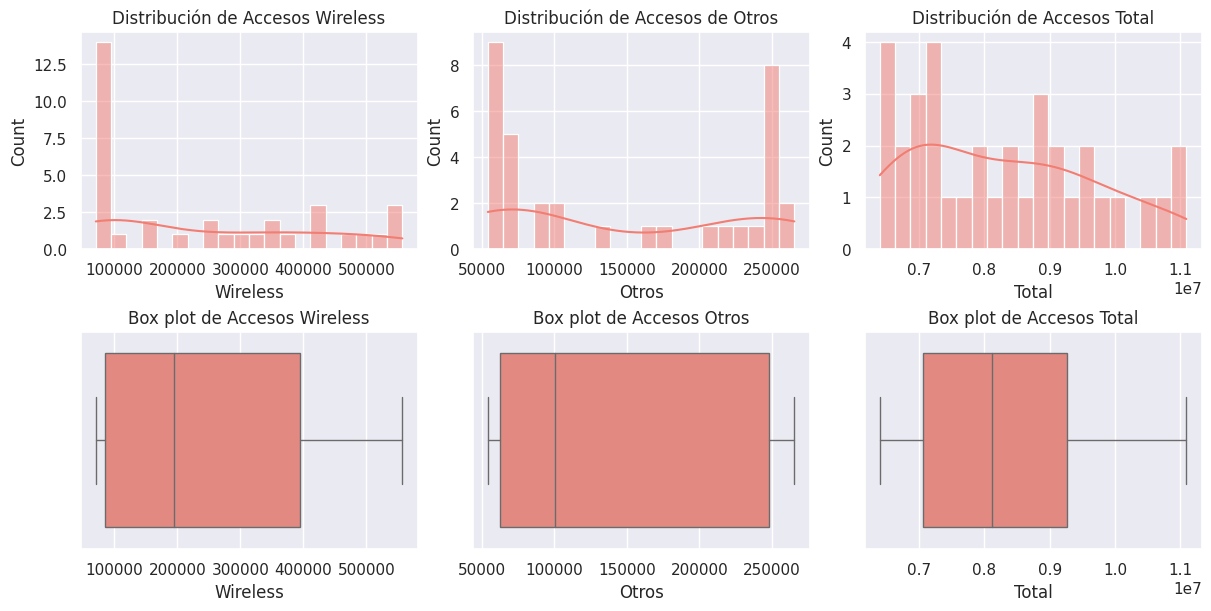

In [9]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'Wireless'
sns.histplot(data = inter_acceso_tecnol_nac, x = 'Wireless', kde = True, bins=20, color = '#F27D72', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos Wireless')
sns.boxplot(data = inter_acceso_tecnol_nac, x='Wireless', linewidth = 1, color = '#F27D72', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos Wireless')
# Histograma y boxplot de la columna 'Otros'
sns.histplot(data = inter_acceso_tecnol_nac, x='Otros', kde = True, bins=20, color = '#F27D72', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos de Otros')
sns.boxplot(data = inter_acceso_tecnol_nac, x='Otros', linewidth = 1, color = '#F27D72', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos Otros')
# Histograma y boxplot de la columna 'Total'
sns.histplot(data = inter_acceso_tecnol_nac, x = 'Total', kde = True, bins=20, color = '#F27D72', ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Total')
sns.boxplot(data = inter_acceso_tecnol_nac, x='Total', linewidth = 1, color = '#F27D72', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos Total')

# Mostrar gráfico completo
plt.show()

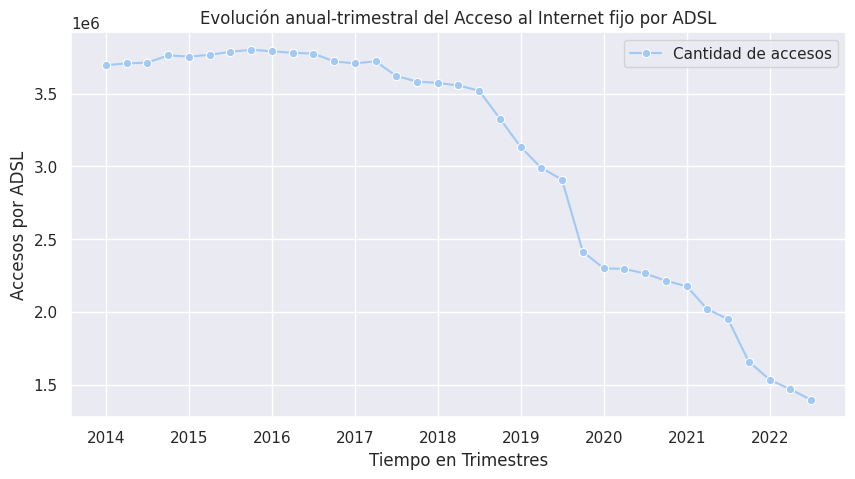

In [53]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_nac['Fecha'] = pd.to_datetime(inter_acceso_tecnol_nac['Año'].astype(str) + 'Q' + inter_acceso_tecnol_nac['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por ADSL
sns.lineplot(x='Fecha', y='ADSL', data = inter_acceso_tecnol_nac, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por ADSL")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por ADSL")
# Mostrar gráfico completo
plt.show()

Podemos ver como la cantidad de accesos a la tecnología ADSL disminuye de forma abrupta a partir del año 2019 y una de las razones pudo haber sido que la pandemia de COVID-19 ha acelerado aceleró la transición hacia el trabajo y el aprendizaje remoto, lo que aumentó la demanda de conexiones de Internet de alta velocidad y he hizo que los usuarios busquen opciones de acceso a Internet más rápidas y estables, como la fibra óptica y el cablemodem.

 Otro motivo por el que el ADSL se está volviendo cada vez más obsoleto a medida que las tecnologías de acceso a Internet de alta velocidad, como la fibra óptica, se vuelven más accesibles y económicas. En muchos países, incluyendo Argentina, los proveedores de servicios de Internet están invirtiendo en la construcción de redes de fibra óptica para ofrecer velocidades de conexión más rápidas y estables a sus clientes, lo que hace que el ADSL sea menos atractivo para los usuarios.

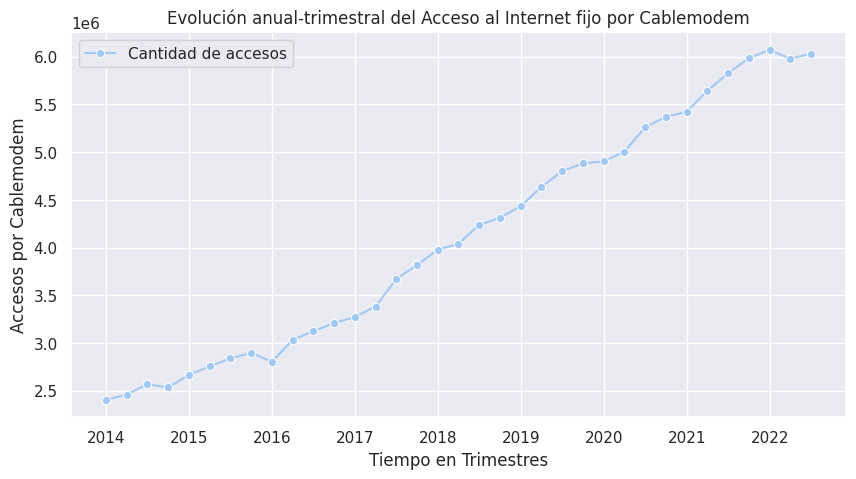

In [55]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_nac['Fecha'] = pd.to_datetime(inter_acceso_tecnol_nac['Año'].astype(str) + 'Q' + inter_acceso_tecnol_nac['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Cablemodem
sns.lineplot(x='Fecha', y='Cablemodem', data = inter_acceso_tecnol_nac, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Cablemodem")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Cablemodem")
# Mostrar gráfico completo
plt.show()

Los datos muestran que el cablemodem se volvió la tecnología de acceso a Internet fijo más utilizada en Argentina a partir del año 2018.

El cablemodem utiliza la infraestructura de las compañías de cable para proporcionar acceso a Internet de alta velocidad a los usuarios. En comparación con el ADSL, el cablemodem ofrece una velocidad de conexión más alta y más estable, lo que lo hace más atractivo para los usuarios que necesitan acceso a Internet de alta velocidad.

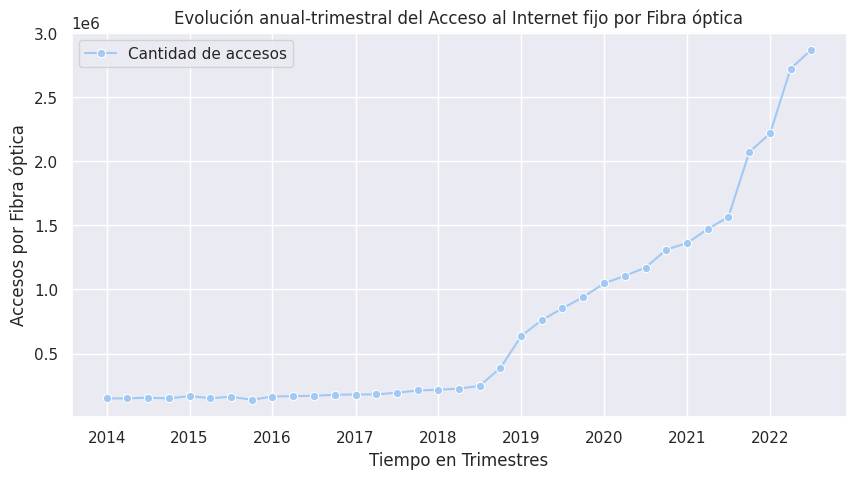

In [56]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_nac['Fecha'] = pd.to_datetime(inter_acceso_tecnol_nac['Año'].astype(str) + 'Q' + inter_acceso_tecnol_nac['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Fibra óptica
sns.lineplot(x='Fecha', y='Fibra óptica', data = inter_acceso_tecnol_nac, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Fibra óptica")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Fibra óptica")
# Mostrar gráfico completo
plt.show()

Vemos como la fibra óptica no tuvo tanto acceso de 2014 a 2018, es posible que se deba a que su implementación era más costosa y requería una mayor inversión en infraestructura para los proveedores de servicios de Internet. Además, puede ser que los usuarios no estaban tan familiarizados con la tecnología y no veían la necesidad de cambiar de tecnología de acceso a Internet fijo.

Sin embargo, a partir de 2019, hubo un aumento significativo en el acceso a la fibra óptica en Argentina, lo que puede deberse a varias razones. En primer lugar, los proveedores de servicios de Internet comenzaron a invertir más en la construcción de redes de fibra óptica debido a la creciente demanda de acceso a Internet de alta velocidad y estabilidad durante la pandemia de COVID-19. En segundo lugar, la fibra óptica se está volviendo más accesible y económica, lo que hace que sea una opción más atractiva para los usuarios. Y en tercer lugar, los usuarios están cada vez más familiarizados con la tecnología y reconocen sus beneficios en términos de velocidad y estabilidad de conexión.

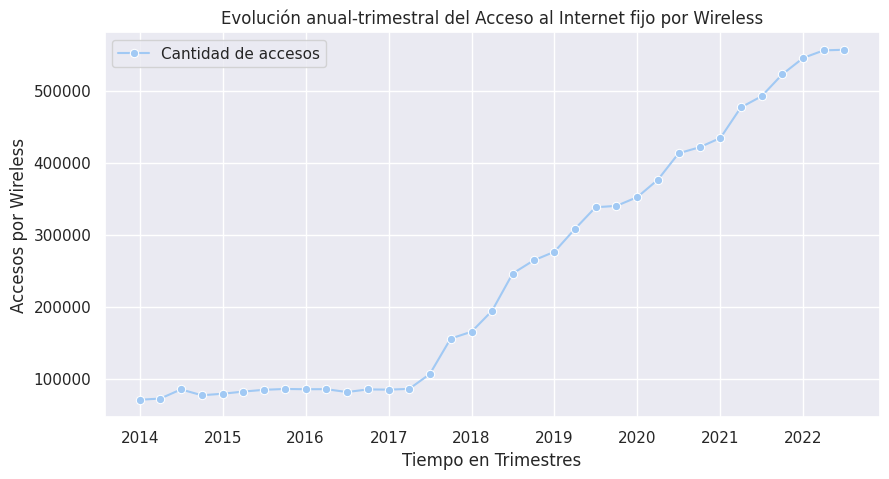

In [54]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_nac['Fecha'] = pd.to_datetime(inter_acceso_tecnol_nac['Año'].astype(str) + 'Q' + inter_acceso_tecnol_nac['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Wireless
sns.lineplot(x='Fecha', y='Wireless', data = inter_acceso_tecnol_nac, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Wireless")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Wireless")
# Mostrar gráfico completo
plt.show()

Los datos muestran que la tecnología Wireless ha aumentado en popularidad en Argentina en los últimos años, aunque su porcentaje de accesos sigue siendo relativamente bajo en comparación con otras tecnologías de acceso a Internet fijo, como el cablemodem y la fibra óptica.

De acuerdo a la gráfica vemos como a partir del 4 trimestre del año 2017 hubo un aumento significado al acceso a esta tecnólogía La razón detrás del aumento, es difícil de determinar sin más información sobre el contexto y las condiciones en ese momento. Sin embargo, es posible que haya habido una mayor disponibilidad y accesibilidad de tecnologías inalámbricas en ese momento, o que los proveedores de servicios de Internet hayan ofrecido opciones de acceso a Internet inalámbrico más atractivas para los usuarios.

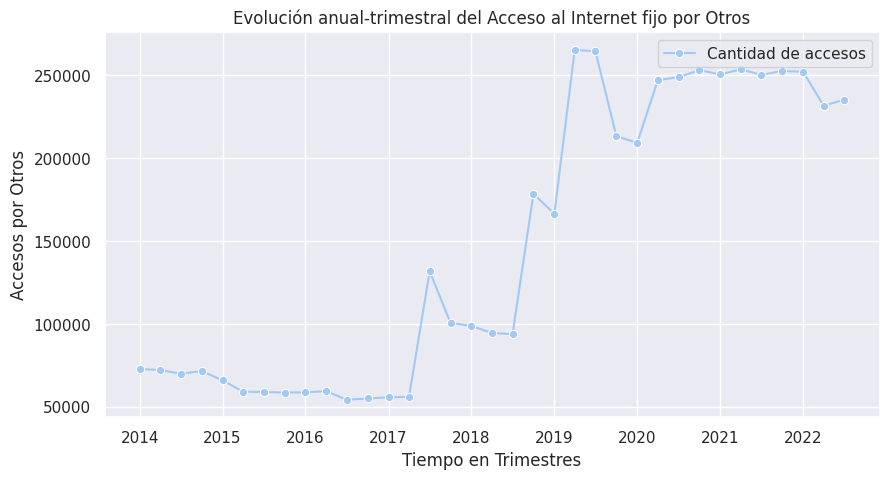

In [57]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_nac['Fecha'] = pd.to_datetime(inter_acceso_tecnol_nac['Año'].astype(str) + 'Q' + inter_acceso_tecnol_nac['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Otros
sns.lineplot(x='Fecha', y='Otros', data = inter_acceso_tecnol_nac, label='Cantidad de accesos', marker='o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Otros")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Otros")
# Mostrar gráfico completo
plt.show()

Es difícil determinar con certeza a qué se refiere esta categoría "otros" de los datos proporcionados por ENACOM, ya que no se especifica qué tipos de tecnologías de acceso a Internet están incluidas en esta categoría. Podría incluir una variedad de tecnologías de acceso a Internet, tanto de banda ancha como de banda angosta.

Sin embargo, es importante tener en cuenta que esta categoriía en el transcurso de los años sólo ha representado solo una pequeña proporción de los accesos a Internet fijo totales.

In [10]:
# Calcular la suma total de accesos a cada tipo de tecnología
sumas_por_tecnologia = inter_acceso_tecnol_nac[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Obtener el nombre de la columna con la suma total más alta
tecnologia_mas_utilizada = sumas_por_tecnologia.idxmax()

# Imprimir el resultado
print("La tecnología más utilizada es:", tecnologia_mas_utilizada)

La tecnología más utilizada es: Cablemodem


In [12]:
inter_acceso_tecnol_nac.groupby(['Año'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].sum()

ADSL  Cablemodem  Fibra óptica  Wireless    Otros     Total
Año                                                                  
2014  14884750     9975087        604862    305234   286700  26056633
2015  15115694    11162971        620877    331431   242846  27473819
2016  15073814    12177088        680127    337396   227633  28496058
2017  14639302    14148063        766312    432844   344162  30330683
2018  13981984    16571272       1079124    870047   465760  32968187
2019  11447626    18754974       3191409   1262831   909341  35566181
2020   9072828    20539964       4636620   1563813   958018  36771243
2021   7802044    22877010       6473506   1927038  1006793  40086391
2022   4396850    18084610       7814359   1659167   718835  32673821

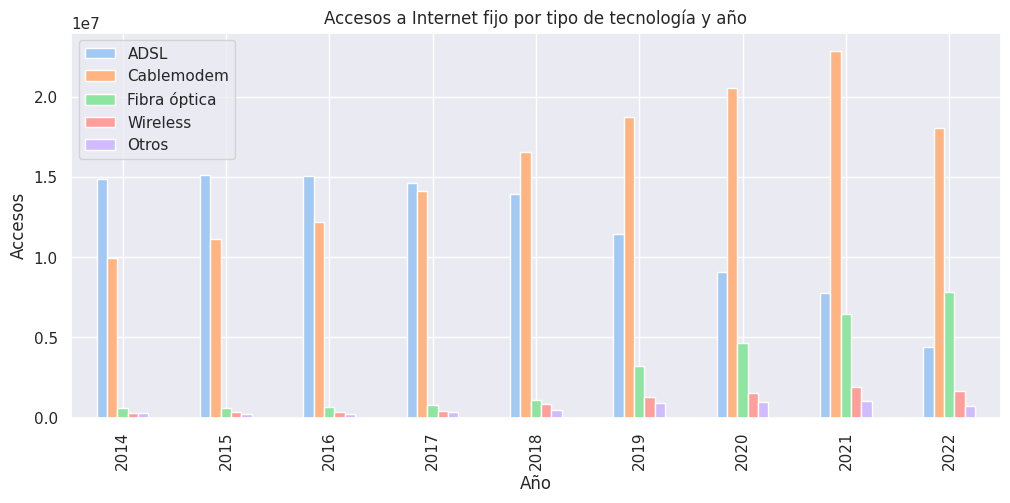

In [13]:
# Agrupar los datos por año y sumar los accesos a cada tipo de tecnología
datos_agrupados_por_año = inter_acceso_tecnol_nac.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear el gráfico de barras con las columnas una al lado de la otra
sns.set_palette('pastel')
ax = datos_agrupados_por_año.plot(kind='bar', figsize=(12, 5))

# Agregar el título y los nombres de los ejes
ax.set_title('Accesos a Internet fijo por tipo de tecnología y año')
ax.set_xlabel('Año')
ax.set_ylabel('Accesos')

# Mostrar el gráfico
plt.show()

En general, se puede ver que la fibra óptica y el cablemodem son las tecnologías que más han crecido en los últimos años, mientras que el ADSL ha disminuido en términos de cantidad de accesos. Donde de los años 2014 al 2017 el ADSL fue la tecnología más utlizada hasta que a partir del año 2018 fue superada por el cablemodem, y la fibra óptica respectivamente para el año 2022.

In [15]:
# Filtrar los datos para obtener solo los del año 2021 y 2022 respectivamente
df_2021 = inter_acceso_tecnol_nac[inter_acceso_tecnol_nac["Año"] == 2021]
df_2022 = inter_acceso_tecnol_nac[inter_acceso_tecnol_nac["Año"] == 2022]

# Calcular el total de accesos a Internet fijo en Argentina en 2021 y 2022
total_accesos_2021 = df_2021["Total"].sum()
total_accesos_2022 = df_2022["Total"].sum()

# Calcular el porcentaje de accesos por cada tecnología en 2021 y en 2022
porcentaje_fibra_2021 = (df_2021["Fibra óptica"].sum() / total_accesos_2021) * 100
porcentaje_cablemodem_2021 = (df_2021["Cablemodem"].sum() / total_accesos_2021) * 100
porcentaje_adsl_2021 = (df_2021["ADSL"].sum() / total_accesos_2021) * 100
porcentaje_wireless_2021 = (df_2021["Wireless"].sum() / total_accesos_2021) * 100
porcentaje_otros_2021 = (df_2021["Otros"].sum() / total_accesos_2021) * 100

porcentaje_fibra_2022 = (df_2022["Fibra óptica"].sum() / total_accesos_2022) * 100
porcentaje_cablemodem_2022 = (df_2022["Cablemodem"].sum() / total_accesos_2022) * 100
porcentaje_adsl_2022 = (df_2022["ADSL"].sum() / total_accesos_2022) * 100
porcentaje_wireless_2022 = (df_2022["Wireless"].sum() / total_accesos_2022) * 100
porcentaje_otros_2022 = (df_2022["Otros"].sum() / total_accesos_2022) * 100

# Imprimir los resultados
print("Año 2021")
print("Porcentaje de accesos por fibra óptica en 2021: {:.2f}%".format(porcentaje_fibra_2021))
print("Porcentaje de accesos por cablemodem en 2021: {:.2f}%".format(porcentaje_cablemodem_2021))
print("Porcentaje de accesos por ADSL en 2021: {:.2f}%".format(porcentaje_adsl_2021))
print("Porcentaje de accesos por wireless en 2021: {:.2f}%".format(porcentaje_wireless_2021))
print("Porcentaje de accesos por otros en 2021: {:.2f}%".format(porcentaje_otros_2021))
print("\nAño 2022")
print("Porcentaje de accesos por fibra óptica en 2022: {:.2f}%".format(porcentaje_fibra_2022))
print("Porcentaje de accesos por cablemodem en 2022: {:.2f}%".format(porcentaje_cablemodem_2022))
print("Porcentaje de accesos por ADSL en 2022: {:.2f}%".format(porcentaje_adsl_2022))
print("Porcentaje de accesos por wireless en 2022: {:.2f}%".format(porcentaje_wireless_2022))
print("Porcentaje de accesos por otros en 2022: {:.2f}%".format(porcentaje_otros_2022))

Año 2021
Porcentaje de accesos por fibra óptica en 2021: 16.15%
Porcentaje de accesos por cablemodem en 2021: 57.07%
Porcentaje de accesos por ADSL en 2021: 19.46%
Porcentaje de accesos por wireless en 2021: 4.81%
Porcentaje de accesos por otros en 2021: 2.51%

Año 2022
Porcentaje de accesos por fibra óptica en 2022: 23.92%
Porcentaje de accesos por cablemodem en 2022: 55.35%
Porcentaje de accesos por ADSL en 2022: 13.46%
Porcentaje de accesos por wireless en 2022: 5.08%
Porcentaje de accesos por otros en 2022: 2.20%


Se puede observar que:
- La fibra óptica y el cablemodem representan juntos más del 75% del total de accesos a Internet fijo en Argentina para el año 2022.
- Hubo un aumento significativo en el uso de la fibra óptica, que pasó del 16.15% en 2021 al 23.92% en 2022.

Estos datos sugieren que en Argentina hay una tendencia hacia el uso de tecnologías de acceso a Internet fijo de alta velocidad, como la fibra óptica y el cablemodem, mientras que el ADSL y el wireless están disminuyendo en términos de cantidad de accesos. La fibra óptica ha experimentado un importante crecimiento en los últimos años y se espera que siga creciendo debido a su mayor capacidad y velocidad en comparación con otras tecnologías.

### Acceso a Internet fijo por tecnología y provincia
Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)

In [201]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 900})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_acceso_tecnol_prov = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

Error al hacer la solicitud a la API


In [202]:
inter_acceso_tecnol_prov = pd.read_excel('Internet_Accesos-por-tecnologia.xlsx', sheet_name = 'Accesos Por Tecnología')

In [203]:
inter_acceso_tecnol_prov.head()

Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2022         3     Buenos Aires  339648.0   2748325.0     1436433.0   
1  2022         3  Capital Federal  140791.0   1240125.0      129218.0   
2  2022         3        Catamarca   10010.0     10495.0       46224.0   
3  2022         3            Chaco   27164.0     61800.0       44645.0   
4  2022         3           Chubut   45377.0     72212.0        9574.0   

   Wireless    Otros      Total  
0  126846.0  70416.0  4721668.0  
1    5758.0  31787.0  1547679.0  
2    1329.0   2235.0    70293.0  
3    8178.0   2359.0   144146.0  
4   29784.0   8831.0   165778.0

In [204]:
inter_acceso_tecnol_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra óptica  840 non-null    float64
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    float64
dtypes: float64(6), object(3)
memory usage: 59.3+ KB


In [205]:
# Cantidad de valores faltantes por columna en "inter_acceso_tecnol_prov"
missing_values_count = inter_acceso_tecnol_prov.isnull().sum()
columns = inter_acceso_tecnol_prov.shape[1]
missing_values_count[0:columns]

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [206]:
inter_acceso_tecnol_prov['Año'].unique()

array([2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016, 2015, 2014,
       nan, '*'], dtype=object)

In [207]:
inter_acceso_tecnol_prov['Trimestre'].unique()

array([3, 2, 1, 4, '3 *', '2 *', '1 *', nan,
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [208]:
inter_acceso_tecnol_prov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán',
       nan], dtype=object)

In [209]:
filas_con_faltantes = inter_acceso_tecnol_prov.isna().sum(axis=1) > 0
inter_acceso_tecnol_prov[filas_con_faltantes]

Año                                          Trimestre Provincia  ADSL  \
840  NaN                                                NaN       NaN   NaN   
841    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  Otros  Total  
840         NaN           NaN       NaN    NaN    NaN  
841         NaN           NaN       NaN    NaN    NaN

In [210]:
inter_acceso_tecnol_prov.drop([840, 841], inplace = True)

In [211]:
# Convertir la columna "Año" a numérica
inter_acceso_tecnol_prov['Año'] = inter_acceso_tecnol_prov['Año'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Trimestre" a numérica
inter_acceso_tecnol_prov['Trimestre'] = inter_acceso_tecnol_prov['Trimestre'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "ADSL" a numérica
inter_acceso_tecnol_prov['ADSL'] = inter_acceso_tecnol_prov['ADSL'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Cablemodem" a numérica
inter_acceso_tecnol_prov['Cablemodem'] = inter_acceso_tecnol_prov['Cablemodem'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Fibra óptica" a numérica
inter_acceso_tecnol_prov['Fibra óptica'] = inter_acceso_tecnol_prov['Fibra óptica'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Wireless" a numérica
inter_acceso_tecnol_prov['Wireless'] = inter_acceso_tecnol_prov['Wireless'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Otros" a numérica
inter_acceso_tecnol_prov['Otros'] = inter_acceso_tecnol_prov['Otros'].replace('[^0-9]', '', regex=True).astype(int)
# Convertir la columna "Total" a numérica
inter_acceso_tecnol_prov['Total'] = inter_acceso_tecnol_prov['Total'].replace('[^0-9]', '', regex=True).astype(int)

In [218]:
inter_acceso_tecnol_prov.head(1)

Año  Trimestre     Provincia    ADSL  Cablemodem  Fibra óptica  Wireless  \
0  2022          3  Buenos Aires  339648     2748325       1436433    126846   

   Otros    Total  
0  70416  4721668

In [216]:
inter_acceso_tecnol_prov.describe()

Año   Trimestre          ADSL    Cablemodem  Fibra óptica  \
count   840.000000  840.000000  8.400000e+02  8.400000e+02  8.400000e+02   
mean   2017.885714    2.457143  1.275668e+05  1.717750e+05  2.991186e+04   
std       2.528745    1.105009  2.550543e+05  4.221661e+05  1.235013e+05   
min    2014.000000    1.000000  6.842000e+03  0.000000e+00  0.000000e+00   
25%    2016.000000    1.000000  2.247925e+04  8.599750e+03  1.860000e+02   
50%    2018.000000    2.000000  4.859600e+04  3.498400e+04  1.093000e+03   
75%    2020.000000    3.000000  1.045695e+05  7.074850e+04  1.386250e+04   
max    2022.000000    4.000000  1.586343e+06  2.748325e+06  1.436433e+06   

            Wireless         Otros         Total  
count     840.000000    840.000000  8.400000e+02  
mean    10345.001190   6142.961905  3.457417e+05  
std     18192.024086  10572.152928  7.419436e+05  
min         0.000000      2.000000  1.255700e+04  
25%       253.000000    307.250000  5.202975e+04  
50%      4261.500000   1852.000000  1.034895e+05  
75%     12435.000000   6915.500000  1.779148e+05  
max    126887.000000  73415.000000  4.721668e+06

- Podemos observar que el número de conexiones varía ampliamente según el tipo de tecnología, siendo Cablemodem la tecnología con el mayor número medio de conexiones (171.775) y Otros la que tiene el menor número medio de conexiones (6.143). Además, la desviación estándar es bastante alta para todas las tecnologías, lo que sugiere que hay una gran variabilidad en el número de conexiones entre los diferentes trimestres y años.

- También podemos observar que la media del número de conexiones de todas las tecnologías ha aumentado a lo largo de los años, aunque la tasa de crecimiento varía según la tecnología. Por ejemplo, la media de conexiones de Fibra óptica ha tenido el mayor crecimiento promedio anual (34,1%) entre 2014 y 2022, mientras que la media de conexiones de Cablemodem ha tenido el menor crecimiento promedio anual (5,4%) durante el mismo período.

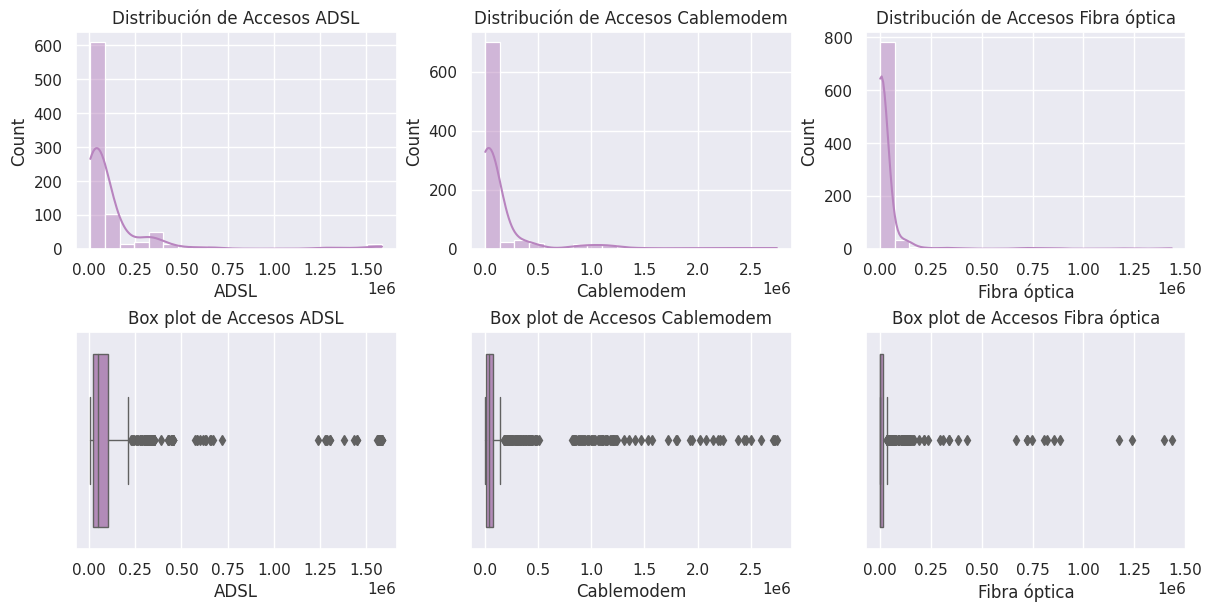

In [219]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'ADSL'
sns.histplot(data = inter_acceso_tecnol_prov, x = 'ADSL', kde = True, bins=20, color = '#B884BF', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos ADSL')
sns.boxplot(data = inter_acceso_tecnol_prov, x='ADSL', linewidth = 1, color = '#B884BF', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos ADSL')
# Histograma y boxplot de la columna 'Cablemodem'
sns.histplot(data = inter_acceso_tecnol_prov, x='Cablemodem', kde = True, bins=20, color = '#B884BF', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos Cablemodem')
sns.boxplot(data = inter_acceso_tecnol_prov, x='Cablemodem', linewidth = 1, color = '#B884BF', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos Cablemodem')
# Histograma y boxplot de la columna 'Fibra óptica'
sns.histplot(data = inter_acceso_tecnol_prov, x = 'Fibra óptica', kde = True, bins=20, color = '#B884BF', ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Fibra óptica')
sns.boxplot(data = inter_acceso_tecnol_prov, x='Fibra óptica', linewidth = 1, color = '#B884BF', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos Fibra óptica')

# Mostrar gráfico completo
plt.show()

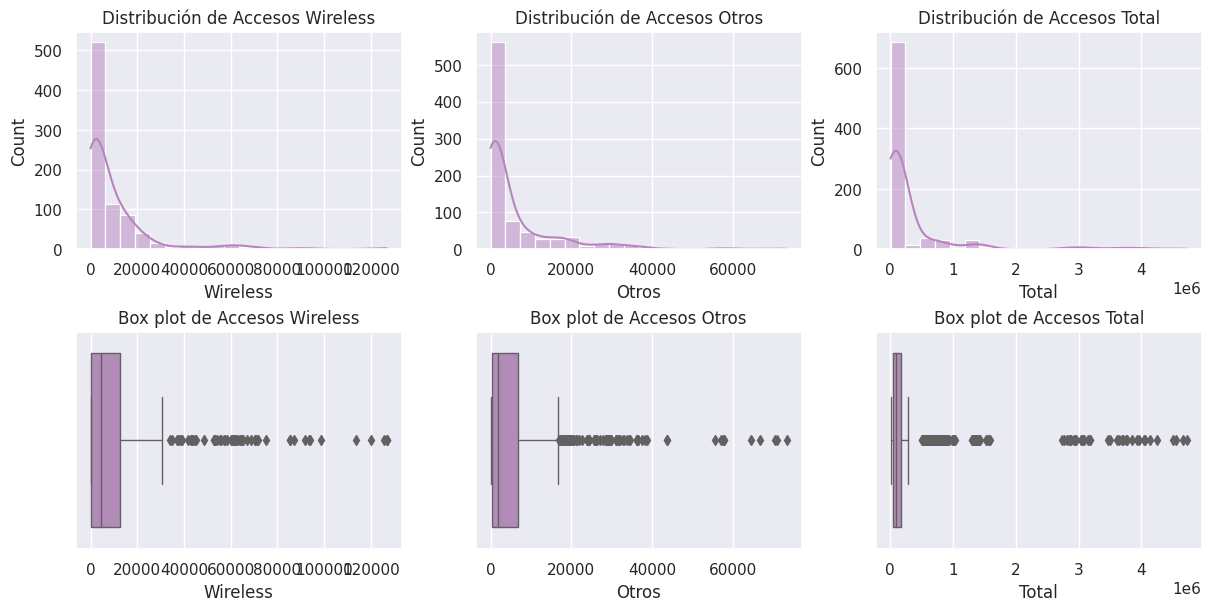

In [220]:
# Observando la distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout = True)

# Histograma y boxplot de la columna 'Wireless'
sns.histplot(data = inter_acceso_tecnol_prov, x = 'Wireless', kde = True, bins=20, color = '#B884BF', ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de Accesos Wireless')
sns.boxplot(data = inter_acceso_tecnol_prov, x='Wireless', linewidth = 1, color = '#B884BF', ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos Wireless')
# Histograma y boxplot de la columna 'Otros'
sns.histplot(data = inter_acceso_tecnol_prov, x='Otros', kde = True, bins=20, color = '#B884BF', ax = axes[0,1])
axes[0,1].set_title('Distribución de Accesos Otros')
sns.boxplot(data = inter_acceso_tecnol_prov, x='Otros', linewidth = 1, color = '#B884BF', ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos Otros')
# Histograma y boxplot de la columna 'Total'
sns.histplot(data = inter_acceso_tecnol_prov, x = 'Total', kde = True, bins=20, color = '#B884BF', ax = axes[0,2])
axes[0,2].set_title('Distribución de Accesos Total')
sns.boxplot(data = inter_acceso_tecnol_prov, x='Total', linewidth = 1, color = '#B884BF', ax = axes[1,2])
axes[1,2].set_title('Box plot de Accesos Total')

# Mostrar gráfico completo
plt.show()

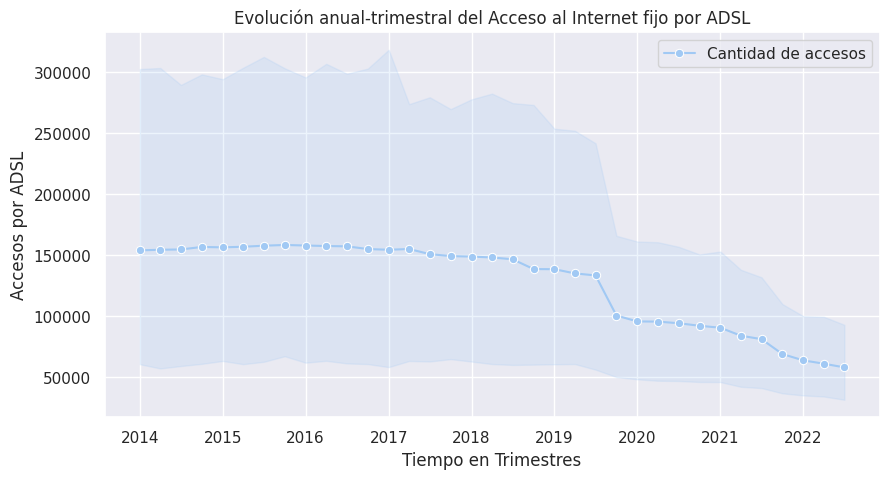

In [221]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_prov['Fecha'] = pd.to_datetime(inter_acceso_tecnol_prov['Año'].astype(str) + 'Q' + inter_acceso_tecnol_prov['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por ADSL
sns.lineplot(x = 'Fecha', y = 'ADSL', data = inter_acceso_tecnol_prov, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por ADSL")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por ADSL")
# Mostrar gráfico completo
plt.show()

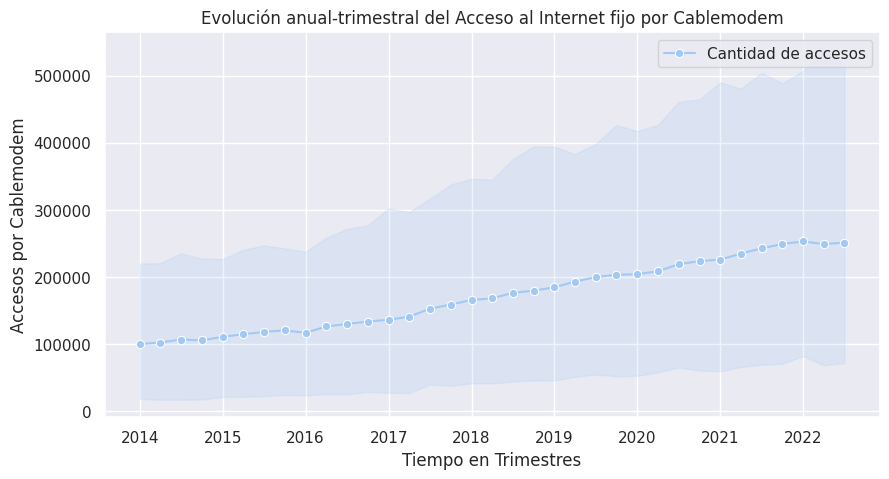

In [222]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_prov['Fecha'] = pd.to_datetime(inter_acceso_tecnol_prov['Año'].astype(str) + 'Q' + inter_acceso_tecnol_prov['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Cablemodem
sns.lineplot(x = 'Fecha', y = 'Cablemodem', data = inter_acceso_tecnol_prov, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Cablemodem")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Cablemodem")
# Mostrar gráfico completo
plt.show()

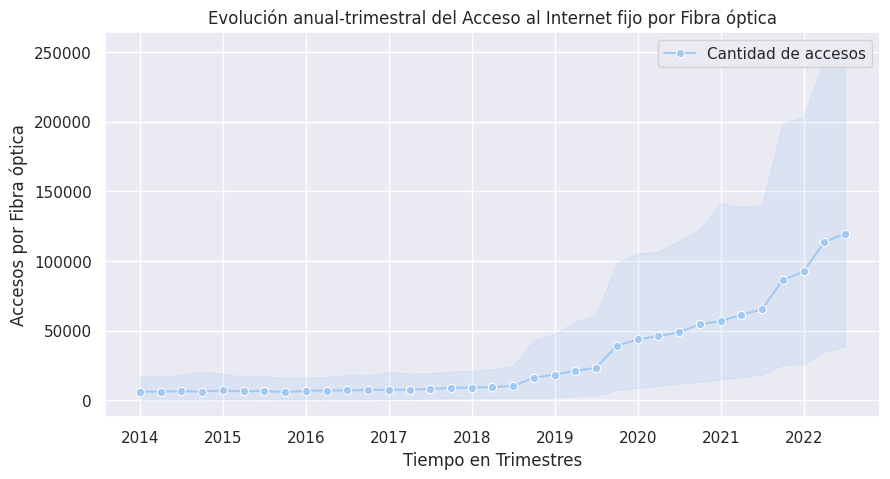

In [223]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_prov['Fecha'] = pd.to_datetime(inter_acceso_tecnol_prov['Año'].astype(str) + 'Q' + inter_acceso_tecnol_prov['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Fibra óptica
sns.lineplot(x = 'Fecha', y = 'Fibra óptica', data = inter_acceso_tecnol_prov, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Fibra óptica")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Fibra óptica")
# Mostrar gráfico completo
plt.show()

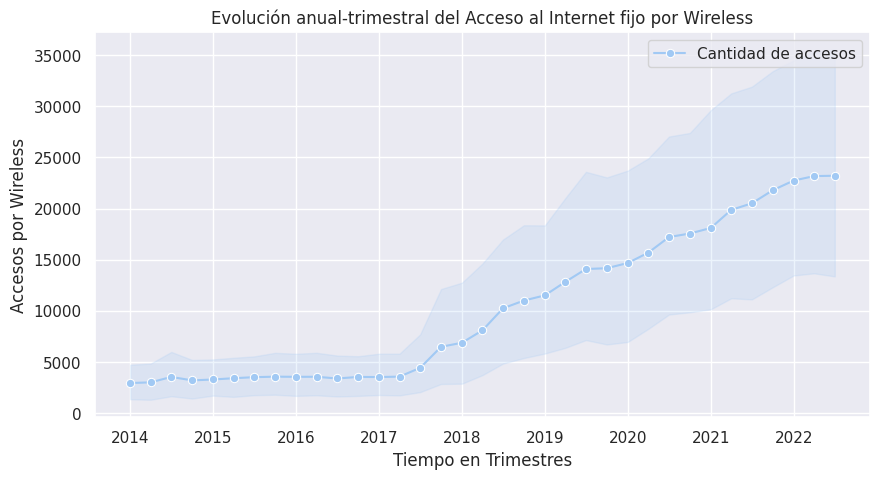

In [224]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_prov['Fecha'] = pd.to_datetime(inter_acceso_tecnol_prov['Año'].astype(str) + 'Q' + inter_acceso_tecnol_prov['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Wireless
sns.lineplot(x = 'Fecha', y = 'Wireless', data = inter_acceso_tecnol_prov, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Wireless")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Wireless")
# Mostrar gráfico completo
plt.show()

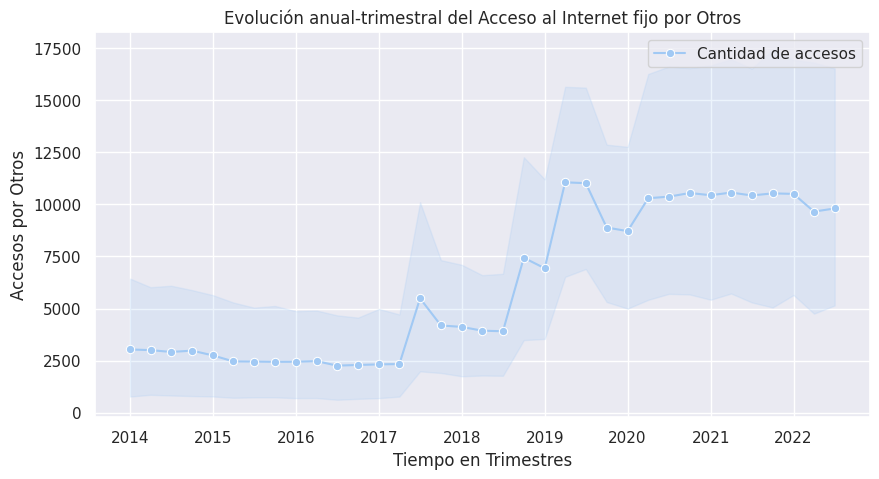

In [225]:
# Cambiar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear una columna 'Fecha' combinando 'Año' y 'Trimestre' en un objeto de fecha
inter_acceso_tecnol_prov['Fecha'] = pd.to_datetime(inter_acceso_tecnol_prov['Año'].astype(str) + 'Q' + inter_acceso_tecnol_prov['Trimestre'].astype(str))

# Graficar la evolución del Acceso al Internet fijo por Otros
sns.lineplot(x = 'Fecha', y = 'Otros', data = inter_acceso_tecnol_prov, label = 'Cantidad de accesos', marker = 'o')
# Agregar etiquetas de eje y título del gráfico
plt.xlabel("Tiempo en Trimestres")
plt.ylabel("Accesos por Otros")
plt.title("Evolución anual-trimestral del Acceso al Internet fijo por Otros")
# Mostrar gráfico completo
plt.show()

In [226]:
# Agrupar los datos por año y calcular la suma de los accesos a Dial up y Banda ancha fija en cada año
accesos_por_año = inter_acceso_tecnol_prov.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].sum()

# Calcular el porcentaje de cambio entre cada año y el año anterior para los accesos a Dial up y Banda ancha fija
accesos_por_año['Cambio ADSL'] = accesos_por_año['ADSL'].pct_change() * 100
accesos_por_año['Cambio Cablemodem'] = accesos_por_año['Cablemodem'].pct_change() * 100
accesos_por_año['Cambio Fibra óptica'] = accesos_por_año['Fibra óptica'].pct_change() * 100
accesos_por_año['Cambio Cablemodem'] = accesos_por_año['Cablemodem'].pct_change() * 100
accesos_por_año['Cambio Wireless'] = accesos_por_año['Wireless'].pct_change() * 100
accesos_por_año['Cambio Otros'] = accesos_por_año['Otros'].pct_change() * 100
accesos_por_año['Cambio Total'] = accesos_por_año['Total'].pct_change() * 100

# Imprimir los resultados
accesos_por_año[['Cambio ADSL', 'Cambio Cablemodem', 'Cambio Fibra óptica', 'Cambio Wireless', 'Cambio Otros', 'Cambio Total']]

Cambio ADSL  Cambio Cablemodem  Cambio Fibra óptica  Cambio Wireless  \
Año                                                                          
2014          NaN                NaN                  NaN              NaN   
2015     1.551548          11.908508             2.647711         8.582596   
2016    -0.277063           9.084651             9.542953         1.799771   
2017    -2.882562          16.185930            12.671898        28.289606   
2018    -4.490091          17.127497            40.820449       101.007060   
2019   -12.824546          13.177637           127.052405        45.145147   
2020   -25.564577           9.517422            89.236125        23.833910   
2021   -14.006482          11.378043            39.616919        23.226882   
2022   -43.644896         -20.948542            20.712934       -13.900660   

      Cambio Otros  Cambio Total  
Año                               
2014           NaN           NaN  
2015    -15.296128      5.438868  
2016     -6.264464      3.720775  
2017     51.191611      6.438171  
2018     35.331617      8.695828  
2019     95.238105      7.880306  
2020      5.352997      3.388224  
2021      5.091240      9.015599  
2022    -28.601510    -18.491488

- Podemos observar que hay una gran variabilidad en los cambios porcentuales en el número de conexiones según la tecnología y el año. Por ejemplo, la tecnología de Fibra óptica ha experimentado un crecimiento muy significativo en 2019 (+127,1%) y un crecimiento moderado en 2021 (+39,6%), pero un crecimiento relativamente pequeño en 2022 (+20,7%). Por otro lado, la tecnología de Otros ha experimentado un crecimiento muy significativo en 2017 (+51,2%), pero una disminución significativa en 2019 (-95,2%).

- También podemos observar que la mayoría de las tecnologías experimentaron una disminución en el número de conexiones en 2022. En particular, las tecnologías de ADSL, Cablemodem y Wireless experimentaron una disminución significativa en el número de conexiones en 2022 (-43,6%, -20,9% y -13,9%, respectivamente), lo que sugiere que estas tecnologías podrían estar perdiendo popularidad en favor de tecnologías más avanzadas como la Fibra óptica.

In [227]:
# Dividir el DataFrame por regiones
patagonia = inter_acceso_tecnol_prov[inter_acceso_tecnol_prov['Provincia'].isin(['Tierra Del Fuego', 'Santa Cruz', 'Chubut',
                                                                                             'Neuquén', 'Río Negro'])]
cuyo = inter_acceso_tecnol_prov[inter_acceso_tecnol_prov['Provincia'].isin(['Mendoza', 'San Luis', 'San Juan'])]
pampeana = inter_acceso_tecnol_prov[inter_acceso_tecnol_prov['Provincia'].isin(['Buenos Aires', 'Capital Federal' ,'Santa Fe',
                                                                                            'Córdoba', 'La Pampa'])]
noroeste = inter_acceso_tecnol_prov[inter_acceso_tecnol_prov['Provincia'].isin(['La Rioja', 'Catamarca', 'Tucumán',
                                                                                            'Santiago Del Estero', 'Salta', 'Jujuy'])]
noreste = inter_acceso_tecnol_prov[inter_acceso_tecnol_prov['Provincia'].isin(['Chaco', 'Formosa', 'Corrientes', 'Entre Ríos',
                                                                                           'Misiones'])]

In [229]:
# Agrupar los datos por provincia y año y calcular la media del acceso anual a ADSL por provincia
df_resumen = inter_acceso_tecnol_prov.groupby(['Provincia', 'Año'])['ADSL'].mean().reset_index()

# Generar el gráfico de barras agrupadas
fig = go.Figure(data=[
    go.Bar(name='2014', x=df_resumen[df_resumen['Año'] == 2014]['Provincia'], y=df_resumen[df_resumen['Año'] == 2014]['ADSL']),
    go.Bar(name='2015', x=df_resumen[df_resumen['Año'] == 2015]['Provincia'], y=df_resumen[df_resumen['Año'] == 2015]['ADSL']),
    go.Bar(name='2016', x=df_resumen[df_resumen['Año'] == 2016]['Provincia'], y=df_resumen[df_resumen['Año'] == 2016]['ADSL']),
    go.Bar(name='2017', x=df_resumen[df_resumen['Año'] == 2017]['Provincia'], y=df_resumen[df_resumen['Año'] == 2017]['ADSL']),
    go.Bar(name='2018', x=df_resumen[df_resumen['Año'] == 2018]['Provincia'], y=df_resumen[df_resumen['Año'] == 2018]['ADSL']),
    go.Bar(name='2019', x=df_resumen[df_resumen['Año'] == 2019]['Provincia'], y=df_resumen[df_resumen['Año'] == 2019]['ADSL']),
    go.Bar(name='2020', x=df_resumen[df_resumen['Año'] == 2020]['Provincia'], y=df_resumen[df_resumen['Año'] == 2020]['ADSL']),
    go.Bar(name='2021', x=df_resumen[df_resumen['Año'] == 2021]['Provincia'], y=df_resumen[df_resumen['Año'] == 2021]['ADSL']),
    go.Bar(name='2022', x=df_resumen[df_resumen['Año'] == 2022]['Provincia'], y=df_resumen[df_resumen['Año'] == 2022]['ADSL'])
])

# Actualizar las opciones del diseño del gráfico
fig.update_layout(barmode='group', xaxis_tickangle=-90,
                  title = dict(text='Acceso anual a la tecnología ADSL por provincia',
                             x=0.5, y=0.95, xanchor='center', yanchor='top'),
                  width=1200, height=500)

# Mostrar el gráfico
fig.show()

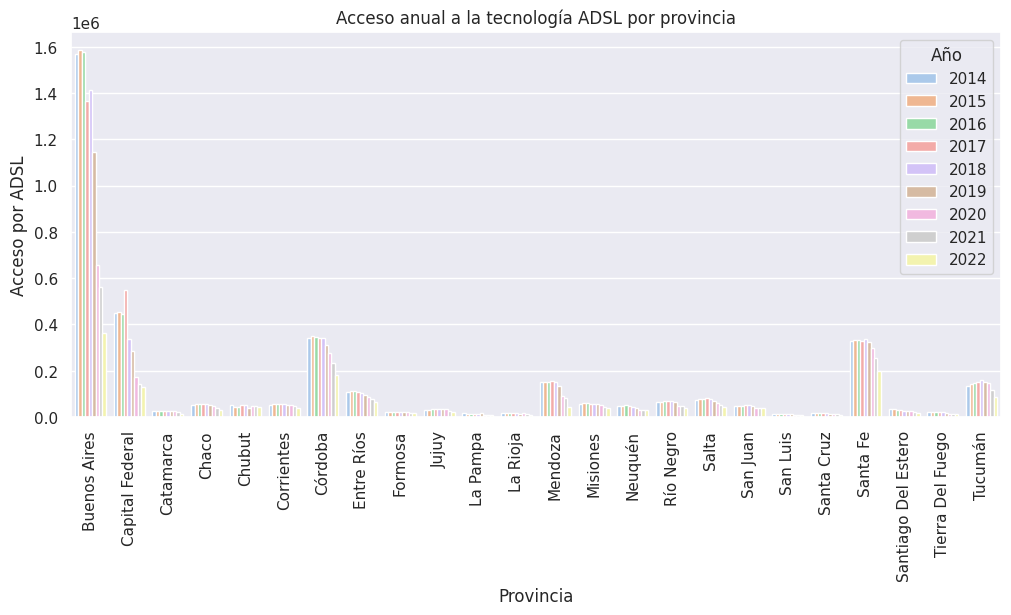

In [230]:
# Agrupar los datos por provincia y año y calcular la media del acceso por ADSL
df_resumen = inter_acceso_tecnol_prov.groupby(['Provincia', 'Año'])['ADSL'].mean().reset_index()

# Generar el gráfico de barras agrupadas con Seaborn
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Provincia', y='ADSL', hue='Año', data=df_resumen, ax=ax)

# Actualizar las opciones del diseño del gráfico
ax.set_title('Acceso anual a la tecnología ADSL por provincia')
ax.set_xlabel('Provincia')
ax.set_ylabel('Acceso por ADSL')
ax.tick_params(axis='x', rotation=90)

# Mostrar el gráfico
plt.show()

### Accesos a Internet fijo por tecnología y localidad

Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría

In [71]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-62463/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 3150})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_acceso_tecnol_loc = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

Error al hacer la solicitud a la API


In [ ]:
inter_acceso_tecnol_loc.head()

Provincia     Partido               Localidad Link Indec ADSL  \
0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100  873   
1  BUENOS AIRES  25 de Mayo               Del Valle    6854020  181   
2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040  - 0   
3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060  - 0   
4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050  - 0   

  CABLEMODEM DIAL UP FIBRA OPTICA OTROS SATELITAL WIMAX WIRELESS  \
0      4.704     - 0            2   - 0       975   - 0      664   
1        - 0     - 0          - 0    10         1   - 0      - 0   
2        - 0     - 0          - 0   - 0       - 0   - 0      181   
3        782     - 0            6   167       - 0   - 0      327   
4        - 0     - 0          - 0   - 0       - 0   - 0        6   

  Total general  Unnamed: 13  
0         7.218          NaN  
1           192          NaN  
2           181          NaN  
3         1.282          NaN  
4             6          NaN

## Velocidad Media de bajada de Internet fijo

### Velocidad Media de bajada de Internet fijo *
Serie histórica de la velocidad media de descarga de Internet nacional (trimestral)

In [ ]:
df = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/288059/data.csv')
df.head()

Año  Trimestre Mbps (Media de bajada)    Trimestre.1
0  2022          3                  62,46  Jul-Sept 2022
1  2022          2                  58,44   Abr-Jun 2022
2  2022          1                  55,11   Ene-Mar 2022
3  2021          4                  52,34   Oct-Dic 2021
4  2021          3                  48,46  Jul-Sept 2021

### Velocidad media de bajada de Internet fijo por provincia

Serie histórica de la velocidad media de descarga de Internet por provincia (trimestral)

In [ ]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/VELOC-PROME-DE-BAJAD-DE/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 900})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  historico_velocidad_internet = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [ ]:
historico_velocidad_internet

Año  Trimestre            Provincia  Mbps (Media de bajada)  Unnamed: 4  \
0    2022          3         Buenos Aires                      70         NaN   
1    2022          3      Capital Federal                     101         NaN   
2    2022          3            Catamarca                      61         NaN   
3    2022          3                Chaco                      53         NaN   
4    2022          3               Chubut                      16         NaN   
..    ...        ...                  ...                     ...         ...   
835  2014          1           Santa Cruz                       3         NaN   
836  2014          1             Santa Fe                       3         NaN   
837  2014          1  Santiago Del Estero                       3         NaN   
838  2014          1     Tierra Del Fuego                       3         NaN   
839  2014          1              Tucumán                       3         NaN   

     Unnamed: 5  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
835         NaN  
836         NaN  
837         NaN  
838         NaN  
839         NaN  

[840 rows x 6 columns]

## Acceso a Internet fijo por Velocidad de bajada

### Distribución de los accesos totales nacionales a Internet fijo por velocidad *

Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada (último trimestre disponible)

In [ ]:
inter_acceso_nacional_v = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/280921/data.csv')
inter_acceso_nacional_v.head()

Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2022          3          33.013                   96.727   
1  2022          2          33.667                   99.498   
2  2022          1          34.890                  104.840   
3  2021          4          41.262                   28.521   
4  2021          3          40.174                   41.437   

  Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps  \
0             1.161.370              1.151.906                 823.505   
1             1.193.090              1.197.030                 856.562   
2             1.263.273              1.209.148                 967.508   
3             1.413.208              1.245.333                 976.539   
4             2.550.229              1.095.772                 710.122   

  Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS       Total  Unnamed: 11  
0                 479.822      6.995.750  349.035  11.091.128          NaN  
1                 485.321      6.741.922  351.594  10.958.684          NaN  
2                 509.830      6.336.187  198.333  10.624.009          NaN  
3                 558.358      6.032.322  194.251  10.489.794          NaN  
4                 536.364      4.948.174  163.269  10.085.541          NaN

### Acceso a Internet Fijo por rangos de velocidad de bajada y provincia

Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia (trimestral)

In [ ]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 900})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_acceso_rango_provincia = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [ ]:
inter_acceso_rango_provincia.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2022          3     Buenos Aires          29.985               27.709   
1  2022          3  Capital Federal         517.000                5.742   
2  2022          3        Catamarca          71.000              384.000   
3  2022          3            Chaco         461.000              987.000   
4  2022          3           Chubut         109.000                1.444   

  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           290.315             297.915              267.044   
1            34.371              67.829               51.946   
2             3.107               5.389                5.099   
3            16.782              18.938                8.049   
4            45.707              30.940               34.682   

   + 20 Mbps - 30 Mbps  + 30 Mbps    OTROS      Total  
0              124.190  3.618.689   65.821  4.721.668  
1               28.692  1.253.105  105.477  1.547.679  
2                3.737     50.298    2.208     70.293  
3               15.828     79.390    3.711    144.146  
4               15.309     17.563   20.024    165.778

In [ ]:
inter_acceso_rango_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


### Accesos a Internet fijo por velocidad bajada y provincia (sin rangos)

Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia

In [ ]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-97624/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 500})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_acceso_provincia = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [ ]:
inter_acceso_provincia.head()

Año  Trimestre        Provincia    Otros 0,256 Mbps 0,375 Mbps  \
0  2022.0        3.0     Buenos Aires   65,821         19        - 0   
1  2022.0        3.0  Capital Federal  105,477         31        - 0   
2  2022.0        3.0        Catamarca    2,208        - 0        - 0   
3  2022.0        3.0            Chaco    3,711        - 0        225   
4  2022.0        3.0           Chubut   20,024          8        - 0   

  0,625 Mbps 0,5 Mbps 0,512 Mbps 0,75 Mbps  ... 70 Mbps 71 Mbps 75 Mbps  \
0        - 0   29,774        192     4,611  ...   3,163     - 0  98,387   
1        - 0      451         35     1,307  ...       3     - 0  30,482   
2        - 0       34         37       - 0  ...     - 0     - 0     - 0   
3        111      234          2       - 0  ...     - 0     - 0     - 0   
4        - 0       69         32       836  ...     - 0     - 0     - 0   

  77 Mbps 78 Mbps 80 Mbps 81 Mbps 83 Mbps 82 Mbps 86 Mbps  
0     - 0       2     223     - 0       1     - 0     - 0  
1     - 0     - 0       8     - 0     - 0     - 0     - 0  
2     - 0     - 0     - 0     - 0     - 0     - 0     - 0  
3     - 0     - 0     - 0     - 0     - 0     - 0     - 0  
4     - 0     - 0     - 0     - 0     - 0     - 0     - 0  

[5 rows x 97 columns]

### Accesos a Internet fijo por velocidad de bajada y localidad (sin rangos)

Número de accesos al servicio de Internet fijo por velocidad de bajada en cada localidad declarada

In [ ]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-16249/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 3100})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_acceso_localidad = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [ ]:
inter_acceso_localidad.head()

Provincia     Partido          Localidad Link Indec Otros  0,256 mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100   NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010   NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020   NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030   NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040   NaN         NaN   

   0,375 mbps 0,5 mbps  0,512 mbps  0,625 mbps  ... 75 mbps 78 mbps  80 mbps  \
0         NaN        2         NaN         NaN  ...     NaN     NaN      9.0   
1         NaN      NaN         NaN         NaN  ...     NaN     NaN      NaN   
2         NaN        1         NaN         NaN  ...     NaN     NaN      NaN   
3         NaN      NaN         NaN         NaN  ...     NaN     NaN      NaN   
4         NaN      NaN         NaN         NaN  ...     NaN     NaN      NaN   

  82 mbps 83 mbps  85 mbps  90 mbps 92 mbps  95 mbps 100 mbps  
0     NaN     NaN      NaN      NaN     NaN      NaN      NaN  
1     NaN     NaN      NaN      NaN     NaN      NaN      NaN  
2     NaN     NaN      NaN      NaN     NaN      NaN      NaN  
3     NaN     NaN      NaN      NaN     NaN      NaN      NaN  
4     NaN     NaN      NaN      NaN     NaN      NaN      NaN  

[5 rows x 83 columns]

## Ingresos por la operación del servicio de Internet fijo

### Ingresos trimestrales por la prestación del servicio de Internet fijo

Ingresos trimestrales de los operadores por el servicio de Internet fijo

In [ ]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-POR-LA-OPERA-DEL/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 500})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  inter_ingresos_trimestral = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [ ]:
inter_ingresos_trimestral.head()

Año  Trimestre Ingresos (miles de pesos)        Periodo
0  2022          3                67.055.930  Jul-Sept 2022
1  2022          2                60.335.724   Abr-Jun 2022
2  2022          1                55.589.997   Ene-Mar 2022
3  2021          4                45.467.887   Oct-Dic 2021
4  2021          3                42.999.944  Jul-Sept 2021

## Mapa de Conectividad

### Listado de localidades con conectividad a internet.

Listado de localidades con conectividad a internet, con detalle por tipo de conexión.

In [ ]:
# Definir la URL de la API y tu API key
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/CONEC-AL-SERVI-DE-INTER/data.csv"
api_key = "5EBQMGTfMImArsNkwhQIuatPXtYfRNlAuSTuybbB"

# Realizar la solicitud a la API
response = requests.get(url, params={"auth_key": api_key, "limit": 4350})

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
  # Leer el contenido del archivo CSV en memoria como una cadena de texto
  csv_data = response.content.decode("utf-8")

  # Crear un objeto DataFrame a partir de la cadena de texto
  localidad_conectividad = pd.read_csv(io.StringIO(csv_data))

else:
  # Mostrar un mensaje de error si la solicitud falló
  print("Error al hacer la solicitud a la API")

In [ ]:
localidad_conectividad.head()

Unnamed: 0       Partido      Localidad  Unnamed: 3 Unnamed: 4  \
0           NaN  Bahía Blanca  Villa Bordeau         0.0        NaN   
1  BUENOS AIRES           NaN            NaN         0.0         --   
2  BUENOS AIRES           NaN       Balcarce     38376.0         SI   
3  BUENOS AIRES           NaN            NaN       337.0         --   
4  BUENOS AIRES      Balcarce            NaN       374.0         --   

  CABLEMODEM DIALUP Unnamed: 7 Unnamed: 8 WIRELESS TELEFONIAFIJA Unnamed: 11  \
0         --     --         --        NaN       --            --         NaN   
1        NaN    NaN         --         --      NaN           NaN          --   
2        NaN     SI         SI         --      NaN           NaN          SI   
3        NaN    NaN         --         --      NaN            SI         NaN   
4         --    NaN         SI         --       SI            SI          SI   

  Unnamed: 12       link            Latitud        Unnamed: 15  
0          SI  6056020.0  -38,6472605094596                NaN  
1          --        NaN  -38,7765069529222  -62,1851833537179  
2          SI  6063010.0                NaN  -58,2551665841248  
3          --  6063020.0     -37,9412057603                NaN  
4         NaN  6063030.0  -37,6254980210026  -58,7461862359423

In [ ]:
localidad_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2871 non-null   object 
 1   Partido        2866 non-null   object 
 2   Localidad      2884 non-null   object 
 3   Unnamed: 3     2879 non-null   float64
 4   Unnamed: 4     2873 non-null   object 
 5   CABLEMODEM     2862 non-null   object 
 6   DIALUP         2882 non-null   object 
 7   Unnamed: 7     2878 non-null   object 
 8   Unnamed: 8     2872 non-null   object 
 9   WIRELESS       2864 non-null   object 
 10  TELEFONIAFIJA  2873 non-null   object 
 11  Unnamed: 11    2871 non-null   object 
 12  Unnamed: 12    2879 non-null   object 
 13  link           2865 non-null   float64
 14  Latitud        2872 non-null   object 
 15  Unnamed: 15    2879 non-null   object 
dtypes: float64(2), object(14)
memory usage: 539.1+ KB


In [ ]:
df = pd.read_excel('mapa_conectividad.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB
